<a href="https://colab.research.google.com/github/MayaHayat/FinalProject-DDSM/blob/main/calc_DDSM_Last_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

import os
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import GroupKFold
from sklearn.metrics import (
    accuracy_score, roc_auc_score, recall_score, precision_score,
    f1_score, cohen_kappa_score, matthews_corrcoef
)
import copy

from os import listdir
import plotly.express as px
import cv2
from matplotlib.image import imread
import tensorflow as tf
from keras.utils import to_categorical
import keras.utils as image
from sklearn.model_selection import train_test_split
import glob
import PIL
import random
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.utils import shuffle


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<ipython-input-2-d1d71ab3b614>:12: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(name='custom_cmap_v', cmap=cmap)


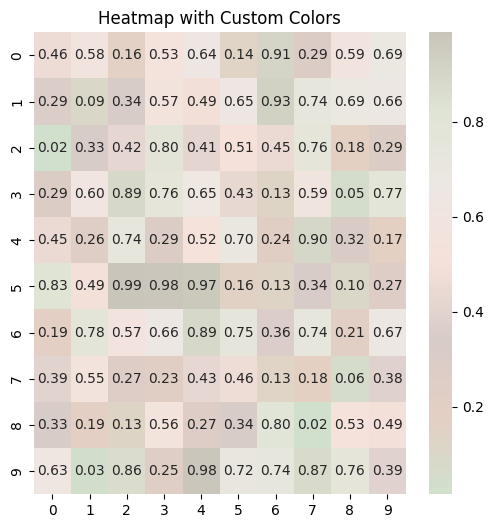

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define your custom colors
colors = ['#D0E0CD', '#e4cfc3', '#D7CCC8', '#F5E1DA', '#EDE7E3', '#DFE4D4', '#C9C5BA']


# Create a custom colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap_v', colors, N=256)

# Register a new colormap with a different name
plt.register_cmap(name='custom_cmap_v', cmap=cmap)

# Set the color cycle globally
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

plt.rcParams['image.cmap'] = 'custom_cmap_v'

# Example usage: Create a plot with the custom settings
import seaborn as sns
import numpy as np

# Generate example data
data = np.random.rand(10, 10)

# Plot with the custom colormap
plt.figure(figsize=(6, 6))
sns.heatmap(data, annot=True, fmt='.2f', cmap='custom_cmap_v')
plt.title('Heatmap with Custom Colors')
plt.show()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
calc_train = pd.read_csv('/content/drive/MyDrive/DDSM data/calc_case_description_train_set.csv', sep=',')
calc_test = pd.read_csv('/content/drive/MyDrive/DDSM data/calc_case_description_test_set.csv', sep=',')
calc = pd.concat([calc_train, calc_test], axis=0)
calc.reset_index(drop=True, inplace=True)

In [5]:
# Adding 'tumor_id' column with unique numbers
calc['tumor_id'] = range(1, len(calc) + 1)

In [6]:
calc_full = calc
calc_full

patient_id  breast density left or right breast image view  \
0       P_00005               3                RIGHT         CC   
1       P_00005               3                RIGHT        MLO   
2       P_00007               4                 LEFT         CC   
3       P_00007               4                 LEFT        MLO   
4       P_00008               1                 LEFT         CC   
...         ...             ...                  ...        ...   
1867    P_02464               2                RIGHT        MLO   
1868    P_02498               4                RIGHT         CC   
1869    P_02498               4                RIGHT        MLO   
1870    P_02501               3                RIGHT         CC   
1871    P_02501               3                RIGHT        MLO   

      abnormality id abnormality type              calc type  \
0                  1    calcification              AMORPHOUS   
1                  1    calcification              AMORPHOUS   
2                  1    calcification            PLEOMORPHIC   
3                  1    calcification            PLEOMORPHIC   
4                  1    calcification                    NaN   
...              ...              ...                    ...   
1867               1    calcification  FINE_LINEAR_BRANCHING   
1868               1    calcification               PUNCTATE   
1869               1    calcification               PUNCTATE   
1870               1    calcification            PLEOMORPHIC   
1871               1    calcification            PLEOMORPHIC   

     calc distribution  assessment                pathology  subtlety  \
0            CLUSTERED           3                MALIGNANT         3   
1            CLUSTERED           3                MALIGNANT         3   
2               LINEAR           4                   BENIGN         4   
3               LINEAR           4                   BENIGN         4   
4             REGIONAL           2  BENIGN_WITHOUT_CALLBACK         3   
...                ...         ...                      ...       ...   
1867         CLUSTERED           0                MALIGNANT         4   
1868         CLUSTERED           0                   BENIGN         3   
1869         CLUSTERED           0                   BENIGN         3   
1870         CLUSTERED           0                MALIGNANT         3   
1871         CLUSTERED           0                MALIGNANT         3   

                                        image file path  \
0     Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1     Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2     Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3     Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4     Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   
...                                                 ...   
1867  Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...   
1868  Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...   
1869  Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...   
1870  Calc-Test_P_02501_RIGHT_CC/1.3.6.1.4.1.9590.10...   
1871  Calc-Test_P_02501_RIGHT_MLO/1.3.6.1.4.1.9590.1...   

                                cropped image file path  \
0     Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1     Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2     Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3     Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4     Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   
...                                                 ...   
1867  Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...   
1868  Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....   
1869  Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...   
1870  Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....   
1871  Calc-Test_P_02501_RIGHT_MLO_1/1.3.6.1.4.1.9590...   

                                     ROI mask file path  tumor_id  
0     Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...         1  


In [7]:
calc['pathology'] = calc['pathology'].replace('BENIGN_WITHOUT_CALLBACK', 'BENIGN')

In [8]:
calc['calc type'] = calc['calc type'].replace('LUCENT_CENTERED', 'LUCENT_CENTER')

calc['calc type'] = calc['calc type'].replace('VASCULAR-COARSE-LUCENT_CENTERED', 'VASCULAR-COARSE-LUCENT_CENTER')

calc['calc type'] = calc['calc type'].replace('COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED', 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTER')

calc['calc type'] = calc['calc type'].replace('ROUND_AND_REGULAR-LUCENT_CENTERED', 'ROUND_AND_REGULAR-LUCENT_CENTER')


In [9]:
# Add another column to note if there are multiple number of tumors
grouped_data = calc.groupby(['patient_id', 'left or right breast'])

def calculate_multiple_tumors(group):
    max_abnormality_id = group['abnormality id'].max()
    return pd.Series({tumor_id: (0 if max_abnormality_id == 1 else 1)
                      for tumor_id in group['abnormality id']})

multiple_tumors_df = grouped_data.apply(calculate_multiple_tumors).unstack().reset_index()

multiple_tumors_df = multiple_tumors_df.rename(columns={'level_2': 'abnormality id'})

multiple_tumors_melted = multiple_tumors_df.melt(id_vars=['patient_id', 'left or right breast'],
                                                 var_name='abnormality id',
                                                 value_name='multiple_tumors')

calc = calc.merge(multiple_tumors_melted, on=['patient_id', 'left or right breast', 'abnormality id'], how='left')
calc

<ipython-input-9-f5052de5d3a2>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  multiple_tumors_df = grouped_data.apply(calculate_multiple_tumors).unstack().reset_index()


patient_id  breast density left or right breast image view  \
0       P_00005               3                RIGHT         CC   
1       P_00005               3                RIGHT        MLO   
2       P_00007               4                 LEFT         CC   
3       P_00007               4                 LEFT        MLO   
4       P_00008               1                 LEFT         CC   
...         ...             ...                  ...        ...   
1867    P_02464               2                RIGHT        MLO   
1868    P_02498               4                RIGHT         CC   
1869    P_02498               4                RIGHT        MLO   
1870    P_02501               3                RIGHT         CC   
1871    P_02501               3                RIGHT        MLO   

     abnormality id abnormality type              calc type calc distribution  \
0                 1    calcification              AMORPHOUS         CLUSTERED   
1                 1    calcification              AMORPHOUS         CLUSTERED   
2                 1    calcification            PLEOMORPHIC            LINEAR   
3                 1    calcification            PLEOMORPHIC            LINEAR   
4                 1    calcification                    NaN          REGIONAL   
...             ...              ...                    ...               ...   
1867              1    calcification  FINE_LINEAR_BRANCHING         CLUSTERED   
1868              1    calcification               PUNCTATE         CLUSTERED   
1869              1    calcification               PUNCTATE         CLUSTERED   
1870              1    calcification            PLEOMORPHIC         CLUSTERED   
1871              1    calcification            PLEOMORPHIC         CLUSTERED   

      assessment  pathology  subtlety  \
0              3  MALIGNANT         3   
1              3  MALIGNANT         3   
2              4     BENIGN         4   
3              4     BENIGN         4   
4              2     BENIGN         3   
...          ...        ...       ...   
1867           0  MALIGNANT         4   
1868           0     BENIGN         3   
1869           0     BENIGN         3   
1870           0  MALIGNANT         3   
1871           0  MALIGNANT         3   

                                        image file path  \
0     Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1     Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2     Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3     Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4     Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   
...                                                 ...   
1867  Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...   
1868  Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...   
1869  Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...   
1870  Calc-Test_P_02501_RIGHT_CC/1.3.6.1.4.1.9590.10...   
1871  Calc-Test_P_02501_RIGHT_MLO/1.3.6.1.4.1.9590.1...   

                                cropped image file path  \
0     Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1     Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2     Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3     Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4     Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   
...                                                 ...   
1867  Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...   
1868  Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....   
1869  Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...   
1870  Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....   
1871  Calc-Test_P_02501_RIGHT_MLO_1/1.3.6.1.4.1.9590...   

                                     ROI mask file path  tumor_id  \
0     Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...         1   
1     Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....         2   
2     Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...         3   
3     Calc-Training_P_00007_LEFT_MLO_1/1

In [10]:
full_calc = calc

In [11]:
# Get unique values for 'calc type'
unique_type = calc['calc type'].unique()

# Get unique values for 'calc distribution'
unique_distribution = calc['calc distribution'].unique()

# Print the unique values
print("Unique 'calc type' values:")
print(unique_type)

print("\nUnique 'calc distribution' values:")
print(unique_distribution)

Unique 'calc type' values:
['AMORPHOUS' 'PLEOMORPHIC' nan
 'ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC' 'PUNCTATE' 'COARSE'
 'VASCULAR' 'FINE_LINEAR_BRANCHING' 'LARGE_RODLIKE'
 'PUNCTATE-LUCENT_CENTER'
 'VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULAR-PUNCTATE'
 'ROUND_AND_REGULAR-EGGSHELL' 'PUNCTATE-PLEOMORPHIC'
 'PLEOMORPHIC-FINE_LINEAR_BRANCHING' 'DYSTROPHIC' 'LUCENT_CENTER'
 'AMORPHOUS-PLEOMORPHIC' 'ROUND_AND_REGULAR'
 'VASCULAR-COARSE-LUCENT_CENTER' 'COARSE-ROUND_AND_REGULAR'
 'COARSE-PLEOMORPHIC' 'VASCULAR-COARSE' 'ROUND_AND_REGULAR-PUNCTATE'
 'ROUND_AND_REGULAR-LUCENT_CENTER'
 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTER' 'SKIN' 'LUCENT_CENTER-PUNCTATE'
 'SKIN-PUNCTATE' 'SKIN-PUNCTATE-ROUND_AND_REGULAR' 'MILK_OF_CALCIUM'
 'PLEOMORPHIC-PLEOMORPHIC' 'SKIN-COARSE-ROUND_AND_REGULAR'
 'AMORPHOUS-ROUND_AND_REGULAR' 'ROUND_AND_REGULAR-PLEOMORPHIC'
 'ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS' 'ROUND_AND_REGULAR-AMORPHOUS'
 'LARGE_RODLIKE-ROUND_AND_REGULAR'
 'ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTA

In [12]:
calc_new = calc

In [13]:
# Fill NaNs with an empty string for ease of splitting
calc_new['calc type'] = calc_new['calc type'].fillna('undefined_type')

# Split the 'mass shape' entries by '-' and explode them into individual rows
exploded_calc = calc_new.assign(calc_type=calc_new['calc type'].str.split('-')).explode('calc_type')

# One-hot encode the exploded 'mass_shape' column
one_hot_calc = pd.get_dummies(exploded_calc['calc_type'])

# Combine the one-hot encoded columns back to the original DataFrame
result_calc_type = calc_new.drop(columns=['calc type']).join(one_hot_calc.groupby(one_hot_calc.index).sum())
result_calc_type = result_calc_type.drop('undefined_type', axis = 1)

# Print the result DataFrame
result_calc_type


patient_id  breast density left or right breast image view  \
0       P_00005               3                RIGHT         CC   
1       P_00005               3                RIGHT        MLO   
2       P_00007               4                 LEFT         CC   
3       P_00007               4                 LEFT        MLO   
4       P_00008               1                 LEFT         CC   
...         ...             ...                  ...        ...   
1867    P_02464               2                RIGHT        MLO   
1868    P_02498               4                RIGHT         CC   
1869    P_02498               4                RIGHT        MLO   
1870    P_02501               3                RIGHT         CC   
1871    P_02501               3                RIGHT        MLO   

     abnormality id abnormality type calc distribution  assessment  pathology  \
0                 1    calcification         CLUSTERED           3  MALIGNANT   
1                 1    calcification         CLUSTERED           3  MALIGNANT   
2                 1    calcification            LINEAR           4     BENIGN   
3                 1    calcification            LINEAR           4     BENIGN   
4                 1    calcification          REGIONAL           2     BENIGN   
...             ...              ...               ...         ...        ...   
1867              1    calcification         CLUSTERED           0  MALIGNANT   
1868              1    calcification         CLUSTERED           0     BENIGN   
1869              1    calcification         CLUSTERED           0     BENIGN   
1870              1    calcification         CLUSTERED           0  MALIGNANT   
1871              1    calcification         CLUSTERED           0  MALIGNANT   

      subtlety  ... EGGSHELL FINE_LINEAR_BRANCHING LARGE_RODLIKE  \
0            3  ...        0                     0             0   
1            3  ...        0                     0             0   
2            4  ...        0                     0             0   
3            4  ...        0                     0             0   
4            3  ...        0                     0             0   
...        ...  ...      ...                   ...           ...   
1867         4  ...        0                     1             0   
1868         3  ...        0                     0             0   
1869         3  ...        0                     0             0   
1870         3  ...        0                     0             0   
1871         3  ...        0                     0             0   

      LUCENT_CENTER  MILK_OF_CALCIUM  PLEOMORPHIC  PUNCTATE  \
0                 0                0            0         0   
1                 0                0            0         0   
2                 0                0            1         0   
3                 0                0            1         0   
4                 0                0            0         0   
...             ...              ...          ...       ...   
1867              0                0            0         0   
1868              0                0            0         1   
1869              0                0            0         1   
1870              0                0            1         0   
1871              0                0            1         0   

      ROUND_AND_REGULAR  SKIN  VASCULAR  
0                     0     0         0  
1                     0     0         0  
2                     0     0         0  
3                     0     0         0  
4                     0     0         0  
...                 ...   ...       ...  
1867                  0     0         0  
1868                  0     0         0  
1869                  0     0         0  
1870                  0     0         0  
1871                  0     0         0  

[1872 rows x 28 columns]

In [14]:
print(result_calc_type.columns)

Index(['patient_id', 'breast density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'calc distribution', 'assessment',
       'pathology', 'subtlety', 'image file path', 'cropped image file path',
       'ROI mask file path', 'tumor_id', 'multiple_tumors', 'AMORPHOUS',
       'COARSE', 'DYSTROPHIC', 'EGGSHELL', 'FINE_LINEAR_BRANCHING',
       'LARGE_RODLIKE', 'LUCENT_CENTER', 'MILK_OF_CALCIUM', 'PLEOMORPHIC',
       'PUNCTATE', 'ROUND_AND_REGULAR', 'SKIN', 'VASCULAR'],
      dtype='object')


In [15]:
# Fill NaNs with an empty string for ease of splitting
result_calc_type['calc distribution'] = calc['calc distribution'].fillna('')

# Split the 'mass shape' entries by '-' and explode them into individual rows
exploded_calc = result_calc_type.assign(calc_distribution=result_calc_type['calc distribution'].str.split('-')).explode('calc_distribution')

# One-hot encode the exploded 'mass_margins' column
one_hot_calc = pd.get_dummies(exploded_calc['calc_distribution'])

# Combine the one-hot encoded columns back to the original DataFrame
result_calc = result_calc_type.drop(columns=['calc distribution']).join(one_hot_calc.groupby(one_hot_calc.index).sum())
result_calc = result_calc.drop('', axis = 1)
# Print the result DataFrame
result_calc

patient_id  breast density left or right breast image view  \
0       P_00005               3                RIGHT         CC   
1       P_00005               3                RIGHT        MLO   
2       P_00007               4                 LEFT         CC   
3       P_00007               4                 LEFT        MLO   
4       P_00008               1                 LEFT         CC   
...         ...             ...                  ...        ...   
1867    P_02464               2                RIGHT        MLO   
1868    P_02498               4                RIGHT         CC   
1869    P_02498               4                RIGHT        MLO   
1870    P_02501               3                RIGHT         CC   
1871    P_02501               3                RIGHT        MLO   

     abnormality id abnormality type  assessment  pathology  subtlety  \
0                 1    calcification           3  MALIGNANT         3   
1                 1    calcification           3  MALIGNANT         3   
2                 1    calcification           4     BENIGN         4   
3                 1    calcification           4     BENIGN         4   
4                 1    calcification           2     BENIGN         3   
...             ...              ...         ...        ...       ...   
1867              1    calcification           0  MALIGNANT         4   
1868              1    calcification           0     BENIGN         3   
1869              1    calcification           0     BENIGN         3   
1870              1    calcification           0  MALIGNANT         3   
1871              1    calcification           0  MALIGNANT         3   

                                        image file path  ... PLEOMORPHIC  \
0     Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...  ...           0   
1     Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...  ...           0   
2     Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...  ...           1   
3     Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...  ...           1   
4     Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...  ...           0   
...                                                 ...  ...         ...   
1867  Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...  ...           0   
1868  Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...  ...           0   
1869  Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...  ...           0   
1870  Calc-Test_P_02501_RIGHT_CC/1.3.6.1.4.1.9590.10...  ...           1   
1871  Calc-Test_P_02501_RIGHT_MLO/1.3.6.1.4.1.9590.1...  ...           1   

     PUNCTATE  ROUND_AND_REGULAR  SKIN  VASCULAR  CLUSTERED  \
0           0                  0     0         0          1   
1           0                  0     0         0          1   
2           0                  0     0         0          0   
3           0                  0     0         0          0   
4           0                  0     0         0          0   
...       ...                ...   ...       ...        ...   
1867        0                  0     0         0          1   
1868        1                  0     0         0          1   
1869        1                  0     0         0          1   
1870        0                  0     0         0          1   
1871        0                  0     0         0          1   

      DIFFUSELY_SCATTERED  LINEAR  REGIONAL  SEGMENTAL  
0                       0       0         0          0  
1                       0       0         0          0  
2                       0       1         0          0  
3                       0       1         0          0  
4                       0       0         1          0  
...                   ...     ...       ...        ...  
1867                    0       0         0          0  
1868                    0       0         0          0  
1869                    0       0         0          0  
1870                    0       0         0          0  
1871                    0 

# Analysing the original data

In [16]:
result_calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_id               1872 non-null   object 
 1   breast density           1872 non-null   int64  
 2   left or right breast     1872 non-null   object 
 3   image view               1872 non-null   object 
 4   abnormality id           1872 non-null   object 
 5   abnormality type         1872 non-null   object 
 6   assessment               1872 non-null   int64  
 7   pathology                1872 non-null   object 
 8   subtlety                 1872 non-null   int64  
 9   image file path          1872 non-null   object 
 10  cropped image file path  1872 non-null   object 
 11  ROI mask file path       1872 non-null   object 
 12  tumor_id                 1872 non-null   int64  
 13  multiple_tumors          1872 non-null   float64
 14  AMORPHOUS               

In [17]:
calc = result_calc

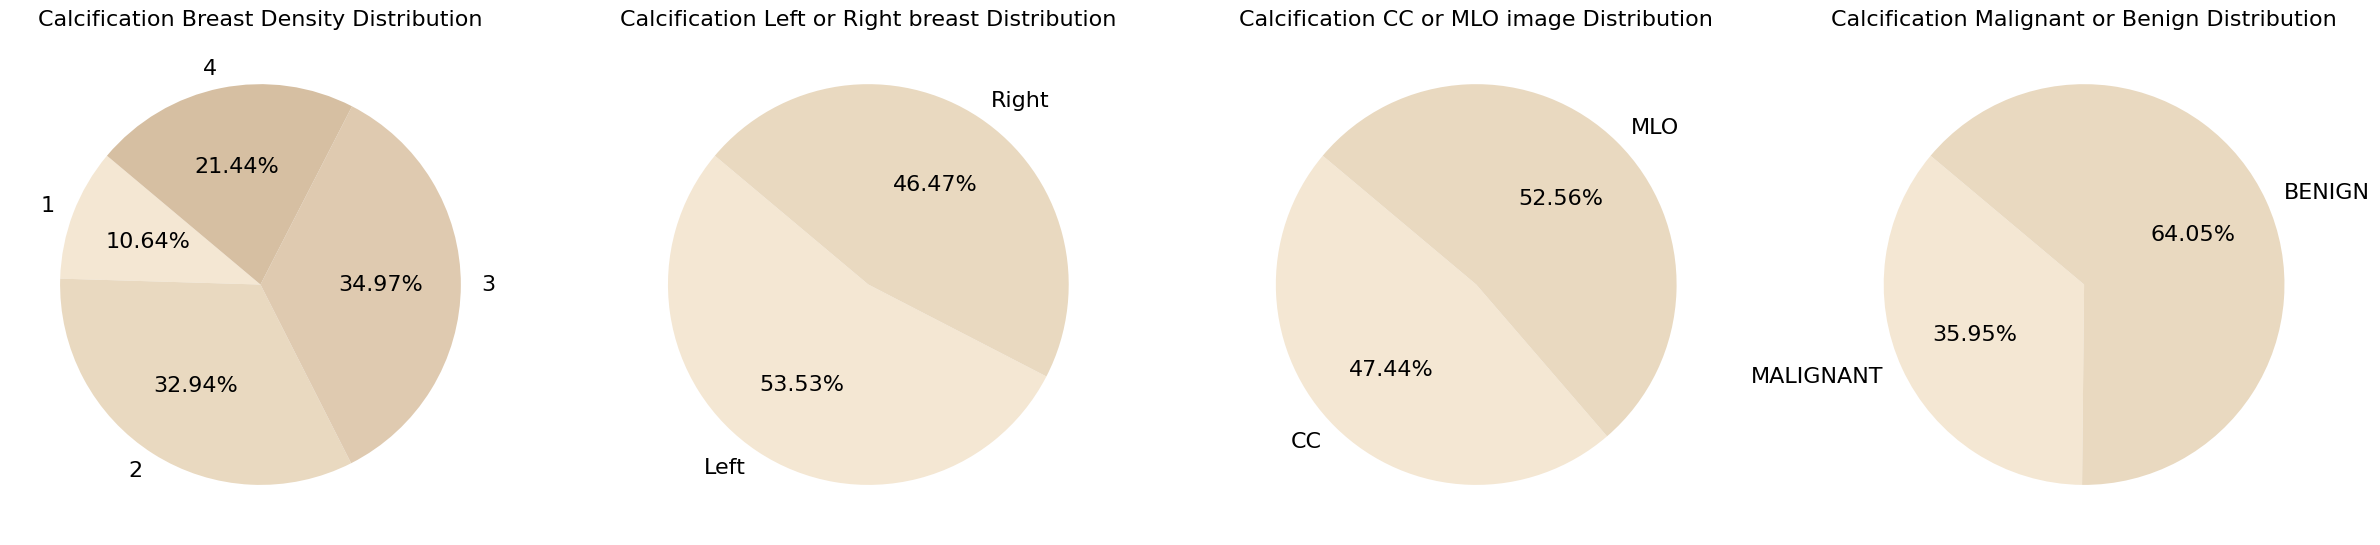

In [18]:
# Create a 2x2 grid of subplots
fig, ax = plt.subplots(1, 4, figsize=(24, 6))
((ax1, ax2, ax3, ax4)) = ax

colors = ['#f4e7d3', '#e9d9c0', '#dfcab0', '#d6bfa2']

# Subplot 1: Laterality Distribution
density_count = calc['breast density'].value_counts()
count_1 = density_count.loc[1]
count_2 = density_count.loc[2]
count_3 = density_count.loc[3]
count_4 = density_count.loc[4]

ax1.pie([count_1, count_2, count_3, count_4], labels=['1', '2', '3', '4'], autopct='%1.2f%%', startangle=140, textprops={'fontsize': 16}, colors = colors)
ax1.set_title('Calcification Breast Density Distribution', fontsize=16)


# Subplot 2: Orientation Distribution
calc_side = calc['left or right breast'].value_counts()
count_Left = calc_side.get('LEFT', 0)
count_Right = calc_side.get('RIGHT', 0)

ax2.pie([count_Left, count_Right], labels=['Left', 'Right'], autopct='%1.2f%%', startangle=140, textprops={'fontsize': 16}, colors = colors)
ax2.set_title('Calcification Left or Right breast Distribution', fontsize=16)


# Subplot 3: CC vs MLO
calc_side = calc['image view'].value_counts()
count_CC = calc_side.get('CC', 0)
count_MLO = calc_side.get('MLO', 0)

ax3.pie([count_CC, count_MLO], labels=['CC', 'MLO'], autopct='%1.2f%%', startangle=140, textprops={'fontsize': 16}, colors = colors)
ax3.set_title('Calcification CC or MLO image Distribution', fontsize=16)

# Subplot 4: Malignant or benign
calc_side = calc['pathology'].value_counts()
count_malignant = calc_side.get('MALIGNANT', 0)
count_benign = calc_side.get('BENIGN', 0)

ax4.pie([count_malignant, count_benign], labels=['MALIGNANT', 'BENIGN'], autopct='%1.2f%%', startangle=140, textprops={'fontsize': 16}, colors = colors)
ax4.set_title('Calcification Malignant or Benign Distribution', fontsize=16)


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [19]:
calc['malignant'] = calc['pathology'].map({'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0})

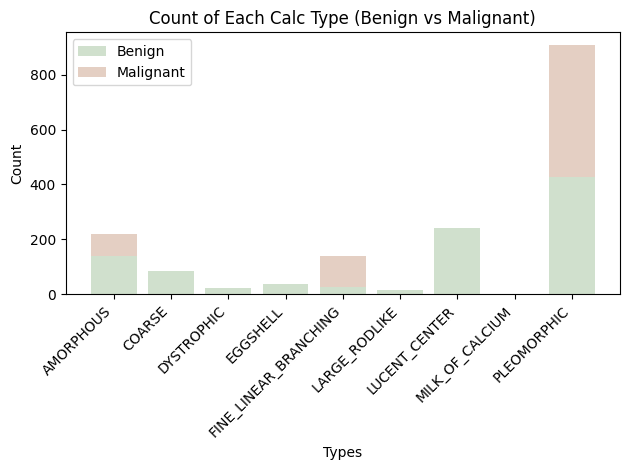

In [20]:
type_of_interest = ['AMORPHOUS',
       'COARSE', 'DYSTROPHIC', 'EGGSHELL', 'FINE_LINEAR_BRANCHING',
       'LARGE_RODLIKE', 'LUCENT_CENTER', 'MILK_OF_CALCIUM', 'PLEOMORPHIC']


malignant_calc = calc[calc['malignant'] == 1]
benign_calc = calc[calc['malignant'] == 0]

malignant_sums = malignant_calc[type_of_interest].sum()
benign_sums = benign_calc[type_of_interest].sum()

fig, ax = plt.subplots()

ax.bar(type_of_interest, benign_sums, label='Benign')
ax.bar(type_of_interest, malignant_sums, bottom=benign_sums, label='Malignant')
ax.set_xlabel('Types')
ax.set_ylabel('Count')
ax.set_title('Count of Each Calc Type (Benign vs Malignant)')

plt.xticks(rotation=45, ha='right')

ax.legend()
plt.tight_layout()
plt.show()


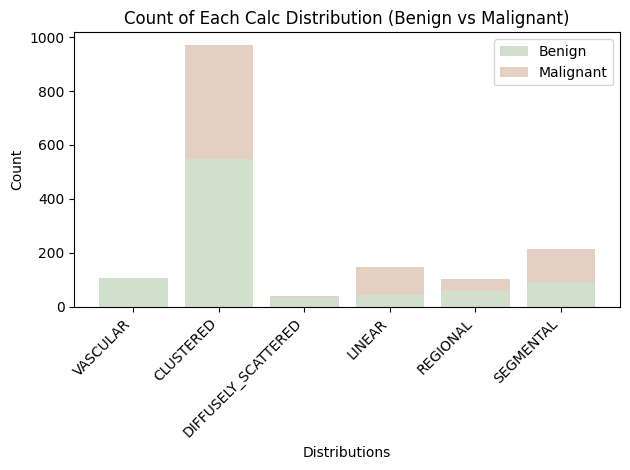

In [21]:
dist_of_interest = ['VASCULAR', 'CLUSTERED', 'DIFFUSELY_SCATTERED', 'LINEAR', 'REGIONAL', 'SEGMENTAL']

malignant_calc = calc[calc['malignant'] == 1]
benign_calc = calc[calc['malignant'] == 0]

malignant_sums = malignant_calc[dist_of_interest].sum()
benign_sums = benign_calc[dist_of_interest].sum()

fig, ax = plt.subplots()

ax.bar(dist_of_interest, benign_sums, label='Benign')
ax.bar(dist_of_interest, malignant_sums, bottom=benign_sums, label='Malignant')
ax.set_xlabel('Distributions')
ax.set_ylabel('Count')
ax.set_title('Count of Each Calc Distribution (Benign vs Malignant)')

plt.xticks(rotation=45, ha='right')

ax.legend()
plt.tight_layout()
plt.show()


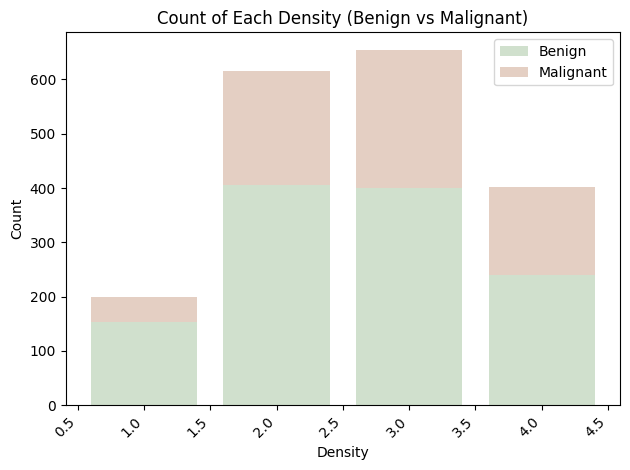

In [22]:
# Filter malignant and benign masses
malignant_calc = calc[calc['malignant'] == 1]
benign_calc = calc[calc['malignant'] == 0]

# Count occurrences for each side
malignant_sums = malignant_calc['breast density'].value_counts()
benign_sums = benign_calc['breast density'].value_counts()

# Ensure both malignant and benign have the same indices
density_of_interest = [1, 2, 3, 4]
malignant_sums = malignant_sums.reindex(density_of_interest, fill_value=0)
benign_sums = benign_sums.reindex(density_of_interest, fill_value=0)

fig, ax = plt.subplots()

ax.bar(density_of_interest, benign_sums, label='Benign', color='#D0E0CD')
ax.bar(density_of_interest, malignant_sums, bottom=benign_sums, label='Malignant', color='#e4cfc3')

ax.set_xlabel('Density')
ax.set_ylabel('Count')
ax.set_title('Count of Each Density (Benign vs Malignant)')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

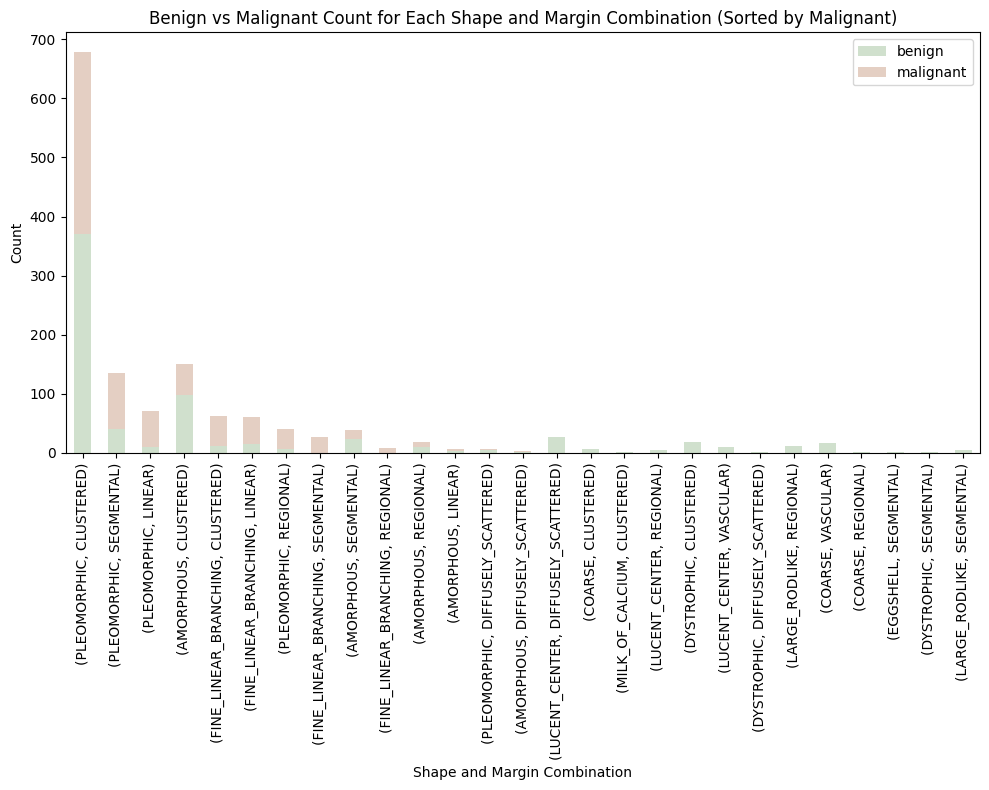

In [23]:
type_of_interest = ['AMORPHOUS',
       'COARSE', 'DYSTROPHIC', 'EGGSHELL', 'FINE_LINEAR_BRANCHING',
       'LARGE_RODLIKE', 'LUCENT_CENTER', 'MILK_OF_CALCIUM', 'PLEOMORPHIC']

dist_of_interest = ['VASCULAR', 'CLUSTERED', 'DIFFUSELY_SCATTERED', 'LINEAR', 'REGIONAL', 'SEGMENTAL']
# Create a DataFrame to store the counts
combinations = []

# Loop through each shape and margin combination
for type in type_of_interest:
    for dist in dist_of_interest:
        # Count the number of benign and malignant cases for each combination
        malignant_count = calc[(calc[type] == 1) & (calc[dist] == 1) & (calc['malignant'] == 1)].shape[0]
        benign_count = calc[(calc[type] == 1) & (calc[dist] == 1) & (calc['malignant'] == 0)].shape[0]

        # Append the result to the combinations list
        combinations.append({'Type': type, 'Distribution': dist, 'malignant': malignant_count, 'benign': benign_count})

# Convert to DataFrame for easier manipulation
combinations_df = pd.DataFrame(combinations)

# Filter combinations that have more than 1 appearance (either malignant or benign)
combinations_df = combinations_df[(combinations_df['malignant'] + combinations_df['benign']) > 1]

# Sort the DataFrame by malignant count in descending order
combinations_df = combinations_df.sort_values(by='malignant', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Stack the bars for malignant and benign counts with the specified colors
combinations_df.set_index(['Type', 'Distribution'])[['benign', 'malignant']].plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['#D0E0CD', '#e4cfc3']
)

# Adding labels and title
ax.set_xlabel('Shape and Margin Combination')
ax.set_ylabel('Count')
ax.set_title('Benign vs Malignant Count for Each Shape and Margin Combination (Sorted by Malignant)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

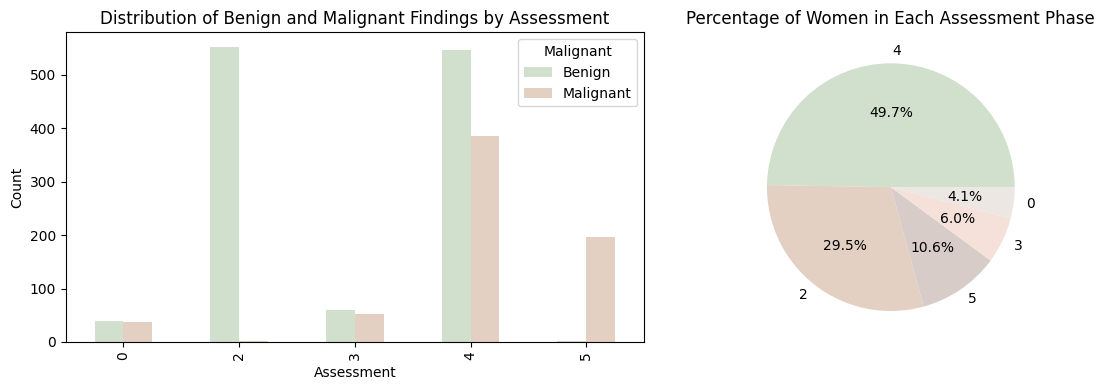

In [24]:
grouped_data = calc.groupby(['assessment', 'malignant']).size().unstack(fill_value=0)
assessment_counts = calc['assessment'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

grouped_data.plot(kind='bar', stacked=False, ax=ax1)

ax1.set_xlabel('Assessment')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Benign and Malignant Findings by Assessment')
ax1.legend(title='Malignant', labels=['Benign', 'Malignant'])

ax2.pie(assessment_counts, labels=assessment_counts.index, autopct='%1.1f%%')
ax2.set_title('Percentage of Women in Each Assessment Phase')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [25]:
grouped_data_array = grouped_data.to_numpy()
percentages = (grouped_data_array / grouped_data_array.sum(axis=1)[:, np.newaxis] * 100).round(2)
percentages_df = pd.DataFrame(percentages, index=grouped_data.index, columns=grouped_data.columns)

for assessment, row in percentages_df.iterrows():
    print(f"Assessment {assessment}: Benign: {row[0]}%, Malignant: {row[1]}%")


Assessment 0: Benign: 51.32%, Malignant: 48.68%
Assessment 2: Benign: 99.82%, Malignant: 0.18%
Assessment 3: Benign: 53.1%, Malignant: 46.9%
Assessment 4: Benign: 58.65%, Malignant: 41.35%
Assessment 5: Benign: 1.01%, Malignant: 98.99%


In [26]:
calc = calc.drop(columns=['image file path', 'cropped image file path', 'ROI mask file path', 'subtlety', 'assessment', 'abnormality type'])

In [27]:
calc_new = calc
print(calc.columns)

Index(['patient_id', 'breast density', 'left or right breast', 'image view',
       'abnormality id', 'pathology', 'tumor_id', 'multiple_tumors',
       'AMORPHOUS', 'COARSE', 'DYSTROPHIC', 'EGGSHELL',
       'FINE_LINEAR_BRANCHING', 'LARGE_RODLIKE', 'LUCENT_CENTER',
       'MILK_OF_CALCIUM', 'PLEOMORPHIC', 'PUNCTATE', 'ROUND_AND_REGULAR',
       'SKIN', 'VASCULAR', 'CLUSTERED', 'DIFFUSELY_SCATTERED', 'LINEAR',
       'REGIONAL', 'SEGMENTAL', 'malignant'],
      dtype='object')


In [28]:
columns_to_encode_calc = ['breast density','left or right breast', 'image view']
calc_one_hot = pd.get_dummies(calc, columns=columns_to_encode_calc, dtype=int)
calc_one_hot = calc_one_hot.drop('pathology', axis =1)

calc_one_hot

patient_id abnormality id  tumor_id  multiple_tumors  AMORPHOUS  COARSE  \
0       P_00005              1         1              0.0          1       0   
1       P_00005              1         2              0.0          1       0   
2       P_00007              1         3              0.0          0       0   
3       P_00007              1         4              0.0          0       0   
4       P_00008              1         5              1.0          0       0   
...         ...            ...       ...              ...        ...     ...   
1867    P_02464              1      1868              0.0          0       0   
1868    P_02498              1      1869              0.0          0       0   
1869    P_02498              1      1870              0.0          0       0   
1870    P_02501              1      1871              0.0          0       0   
1871    P_02501              1      1872              0.0          0       0   

      DYSTROPHIC  EGGSHELL  FINE_LINEAR_BRANCHING  LARGE_RODLIKE  ...  \
0              0         0                      0              0  ...   
1              0         0                      0              0  ...   
2              0         0                      0              0  ...   
3              0         0                      0              0  ...   
4              0         0                      0              0  ...   
...          ...       ...                    ...            ...  ...   
1867           0         0                      1              0  ...   
1868           0         0                      0              0  ...   
1869           0         0                      0              0  ...   
1870           0         0                      0              0  ...   
1871           0         0                      0              0  ...   

      malignant  breast density_0  breast density_1  breast density_2  \
0             1                 0                 0                 0   
1             1                 0                 0                 0   
2             0                 0                 0                 0   
3             0                 0                 0                 0   
4             0                 0                 1                 0   
...         ...               ...               ...               ...   
1867          1                 0                 0                 1   
1868          0                 0                 0                 0   
1869          0                 0                 0                 0   
1870          1                 0                 0                 0   
1871          1                 0                 0                 0   

      breast density_3  breast density_4  left or right breast_LEFT  \
0                    1                 0                          0   
1                    1                 0                          0   
2                    0                 1                          1   
3                    0                 1                          1   
4                    0                 0                          1   
...                ...               ...                        ...   
1867                 0                 0                          0   
1868                 0                 1                          0   
1869                 0                 1                          0   
1870                 1                 0                          0   
1871                 1                 0                          0   

      left or right breast_RIGHT  image view_CC  image view_MLO  
0                              1              1               0  
1                              1              0               1  
2                              0              1               0  
3                              0              0               1  
4                              0              1               0  
...                          ...         

# Compare models
Create a table per each algorithm and iteration (100 iterations) with 10 folds for cross validation


In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Ridge Classifier": RidgeClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "LightGBM": LGBMClassifier(),
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM - Linear": SVC(kernel='linear', probability=True),
    "Naive Bayes": GaussianNB()
}

num_runs = 100
n_splits = 10

for run in range(num_runs):
    # Shuffle and reset the index of the original DataFrame
    calc_one_hot_shuffled = calc_one_hot.sample(frac=1, random_state=42*run).reset_index(drop=True)

    # Features and target
    X = calc_one_hot_shuffled.drop(['malignant', 'patient_id', 'tumor_id', 'abnormality id'], axis=1)
    y = calc_one_hot_shuffled['malignant']
    groups = calc_one_hot_shuffled['patient_id']
    abnormality_ids = calc_one_hot_shuffled['abnormality id']
    tumor_id = calc_one_hot_shuffled['tumor_id']

    # Replace whitespaces in feature names with underscores
    X.columns = [col.replace(" ", "_") for col in X.columns]

    all_predictions = []

    # Get unique patient IDs
    unique_patient_ids = groups.unique()
    np.random.seed(42*run)  # Set seed for reproducibility

    # Shuffle the patient IDs
    np.random.shuffle(unique_patient_ids)

    # Split the patient IDs into folds
    fold_size = len(unique_patient_ids) // n_splits
    predefined_splits = []

    for fold in range(n_splits):
        test_ids = unique_patient_ids[fold * fold_size: (fold + 1) * fold_size]
        train_ids = np.setdiff1d(unique_patient_ids, test_ids)
        predefined_splits.append((train_ids, test_ids))

    # Handle any patient IDs not included in the folds
    all_test_ids = np.concatenate([test_ids for _, test_ids in predefined_splits])
    missing_ids = np.setdiff1d(unique_patient_ids, all_test_ids)
    print(missing_ids)
    if len(missing_ids) > 0:
        for missing_id in missing_ids:
            random_fold = np.random.choice(n_splits)
            train_ids, test_ids = predefined_splits[random_fold]
            test_ids = np.append(test_ids, missing_id)
            predefined_splits[random_fold] = (train_ids, test_ids)

    group_kfold = GroupKFold(n_splits=n_splits)

    for model_name, model in models.items():
        original_model = copy.deepcopy(model) # run folds on og
        fold_count = 1
        all_model_predictions = []

        for fold_idx, (train_ids, test_ids) in enumerate(predefined_splits):
            model = copy.deepcopy(original_model)
            train_idx = groups.isin(train_ids)
            test_idx = groups.isin(test_ids)

            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            patient_ids = groups[test_idx]
            abnormality_test_ids = abnormality_ids[test_idx]
            tumor_id_test = tumor_id[test_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)[:, 1]
                for pid, ab_id, y_t, y_p, y_pr, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, y_prob, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, y_pr, fold_count, t_id))
            else:
                for pid, ab_id, y_t, y_p, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, None, fold_count, t_id))

            fold_count += 1

        predictions_df = pd.DataFrame(all_model_predictions, columns=['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id'])

        # Include only the specified columns
        predictions_df = predictions_df[['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id']]

        predictions_df.to_csv(f'/content/drive/My Drive/DDSM data/DDSM_compareModels_Calc/compare_All_Models/Results_shapeDivided_{model_name}_{run + 1}.csv', index=False)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 1669, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364290 -> initscore=-0.556792
[LightGBM] [Info] Start training from score -0.556792
[LightGBM] [Info] Number of positive: 618, number of negative: 1067
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 1685, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366766 -> initscore=-0.546118
[LightGBM] [Info] Start training from score -0.546118
[LightGBM] [Info] Number of positive: 607, number of negative: 1079
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead 

In [29]:
import pandas as pd
import os
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

# Define the path to your CSV files
base_path = '/content/drive/My Drive/DDSM data/DDSM_compareModels_Calc/compare_All_Models/'

# Define the models
models = [
    "Logistic Regression", "Linear Discriminant Analysis", "Ridge Classifier",
    "Ada Boost Classifier", "Extra Trees Classifier", "LightGBM",
    "XGBoost", "Random Forest", "K Neighbors Classifier",
    "Decision Tree", "SVM - Linear", "Naive Bayes"
]

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_prob=None):
    metrics = {}
    if len(y_true) > 0:  # Check if y_true has at least one sample
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
        metrics['recall'] = recall_score(y_true, y_pred)
        metrics['precision'] = precision_score(y_true, y_pred)
        metrics['f1_score'] = f1_score(y_true, y_pred)
    else:
        metrics['accuracy'] = None
        metrics['recall'] = None
        metrics['precision'] = None
        metrics['f1_score'] = None

    if y_prob is not None:
        valid_indices = ~np.isnan(y_prob)  # Find indices where y_prob is not NaN
        if len(y_true[valid_indices]) > 0:  # Check if y_true has at least one non-NaN sample
            metrics['auc'] = roc_auc_score(y_true[valid_indices], y_prob[valid_indices])
        else:
            metrics['auc'] = None
    else:
        metrics['auc'] = None

    return metrics


# Initialize a dictionary to store the results
results = {model: [] for model in models}

# Read and process each CSV file
for model_name in models:
    for run in range(1, 101):
        file_path = os.path.join(base_path, f'Results_shapeDivided_{model_name}_{run}.csv')
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            y_true = df['y_true']
            y_pred = df['y_pred']
            y_prob = df['y_prob'] if 'y_prob' in df.columns else None
            metrics = calculate_metrics(y_true, y_pred, y_prob)
            results[model_name].append(metrics)

# Calculate the average metrics for each model
average_results = {}
for model_name, metrics_list in results.items():
    valid_auc_values = [d['auc'] for d in metrics_list if d['auc'] is not None]
    avg_metrics = {
        'accuracy': sum(d['accuracy'] for d in metrics_list) / len(metrics_list),
        'recall': sum(d['recall'] for d in metrics_list) / len(metrics_list),
        'precision': sum(d['precision'] for d in metrics_list) / len(metrics_list),
        'f1_score': sum(d['f1_score'] for d in metrics_list) / len(metrics_list),
        'auc': sum(valid_auc_values) / len(valid_auc_values) if len(valid_auc_values) > 0 else None
    }
    average_results[model_name] = avg_metrics

In [ ]:
# Create empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'Metric', 'Value'])

# Calculate average and std for each metric
rows_to_concat = []

for model_name, metrics_list in results.items():
    avg_metrics = {
        'accuracy': sum(d['accuracy'] for d in metrics_list) / len(metrics_list),
        'precision': sum(d['precision'] for d in metrics_list) / len(metrics_list),
        'recall': sum(d['recall'] for d in metrics_list) / len(metrics_list),
        'f1_score': sum(d['f1_score'] for d in metrics_list) / len(metrics_list),
        'auc': sum(d['auc'] for d in metrics_list if d['auc'] is not None) / len([d for d in metrics_list if d['auc'] is not None]) if len([d for d in metrics_list if d['auc'] is not None]) > 0 else None
    }

    # Calculate standard deviation
    std_metrics = {
        'accuracy': np.std([d['accuracy'] for d in metrics_list]),
        'precision': np.std([d['precision'] for d in metrics_list]),
        'recall': np.std([d['recall'] for d in metrics_list]),
        'f1_score': np.std([d['f1_score'] for d in metrics_list]),
        'auc': np.std([d['auc'] for d in metrics_list if d['auc'] is not None])
    }

    # Add average metrics to DataFrame
    for metric, value in avg_metrics.items():
        if value is not None:
            rows_to_concat.append({'Model': model_name, 'Metric': metric, 'Value': value})

    # Add std metrics to DataFrame
    for metric, value in std_metrics.items():
        rows_to_concat.append({'Model': model_name, 'Metric': metric + '_std', 'Value': value})

# Concatenate the rows
results_df = pd.concat([results_df, pd.DataFrame(rows_to_concat)], ignore_index=True)

# Pivot the DataFrame for better readability
results_df = results_df.pivot(index='Model', columns='Metric', values='Value')

# Display the results DataFrame
results_df


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-30-bc0cd809715d>:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame(rows_to_concat)], ignore_index=True)


Metric                        accuracy  accuracy_std       auc   auc_std  \
Model                                                                      
Ada Boost Classifier          0.716261      0.005275  0.800168  0.003466   
Decision Tree                 0.693654      0.007734  0.756045  0.008911   
Extra Trees Classifier        0.705935      0.005847  0.779679  0.006142   
K Neighbors Classifier        0.687815      0.009507  0.757313  0.007135   
LightGBM                      0.701058      0.006036  0.791080  0.005134   
Linear Discriminant Analysis  0.720091      0.004219  0.799440  0.003047   
Logistic Regression           0.719418      0.005171  0.802841  0.002775   
Naive Bayes                   0.607548      0.002917  0.710285  0.001532   
Random Forest                 0.704167      0.006542  0.791105  0.005096   
Ridge Classifier              0.721453      0.004219       NaN       NaN   
SVM - Linear                  0.707372      0.010428  0.773774  0.006643   
XGBoost                       0.704963      0.006417  0.790279  0.005569   

Metric                        f1_score  f1_score_std  precision  \
Model                                                             
Ada Boost Classifier          0.570543      0.005695   0.626032   
Decision Tree                 0.509949      0.009549   0.600510   
Extra Trees Classifier        0.528814      0.008653   0.623870   
K Neighbors Classifier        0.556960      0.018371   0.569332   
LightGBM                      0.530271      0.008912   0.609507   
Linear Discriminant Analysis  0.567104      0.005900   0.638743   
Logistic Regression           0.571454      0.005776   0.633894   
Naive Bayes                   0.644088      0.001761   0.477842   
Random Forest                 0.543446      0.009977   0.610523   
Ridge Classifier              0.564752      0.006840   0.644397   
SVM - Linear                  0.527785      0.010456   0.630635   
XGBoost                       0.532493      0.010160   0.618841   

Metric                        precision_std    recall  recall_std  
Model                                                              
Ada Boost Classifier               0.011244  0.524250    0.007762  
Decision Tree                      0.016913  0.443343    0.010119  
Extra Trees Classifier             0.012717  0.459034    0.009881  
K Neighbors Classifier             0.016917  0.547088    0.038454  
LightGBM                           0.012056  0.469376    0.009761  
Linear Discriminant Analysis       0.008823  0.510000    0.007390  
Logistic Regression                0.011122  0.520342    0.007016  
Naive Bayes                        0.001870  0.987741    0.002052  
Random Forest                      0.012524  0.489807    0.011901  
Ridge Classifier                   0.008397  0.502704    0.008331  
SVM - Linear                       0.028665  0.455082    0.020828  
XGBoost                            0.012928  0.467429    0.011489

We see a decrease of about 10 percent according to the current data, which has more BENIGN data

# Augmentation for tabular data to Balance the data





In [ ]:
calc_one_hot['original'] = 1
calc_one_hot

patient_id abnormality id  tumor_id  multiple_tumors  AMORPHOUS  COARSE  \
0       P_00005              1         1              0.0          1       0   
1       P_00005              1         2              0.0          1       0   
2       P_00007              1         3              0.0          0       0   
3       P_00007              1         4              0.0          0       0   
4       P_00008              1         5              1.0          0       0   
...         ...            ...       ...              ...        ...     ...   
1867    P_02464              1      1868              0.0          0       0   
1868    P_02498              1      1869              0.0          0       0   
1869    P_02498              1      1870              0.0          0       0   
1870    P_02501              1      1871              0.0          0       0   
1871    P_02501              1      1872              0.0          0       0   

      DYSTROPHIC  EGGSHELL  FINE_LINEAR_BRANCHING  LARGE_RODLIKE  ...  \
0              0         0                      0              0  ...   
1              0         0                      0              0  ...   
2              0         0                      0              0  ...   
3              0         0                      0              0  ...   
4              0         0                      0              0  ...   
...          ...       ...                    ...            ...  ...   
1867           0         0                      1              0  ...   
1868           0         0                      0              0  ...   
1869           0         0                      0              0  ...   
1870           0         0                      0              0  ...   
1871           0         0                      0              0  ...   

      breast density_0  breast density_1  breast density_2  breast density_3  \
0                    0                 0                 0                 1   
1                    0                 0                 0                 1   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 1                 0                 0   
...                ...               ...               ...               ...   
1867                 0                 0                 1                 0   
1868                 0                 0                 0                 0   
1869                 0                 0                 0                 0   
1870                 0                 0                 0                 1   
1871                 0                 0                 0                 1   

      breast density_4  left or right breast_LEFT  left or right breast_RIGHT  \
0                    0                          0                           1   
1                    0                          0                           1   
2                    1                          1                           0   
3                    1                          1                           0   
4                    0                          1                           0   
...                ...                        ...                         ...   
1867                 0                          0                           1   
1868                 1                          0                           1   
1869                 1                          0                           1   
1870                 0                          0                           1   
1871                 0                          0                           1   

      image view_CC  image view_MLO  original  
0                 1               0         1  
1                 0               1         1  
2                 1               0         1  
3                 0               1      

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# Separate features and target, keeping the identifier columns separately
X_features = calc_one_hot.drop(['malignant', 'patient_id', 'tumor_id', 'abnormality id'], axis=1)
y = calc_one_hot['malignant']

# Save the identifier columns
X_identifiers = calc_one_hot[['patient_id', 'tumor_id', 'abnormality id']]

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto')  # 50% MALIGNANT and 50% BENIGN
X_res, y_res = smote.fit_resample(X_features, y)

# Convert the resampled features and target into DataFrame and Series
X_resampled_df = pd.DataFrame(X_res, columns=X_features.columns)
y_resampled_df = pd.Series(y_res, name='malignant')

# Apply a threshold to ensure binary values for all features
# This will convert any value >= 0.5 to 1, and any value < 0.5 to 0
X_resampled_df = (X_resampled_df >= 0.5).astype(int)

# Create a DataFrame for identifiers with the correct number of rows
# We'll randomly duplicate identifier rows to match the resampled data size
X_identifiers_resampled = X_identifiers.sample(n=len(y_res), replace=True).reset_index(drop=True)

# Combine the resampled features, identifiers, and target
resampled_df = pd.concat([X_resampled_df, X_identifiers_resampled, y_resampled_df], axis=1)

# Now, `resampled_df` contains the balanced dataset with binary features and identifiers.

resampled_df

multiple_tumors  AMORPHOUS  COARSE  DYSTROPHIC  EGGSHELL  \
0                   0          1       0           0         0   
1                   0          1       0           0         0   
2                   0          0       0           0         0   
3                   0          0       0           0         0   
4                   1          0       0           0         0   
...               ...        ...     ...         ...       ...   
2393                1          0       0           0         0   
2394                0          0       0           0         0   
2395                0          0       0           0         0   
2396                0          0       0           0         0   
2397                0          0       0           0         0   

      FINE_LINEAR_BRANCHING  LARGE_RODLIKE  LUCENT_CENTER  MILK_OF_CALCIUM  \
0                         0              0              0                0   
1                         0              0              0                0   
2                         0              0              0                0   
3                         0              0              0                0   
4                         0              0              0                0   
...                     ...            ...            ...              ...   
2393                      0              0              0                0   
2394                      1              0              0                0   
2395                      0              0              0                0   
2396                      0              0              0                0   
2397                      0              0              0                0   

      PLEOMORPHIC  ...  breast density_4  left or right breast_LEFT  \
0               0  ...                 0                          0   
1               0  ...                 0                          0   
2               1  ...                 1                          1   
3               1  ...                 1                          1   
4               0  ...                 0                          1   
...           ...  ...               ...                        ...   
2393            1  ...                 0                          0   
2394            0  ...                 0                          0   
2395            1  ...                 0                          0   
2396            1  ...                 0                          1   
2397            1  ...                 0                          0   

      left or right breast_RIGHT  image view_CC  image view_MLO  original  \
0                              1              1               0         1   
1                              1              0               1         1   
2                              0              1               0         1   
3                              0              0               1         1   
4                              0              1               0         1   
...                          ...            ...             ...       ...   
2393                           1              1               0         1   
2394                           1              0               1         1   
2395                           1              1               0         1   
2396                           0              0               1         1   
2397                           1              1               0         1   

      patient_id  tumor_id  abnormality id  malignant  
0        P_00642       516               1          1  
1        P_01116       880               1          1  
2        P_01867      1835               1          0  
3        P_02323      1492               1          0  
4        P_01002       785               1          0  
...          ...       ...             ...        ...  
2393     P_00008        19               4          1  
2394     P_00559       455               2        

In [ ]:
resampled_df['original'] = 0
stome_mal_row=resampled_df[resampled_df['malignant']==1]
# Assuming df is your DataFrame
stome_mal_row = stome_mal_row.sample(n=520, random_state=42)  # Set random_state for reproducibility
stome_mal_row

multiple_tumors  AMORPHOUS  COARSE  DYSTROPHIC  EGGSHELL  \
2376                1          0       0           0         0   
2063                0          1       0           0         0   
354                 0          0       0           0         0   
1293                0          0       0           0         0   
177                 0          0       0           0         0   
...               ...        ...     ...         ...       ...   
2299                1          0       0           0         0   
366                 0          0       0           0         0   
1534                0          1       0           0         0   
1721                0          0       0           0         0   
181                 0          1       0           0         0   

      FINE_LINEAR_BRANCHING  LARGE_RODLIKE  LUCENT_CENTER  MILK_OF_CALCIUM  \
2376                      0              0              0                0   
2063                      0              0              0                0   
354                       1              0              0                0   
1293                      0              0              0                0   
177                       0              0              0                0   
...                     ...            ...            ...              ...   
2299                      0              0              0                0   
366                       0              0              0                0   
1534                      0              0              0                0   
1721                      0              0              0                0   
181                       0              0              0                0   

      PLEOMORPHIC  ...  breast density_4  left or right breast_LEFT  \
2376            1  ...                 0                          0   
2063            0  ...                 1                          1   
354             1  ...                 0                          1   
1293            1  ...                 0                          0   
177             1  ...                 0                          1   
...           ...  ...               ...                        ...   
2299            1  ...                 0                          1   
366             1  ...                 1                          1   
1534            0  ...                 0                          0   
1721            1  ...                 1                          1   
181             0  ...                 0                          1   

      left or right breast_RIGHT  image view_CC  image view_MLO  original  \
2376                           1              1               0         0   
2063                           0              0               0         0   
354                            0              0               1         0   
1293                           1              0               1         0   
177                            0              0               1         0   
...                          ...            ...             ...       ...   
2299                           0              0               1         0   
366                            0              1               0         0   
1534                           1              1               0         0   
1721                           0              1               0         0   
181                            0              0               1         0   

      patient_id  tumor_id  abnormality id  malignant  
2376     P_00448       310               1          1  
2063     P_00410       289               1          1  
354      P_01040       811               1          1  
1293     P_01306      1014               1          1  
177      P_00956       752               1          1  
...          ...       ...             ...        ...  
2299     P_00529       405               2          1  
366      P_00100      1562               1        

In [ ]:
balanced_df = pd.concat([calc_one_hot, stome_mal_row], ignore_index=True)
balanced_df

patient_id abnormality id  tumor_id  multiple_tumors  AMORPHOUS  COARSE  \
0       P_00005              1         1              0.0          1       0   
1       P_00005              1         2              0.0          1       0   
2       P_00007              1         3              0.0          0       0   
3       P_00007              1         4              0.0          0       0   
4       P_00008              1         5              1.0          0       0   
...         ...            ...       ...              ...        ...     ...   
2387    P_00529              2       405              1.0          0       0   
2388    P_00100              1      1562              0.0          0       0   
2389    P_00452              2       313              0.0          1       0   
2390    P_01160              1       906              0.0          0       0   
2391    P_00924              2       724              0.0          1       0   

      DYSTROPHIC  EGGSHELL  FINE_LINEAR_BRANCHING  LARGE_RODLIKE  ...  \
0              0         0                      0              0  ...   
1              0         0                      0              0  ...   
2              0         0                      0              0  ...   
3              0         0                      0              0  ...   
4              0         0                      0              0  ...   
...          ...       ...                    ...            ...  ...   
2387           0         0                      0              0  ...   
2388           0         0                      0              0  ...   
2389           0         0                      0              0  ...   
2390           0         0                      0              0  ...   
2391           0         0                      0              0  ...   

      breast density_0  breast density_1  breast density_2  breast density_3  \
0                    0                 0                 0                 1   
1                    0                 0                 0                 1   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 1                 0                 0   
...                ...               ...               ...               ...   
2387                 0                 0                 1                 0   
2388                 0                 0                 0                 0   
2389                 0                 0                 1                 0   
2390                 0                 0                 0                 0   
2391                 0                 0                 1                 0   

      breast density_4  left or right breast_LEFT  left or right breast_RIGHT  \
0                    0                          0                           1   
1                    0                          0                           1   
2                    1                          1                           0   
3                    1                          1                           0   
4                    0                          1                           0   
...                ...                        ...                         ...   
2387                 0                          1                           0   
2388                 1                          1                           0   
2389                 0                          0                           1   
2390                 1                          1                           0   
2391                 0                          1                           0   

      image view_CC  image view_MLO  original  
0                 1               0         1  
1                 0               1         1  
2                 1               0         1  
3                 0               1      

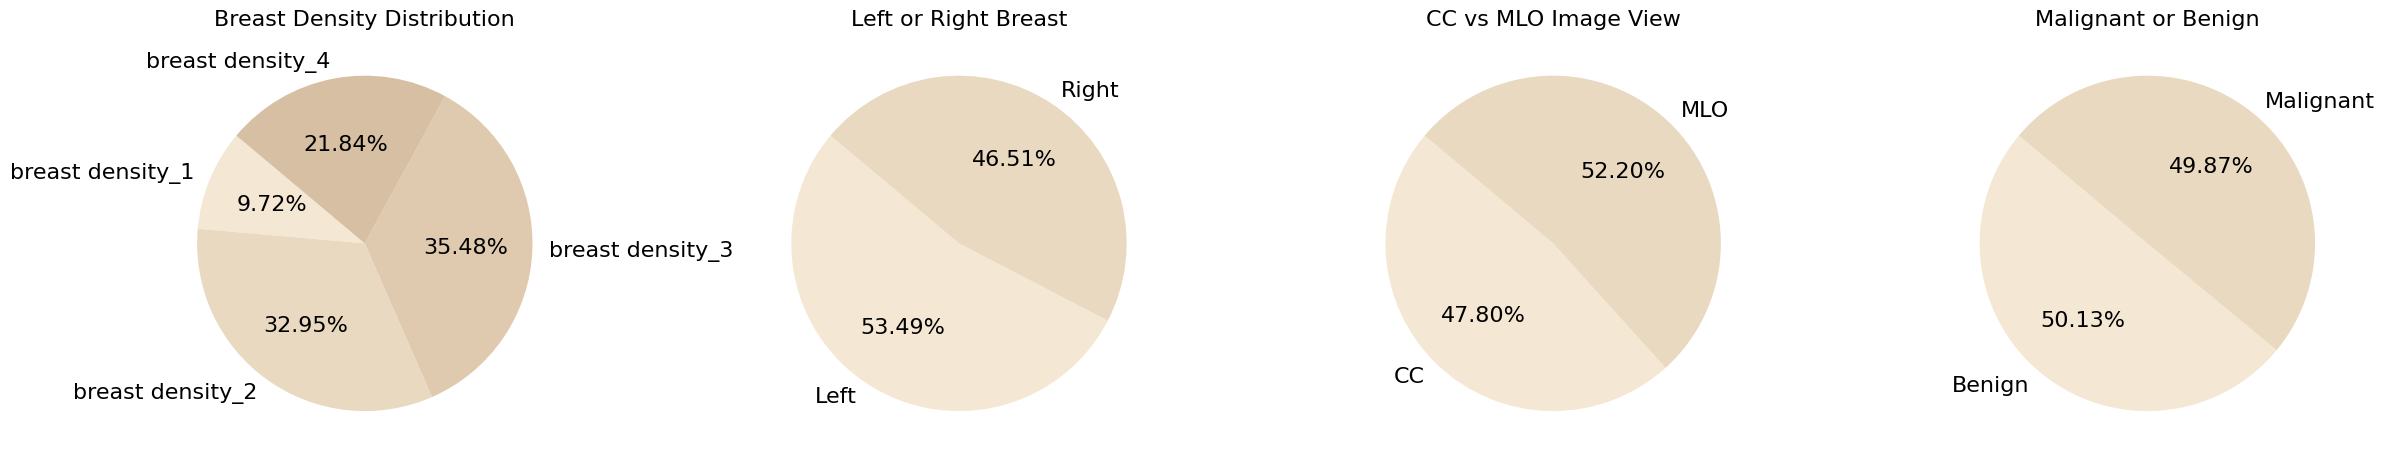

In [ ]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, ax = plt.subplots(1, 4, figsize=(24, 6))
(ax1, ax2, ax3, ax4) = ax

colors = ['#f4e7d3', '#e9d9c0', '#dfcab0', '#d6bfa2']

# Subplot 1: Breast Density Distribution
density_columns = ['breast density_1', 'breast density_2', 'breast density_3', 'breast density_4']
density_counts = balanced_df[density_columns].sum()
ax1.pie(density_counts, labels=density_columns, autopct='%1.2f%%', startangle=140, textprops={'fontsize': 16}, colors=colors)
ax1.set_title('Breast Density Distribution', fontsize=16)

# Subplot 2: Left or Right Breast
side_counts = balanced_df[['left or right breast_LEFT', 'left or right breast_RIGHT']].sum()
ax2.pie(side_counts, labels=['Left', 'Right'], autopct='%1.2f%%', startangle=140, textprops={'fontsize': 16}, colors=colors)
ax2.set_title('Left or Right Breast', fontsize=16)

# Subplot 3: CC vs MLO
view_counts = balanced_df[['image view_CC', 'image view_MLO']].sum()
ax3.pie(view_counts, labels=['CC', 'MLO'], autopct='%1.2f%%', startangle=140, textprops={'fontsize': 16}, colors=colors)
ax3.set_title('CC vs MLO Image View', fontsize=16)

# Subplot 4: Malignant or Benign
malignant_counts = balanced_df['malignant'].value_counts()
ax4.pie(malignant_counts, labels=['Benign', 'Malignant'], autopct='%1.2f%%', startangle=140, textprops={'fontsize': 16}, colors=colors)
ax4.set_title('Malignant or Benign', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


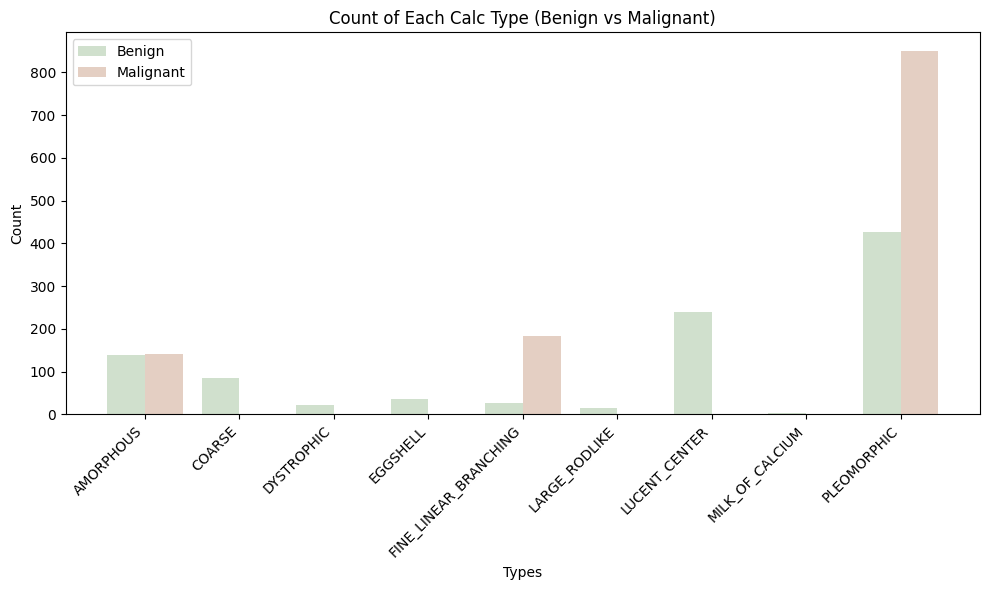

In [ ]:
import matplotlib.pyplot as plt

# Define the columns of interest
type_of_interest = [
    'AMORPHOUS', 'COARSE', 'DYSTROPHIC', 'EGGSHELL', 'FINE_LINEAR_BRANCHING',
    'LARGE_RODLIKE', 'LUCENT_CENTER', 'MILK_OF_CALCIUM', 'PLEOMORPHIC'
]

# Assuming resampled_df is your DataFrame and 'malignant' is the target column
malignant_calc = balanced_df[balanced_df['malignant'] == 1]
benign_calc = balanced_df[balanced_df['malignant'] == 0]

# Calculate the sum of each type for benign and malignant cases
malignant_sums = malignant_calc[type_of_interest].sum()
benign_sums = benign_calc[type_of_interest].sum()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the counts for benign and malignant cases
bar_width = 0.4
index = range(len(type_of_interest))

bar1 = ax.bar(index, benign_sums, bar_width, label='Benign')
bar2 = ax.bar([i + bar_width for i in index], malignant_sums, bar_width, label='Malignant')

# Add labels and title
ax.set_xlabel('Types')
ax.set_ylabel('Count')
ax.set_title('Count of Each Calc Type (Benign vs Malignant)')

# Add x-ticks with labels
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(type_of_interest, rotation=45, ha='right')

# Add a legend
ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


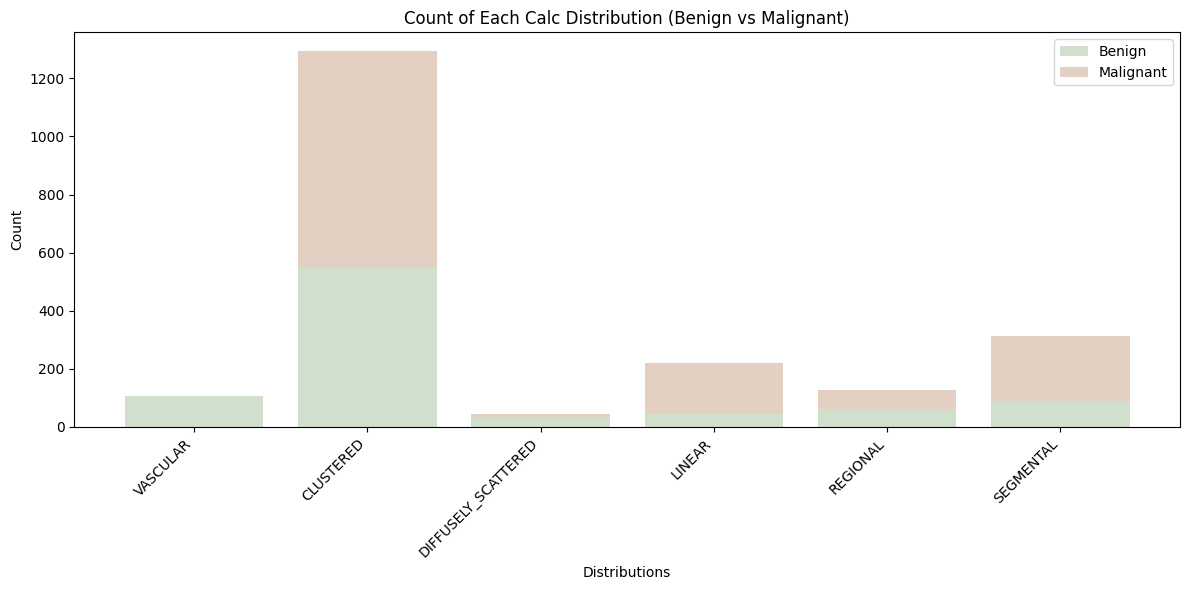

In [ ]:
import matplotlib.pyplot as plt

# Define columns of interest
dist_of_interest = ['VASCULAR', 'CLUSTERED', 'DIFFUSELY_SCATTERED', 'LINEAR', 'REGIONAL', 'SEGMENTAL']

# Separate the data into malignant and benign cases
malignant_calc = balanced_df[balanced_df['malignant'] == 1]
benign_calc = balanced_df[balanced_df['malignant'] == 0]

# Calculate the sum of each distribution for malignant and benign cases
malignant_sums = malignant_calc[dist_of_interest].sum()
benign_sums = benign_calc[dist_of_interest].sum()

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the benign and malignant distributions
ax.bar(dist_of_interest, benign_sums, label='Benign')
ax.bar(dist_of_interest, malignant_sums, bottom=benign_sums, label='Malignant')

# Set labels and title
ax.set_xlabel('Distributions')
ax.set_ylabel('Count')
ax.set_title('Count of Each Calc Distribution (Benign vs Malignant)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


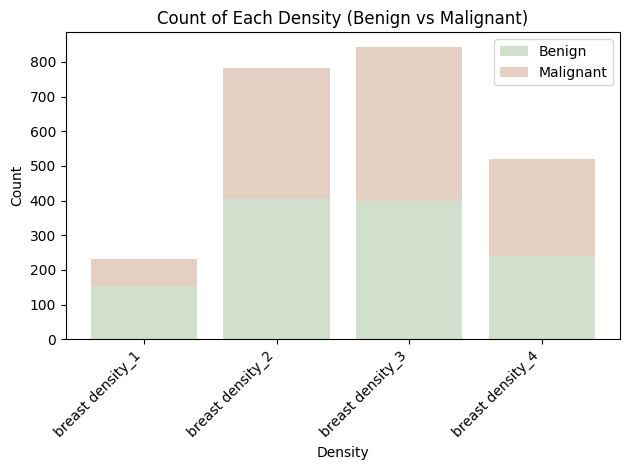

In [ ]:
import matplotlib.pyplot as plt

# Filter malignant and benign masses
malignant_calc = balanced_df[balanced_df['malignant'] == 1]
benign_calc = balanced_df[balanced_df['malignant'] == 0]

# Count occurrences for each breast density category
density_columns = ['breast density_1', 'breast density_2', 'breast density_3', 'breast density_4']

malignant_sums = malignant_calc[density_columns].sum()
benign_sums = benign_calc[density_columns].sum()

# Ensure both malignant and benign have the same indices
density_of_interest = ['breast density_1', 'breast density_2', 'breast density_3', 'breast density_4']
malignant_sums = malignant_sums[density_of_interest]
benign_sums = benign_sums[density_of_interest]

# Create a bar plot
fig, ax = plt.subplots()

# Plot bars for benign and malignant
ax.bar(density_of_interest, benign_sums, label='Benign', color='#D0E0CD')
ax.bar(density_of_interest, malignant_sums, bottom=benign_sums, label='Malignant', color='#e4cfc3')

# Set labels and title
ax.set_xlabel('Density')
ax.set_ylabel('Count')
ax.set_title('Count of Each Density (Benign vs Malignant)')
ax.legend()

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


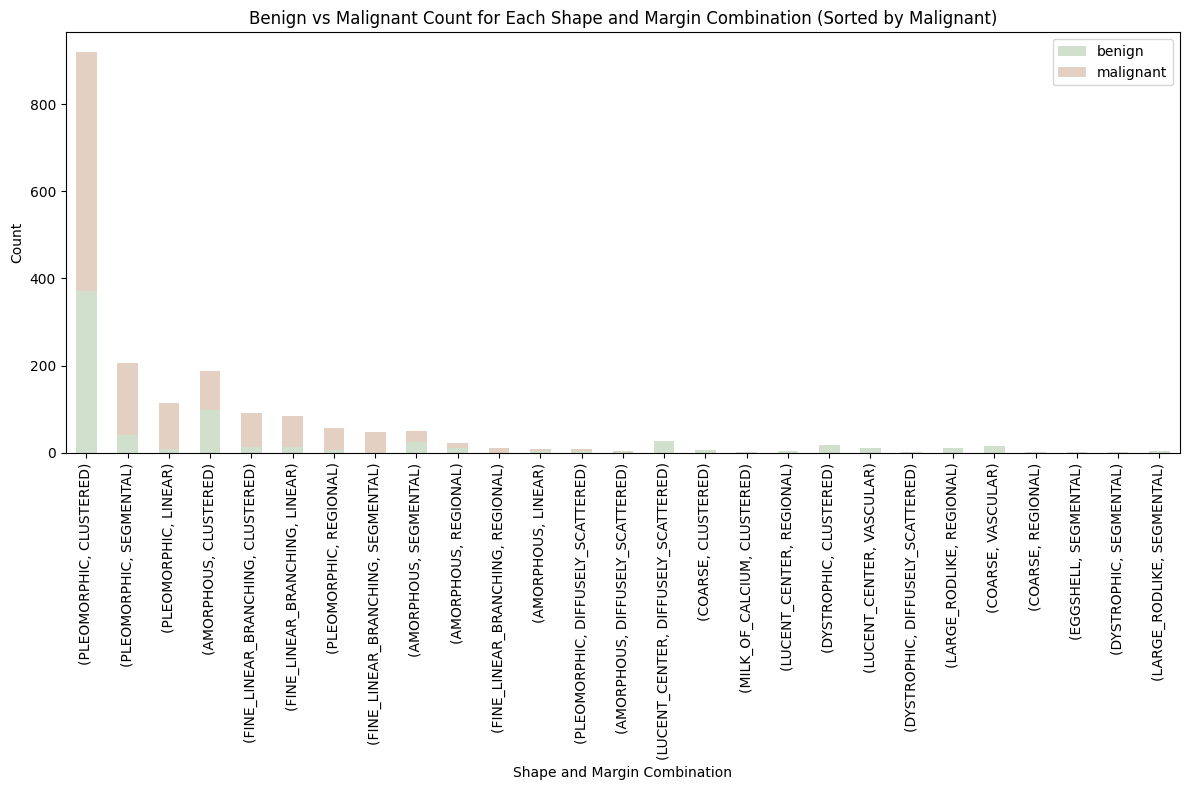

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the lists of interest
type_of_interest = ['AMORPHOUS', 'COARSE', 'DYSTROPHIC', 'EGGSHELL', 'FINE_LINEAR_BRANCHING',
                    'LARGE_RODLIKE', 'LUCENT_CENTER', 'MILK_OF_CALCIUM', 'PLEOMORPHIC']

dist_of_interest = ['VASCULAR', 'CLUSTERED', 'DIFFUSELY_SCATTERED', 'LINEAR', 'REGIONAL', 'SEGMENTAL']

# Create a DataFrame to store the counts
combinations = []

# Loop through each type and distribution combination
for type_ in type_of_interest:
    for dist in dist_of_interest:
        # Count the number of malignant and benign cases for each combination
        malignant_count = balanced_df[(balanced_df[type_] == 1) &
                                           (balanced_df[dist] == 1) &
                                           (balanced_df['malignant'] == 1)].shape[0]
        benign_count = balanced_df[(balanced_df[type_] == 1) &
                                        (balanced_df[dist] == 1) &
                                        (balanced_df['malignant'] == 0)].shape[0]

        # Append the result to the combinations list
        combinations.append({'Type': type_, 'Distribution': dist, 'malignant': malignant_count, 'benign': benign_count})

# Convert to DataFrame for easier manipulation
combinations_df = pd.DataFrame(combinations)

# Filter combinations that have more than 1 appearance (either malignant or benign)
combinations_df = combinations_df[(combinations_df['malignant'] + combinations_df['benign']) > 1]

# Sort the DataFrame by malignant count in descending order
combinations_df = combinations_df.sort_values(by='malignant', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Stack the bars for malignant and benign counts with the specified colors
combinations_df.set_index(['Type', 'Distribution'])[['benign', 'malignant']].plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['#D0E0CD', '#e4cfc3']
)

# Adding labels and title
ax.set_xlabel('Shape and Margin Combination')
ax.set_ylabel('Count')
ax.set_title('Benign vs Malignant Count for Each Shape and Margin Combination (Sorted by Malignant)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**run the models 100 time with balance dataset**

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Ridge Classifier": RidgeClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "LightGBM": LGBMClassifier(),
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM - Linear": SVC(kernel='linear', probability=True),
    "Naive Bayes": GaussianNB()
}

num_runs = 100
n_splits = 10

for run in range(num_runs):
    # Shuffle and reset the index of the original DataFrame
    calc_one_hot_shuffled = resampled_df.sample(frac=1, random_state=42*run).reset_index(drop=True)

    # Features and target
    X = calc_one_hot_shuffled.drop(['malignant', 'patient_id', 'tumor_id', 'abnormality id'], axis=1)
    y = calc_one_hot_shuffled['malignant']
    groups = calc_one_hot_shuffled['patient_id']
    abnormality_ids = calc_one_hot_shuffled['abnormality id']
    tumor_id = calc_one_hot_shuffled['tumor_id']

    # Replace whitespaces in feature names with underscores
    X.columns = [col.replace(" ", "_") for col in X.columns]

    all_predictions = []

    # Get unique patient IDs
    unique_patient_ids = groups.unique()
    np.random.seed(42*run)  # Set seed for reproducibility

    # Shuffle the patient IDs
    np.random.shuffle(unique_patient_ids)

    # Split the patient IDs into folds
    fold_size = len(unique_patient_ids) // n_splits
    predefined_splits = []

    for fold in range(n_splits):
        test_ids = unique_patient_ids[fold * fold_size: (fold + 1) * fold_size]
        train_ids = np.setdiff1d(unique_patient_ids, test_ids)
        predefined_splits.append((train_ids, test_ids))

    # Handle any patient IDs not included in the folds
    all_test_ids = np.concatenate([test_ids for _, test_ids in predefined_splits])
    missing_ids = np.setdiff1d(unique_patient_ids, all_test_ids)
    print(missing_ids)
    if len(missing_ids) > 0:
        for missing_id in missing_ids:
            random_fold = np.random.choice(n_splits)
            train_ids, test_ids = predefined_splits[random_fold]
            test_ids = np.append(test_ids, missing_id)
            predefined_splits[random_fold] = (train_ids, test_ids)

    group_kfold = GroupKFold(n_splits=n_splits)

    for model_name, model in models.items():
        original_model = copy.deepcopy(model) # run folds on og
        fold_count = 1
        all_model_predictions = []

        for fold_idx, (train_ids, test_ids) in enumerate(predefined_splits):
            model = copy.deepcopy(original_model)
            train_idx = groups.isin(train_ids)
            test_idx = groups.isin(test_ids)

            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            patient_ids = groups[test_idx]
            abnormality_test_ids = abnormality_ids[test_idx]
            tumor_id_test = tumor_id[test_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)[:, 1]
                for pid, ab_id, y_t, y_p, y_pr, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, y_prob, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, y_pr, fold_count, t_id))
            else:
                for pid, ab_id, y_t, y_p, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, None, fold_count, t_id))

            fold_count += 1

        predictions_df = pd.DataFrame(all_model_predictions, columns=['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id'])

        # Include only the specified columns
        predictions_df = predictions_df[['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id']]

        predictions_df.to_csv(f'/content/drive/My Drive/DDSM data/DDSM_compareModels_Calc/compare_All_Models_v2/Results_shapeDivided_{model_name}_{run + 1}.csv', index=False)


In [ ]:
import pandas as pd
import os
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

# Define the path to your CSV files
base_path = '/content/drive/My Drive/DDSM data/DDSM_compareModels_Calc/compare_All_Models_v2/'

# Define the models
models = [
    "Logistic Regression", "Linear Discriminant Analysis", "Ridge Classifier",
    "Ada Boost Classifier", "Extra Trees Classifier", "LightGBM",
    "XGBoost", "Random Forest", "K Neighbors Classifier",
    "Decision Tree", "SVM - Linear", "Naive Bayes"
]

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_prob=None):
    metrics = {}
    if len(y_true) > 0:  # Check if y_true has at least one sample
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
        metrics['recall'] = recall_score(y_true, y_pred)
        metrics['precision'] = precision_score(y_true, y_pred)
        metrics['f1_score'] = f1_score(y_true, y_pred)
    else:
        metrics['accuracy'] = None
        metrics['recall'] = None
        metrics['precision'] = None
        metrics['f1_score'] = None

    if y_prob is not None:
        valid_indices = ~np.isnan(y_prob)  # Find indices where y_prob is not NaN
        if len(y_true[valid_indices]) > 0:  # Check if y_true has at least one non-NaN sample
            metrics['auc'] = roc_auc_score(y_true[valid_indices], y_prob[valid_indices])
        else:
            metrics['auc'] = None
    else:
        metrics['auc'] = None

    return metrics


# Initialize a dictionary to store the results
results = {model: [] for model in models}

# Read and process each CSV file
for model_name in models:
    for run in range(1, 101):
        file_path = os.path.join(base_path, f'Results_shapeDivided_{model_name}_{run}.csv')
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            y_true = df['y_true']
            y_pred = df['y_pred']
            y_prob = df['y_prob'] if 'y_prob' in df.columns else None
            metrics = calculate_metrics(y_true, y_pred, y_prob)
            results[model_name].append(metrics)

# Calculate the average metrics for each model
average_results = {}
for model_name, metrics_list in results.items():
    valid_auc_values = [d['auc'] for d in metrics_list if d['auc'] is not None]
    avg_metrics = {
        'accuracy': sum(d['accuracy'] for d in metrics_list) / len(metrics_list),
        'recall': sum(d['recall'] for d in metrics_list) / len(metrics_list),
        'precision': sum(d['precision'] for d in metrics_list) / len(metrics_list),
        'f1_score': sum(d['f1_score'] for d in metrics_list) / len(metrics_list),
        'auc': sum(valid_auc_values) / len(valid_auc_values) if len(valid_auc_values) > 0 else None
    }
    average_results[model_name] = avg_metrics


# Print the average metrics for each model
for model_name, avg_metrics in average_results.items():
    print(f"Model: {model_name}")
    for metric, value in avg_metrics.items():
        if value is not None:
            print(f"  {metric}: {value:.4f}")
        else:
            print(f"  {metric}: None")
    print("\n")


Model: Logistic Regression
  accuracy: 0.7783
  recall: 0.7324
  precision: 0.8056
  f1_score: 0.7672
  auc: 0.8888


Model: Linear Discriminant Analysis
  accuracy: 0.7804
  recall: 0.7233
  precision: 0.8156
  f1_score: 0.7666
  auc: 0.8879


Model: Ridge Classifier
  accuracy: 0.7797
  recall: 0.7237
  precision: 0.8141
  f1_score: 0.7662
  auc: None


Model: Ada Boost Classifier
  accuracy: 0.7772
  recall: 0.7312
  precision: 0.8044
  f1_score: 0.7660
  auc: 0.8874


Model: Extra Trees Classifier
  accuracy: 0.7726
  recall: 0.7015
  precision: 0.8167
  f1_score: 0.7547
  auc: 0.8709


Model: LightGBM
  accuracy: 0.7667
  recall: 0.7000
  precision: 0.8069
  f1_score: 0.7496
  auc: 0.8817


Model: XGBoost
  accuracy: 0.7686
  recall: 0.7010
  precision: 0.8095
  f1_score: 0.7513
  auc: 0.8813


Model: Random Forest
  accuracy: 0.7717
  recall: 0.7209
  precision: 0.8015
  f1_score: 0.7590
  auc: 0.8826


Model: K Neighbors Classifier
  accuracy: 0.7603
  recall: 0.7551
  precision

In [ ]:
# Create empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'Metric', 'Value'])

# Calculate average and std for each metric
rows_to_concat = []

for model_name, metrics_list in results.items():
    avg_metrics = {
        'accuracy': sum(d['accuracy'] for d in metrics_list) / len(metrics_list),
        'precision': sum(d['precision'] for d in metrics_list) / len(metrics_list),
        'recall': sum(d['recall'] for d in metrics_list) / len(metrics_list),
        'f1_score': sum(d['f1_score'] for d in metrics_list) / len(metrics_list),
        'auc': sum(d['auc'] for d in metrics_list if d['auc'] is not None) / len([d for d in metrics_list if d['auc'] is not None]) if len([d for d in metrics_list if d['auc'] is not None]) > 0 else None
    }

    # Calculate standard deviation
    std_metrics = {
        'accuracy': np.std([d['accuracy'] for d in metrics_list]),
        'precision': np.std([d['precision'] for d in metrics_list]),
        'recall': np.std([d['recall'] for d in metrics_list]),
        'f1_score': np.std([d['f1_score'] for d in metrics_list]),
        'auc': np.std([d['auc'] for d in metrics_list if d['auc'] is not None])
    }

    # Add average metrics to DataFrame
    for metric, value in avg_metrics.items():
        if value is not None:
            rows_to_concat.append({'Model': model_name, 'Metric': metric, 'Value': value})

    # Add std metrics to DataFrame
    for metric, value in std_metrics.items():
        rows_to_concat.append({'Model': model_name, 'Metric': metric + '_std', 'Value': value})

# Concatenate the rows
results_df = pd.concat([results_df, pd.DataFrame(rows_to_concat)], ignore_index=True)

# Pivot the DataFrame for better readability
results_df = results_df.pivot(index='Model', columns='Metric', values='Value')

# Display the results DataFrame
results_df


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-44-bc0cd809715d>:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame(rows_to_concat)], ignore_index=True)


Metric                        accuracy  accuracy_std       auc   auc_std  \
Model                                                                      
Ada Boost Classifier          0.777165      0.004582  0.887356  0.002030   
Decision Tree                 0.760422      0.005521  0.847997  0.005819   
Extra Trees Classifier        0.772571      0.004113  0.870943  0.003480   
K Neighbors Classifier        0.760261      0.007669  0.856730  0.004827   
LightGBM                      0.766748      0.005427  0.881692  0.002863   
Linear Discriminant Analysis  0.780366      0.004112  0.887927  0.001984   
Logistic Regression           0.778297      0.004520  0.888806  0.001717   
Naive Bayes                   0.698156      0.003038  0.713326  0.001001   
Random Forest                 0.771722      0.004504  0.882553  0.002910   
Ridge Classifier              0.779737      0.004268       NaN       NaN   
SVM - Linear                  0.769459      0.009404  0.870084  0.004175   
XGBoost                       0.768568      0.005136  0.881256  0.002868   

Metric                        f1_score  f1_score_std  precision  \
Model                                                             
Ada Boost Classifier          0.765986      0.003690   0.804379   
Decision Tree                 0.740624      0.005481   0.805088   
Extra Trees Classifier        0.754711      0.004338   0.816685   
K Neighbors Classifier        0.758500      0.007168   0.762984   
LightGBM                      0.749592      0.005234   0.806886   
Linear Discriminant Analysis  0.766623      0.003735   0.815594   
Logistic Regression           0.767198      0.003717   0.805552   
Naive Bayes                   0.766445      0.001804   0.624062   
Random Forest                 0.759034      0.004666   0.801507   
Ridge Classifier              0.766222      0.003849   0.814128   
SVM - Linear                  0.750471      0.006666   0.816586   
XGBoost                       0.751343      0.005176   0.809489   

Metric                        precision_std    recall  recall_std  
Model                                                              
Ada Boost Classifier               0.008966  0.731168    0.004407  
Decision Tree                      0.009580  0.685802    0.006923  
Extra Trees Classifier             0.006738  0.701525    0.005801  
K Neighbors Classifier             0.019264  0.755137    0.023476  
LightGBM                           0.009303  0.699967    0.006151  
Linear Discriminant Analysis       0.008007  0.723268    0.005339  
Logistic Regression                0.008786  0.732404    0.004516  
Naive Bayes                        0.002386  0.993015    0.000684  
Random Forest                      0.006660  0.720880    0.006088  
Ridge Classifier                   0.008360  0.723717    0.005514  
SVM - Linear                       0.023369  0.694861    0.012255  
XGBoost                            0.008219  0.701042    0.006020

**Now we want to test the results so that only the original data will be in test dataset**

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Ridge Classifier": RidgeClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "LightGBM": LGBMClassifier(),
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM - Linear": SVC(kernel='linear', probability=True),
    "Naive Bayes": GaussianNB()
}

num_runs = 100
n_splits = 10

for run in range(num_runs):
    # Shuffle and reset the index of the balanced DataFrame
    calc_one_hot_shuffled = balanced_df.sample(frac=1, random_state=42*run).reset_index(drop=True)

    # Features and target
    X = calc_one_hot_shuffled.drop(['malignant', 'patient_id', 'tumor_id', 'abnormality id', 'original'], axis=1)
    y = calc_one_hot_shuffled['malignant']
    groups = calc_one_hot_shuffled['patient_id']
    abnormality_ids = calc_one_hot_shuffled['abnormality id']
    tumor_id = calc_one_hot_shuffled['tumor_id']
    data_source = calc_one_hot_shuffled['original']

    # Replace whitespaces in feature names with underscores
    X.columns = [col.replace(" ", "_") for col in X.columns]

    all_predictions = []

    # Get unique patient IDs
    unique_patient_ids = groups.unique()
    np.random.seed(42*run)  # Set seed for reproducibility

    # Shuffle the patient IDs
    np.random.shuffle(unique_patient_ids)

    # Split the patient IDs into folds
    fold_size = len(unique_patient_ids) // n_splits
    predefined_splits = []

    for fold in range(n_splits):
        test_ids = unique_patient_ids[fold * fold_size: (fold + 1) * fold_size]
        train_ids = np.setdiff1d(unique_patient_ids, test_ids)
        predefined_splits.append((train_ids, test_ids))

    # Handle any patient IDs not included in the folds
    all_test_ids = np.concatenate([test_ids for _, test_ids in predefined_splits])
    missing_ids = np.setdiff1d(unique_patient_ids, all_test_ids)
    if len(missing_ids) > 0:
        for missing_id in missing_ids:
            random_fold = np.random.choice(n_splits)
            train_ids, test_ids = predefined_splits[random_fold]
            test_ids = np.append(test_ids, missing_id)
            predefined_splits[random_fold] = (train_ids, test_ids)

    group_kfold = GroupKFold(n_splits=n_splits)

    for model_name, model in models.items():
        original_model = copy.deepcopy(model)
        fold_count = 1
        all_model_predictions = []

        for fold_idx, (train_ids, test_ids) in enumerate(predefined_splits):
            model = copy.deepcopy(original_model)

            # Create training and testing masks
            train_idx = groups.isin(train_ids)
            test_idx = groups.isin(test_ids)
            train_idy = groups.isin(train_ids) & (data_source == 1)
            test_idy = groups.isin(test_ids) & (data_source == 1)

            # Apply the masks to your features and target
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idy], y[test_idy]

            # Filter X_train and X_test to match y_train and y_test indices
            X_train = X_train.loc[train_idy]
            X_test = X_test.loc[test_idy]

            patient_ids = groups[test_idx]
            abnormality_test_ids = abnormality_ids[test_idx]
            tumor_id_test = tumor_id[test_idx]

            # Fit the model and make predictions
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Collect predictions
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)[:, 1]
                for pid, ab_id, y_t, y_p, y_pr, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, y_prob, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, y_pr, fold_count, t_id))
            else:
                for pid, ab_id, y_t, y_p, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, None, fold_count, t_id))

            fold_count += 1

        # Save predictions to a DataFrame
        predictions_df = pd.DataFrame(all_model_predictions, columns=['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id'])

        # Save results to CSV
        predictions_df.to_csv(f'/content/drive/My Drive/DDSM data/DDSM_compareModels_Calc/compare_All_Models_v3/Results_shapeDivided_{model_name}_{run + 1}.csv', index=False)


In [ ]:
import pandas as pd
import os
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

# Define the path to your CSV files
base_path = '/content/drive/My Drive/DDSM data/DDSM_compareModels_Calc/compare_All_Models_v3/'

# Define the models
models = [
    "Logistic Regression", "Linear Discriminant Analysis", "Ridge Classifier",
    "Ada Boost Classifier", "Extra Trees Classifier", "LightGBM",
    "XGBoost", "Random Forest", "K Neighbors Classifier",
    "Decision Tree", "SVM - Linear", "Naive Bayes"
]

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_prob=None):
    metrics = {}
    if len(y_true) > 0:  # Check if y_true has at least one sample
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
        metrics['recall'] = recall_score(y_true, y_pred)
        metrics['precision'] = precision_score(y_true, y_pred)
        metrics['f1_score'] = f1_score(y_true, y_pred)
    else:
        metrics['accuracy'] = None
        metrics['recall'] = None
        metrics['precision'] = None
        metrics['f1_score'] = None

    if y_prob is not None:
        valid_indices = ~np.isnan(y_prob)  # Find indices where y_prob is not NaN
        if len(y_true[valid_indices]) > 0:  # Check if y_true has at least one non-NaN sample
            metrics['auc'] = roc_auc_score(y_true[valid_indices], y_prob[valid_indices])
        else:
            metrics['auc'] = None
    else:
        metrics['auc'] = None

    return metrics


# Initialize a dictionary to store the results
results = {model: [] for model in models}

# Read and process each CSV file
for model_name in models:
    for run in range(1, 101):
        file_path = os.path.join(base_path, f'Results_shapeDivided_{model_name}_{run}.csv')
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            y_true = df['y_true']
            y_pred = df['y_pred']
            y_prob = df['y_prob'] if 'y_prob' in df.columns else None
            metrics = calculate_metrics(y_true, y_pred, y_prob)
            results[model_name].append(metrics)

# Calculate the average metrics for each model
average_results = {}
for model_name, metrics_list in results.items():
    valid_auc_values = [d['auc'] for d in metrics_list if d['auc'] is not None]
    avg_metrics = {
        'accuracy': sum(d['accuracy'] for d in metrics_list) / len(metrics_list),
        'recall': sum(d['recall'] for d in metrics_list) / len(metrics_list),
        'precision': sum(d['precision'] for d in metrics_list) / len(metrics_list),
        'f1_score': sum(d['f1_score'] for d in metrics_list) / len(metrics_list),
        'auc': sum(valid_auc_values) / len(valid_auc_values) if len(valid_auc_values) > 0 else None
    }
    average_results[model_name] = avg_metrics


# Print the average metrics for each model
for model_name, avg_metrics in average_results.items():
    print(f"Model: {model_name}")
    for metric, value in avg_metrics.items():
        if value is not None:
            print(f"  {metric}: {value:.4f}")
        else:
            print(f"  {metric}: None")
    print("\n")


Model: Logistic Regression
  accuracy: 0.7200
  recall: 0.5194
  precision: 0.6354
  f1_score: 0.5715
  auc: 0.8031


Model: Linear Discriminant Analysis
  accuracy: 0.7197
  recall: 0.5106
  precision: 0.6377
  f1_score: 0.5670
  auc: 0.7998


Model: Ridge Classifier
  accuracy: 0.7212
  recall: 0.5034
  precision: 0.6435
  f1_score: 0.5648
  auc: None


Model: Ada Boost Classifier
  accuracy: 0.7158
  recall: 0.5244
  precision: 0.6251
  f1_score: 0.5702
  auc: 0.8005


Model: Extra Trees Classifier
  accuracy: 0.7062
  recall: 0.4604
  precision: 0.6240
  f1_score: 0.5297
  auc: 0.7797


Model: LightGBM
  accuracy: 0.7010
  recall: 0.4709
  precision: 0.6089
  f1_score: 0.5310
  auc: 0.7911


Model: XGBoost
  accuracy: 0.7049
  recall: 0.4695
  precision: 0.6182
  f1_score: 0.5336
  auc: 0.7907


Model: Random Forest
  accuracy: 0.7048
  recall: 0.4924
  precision: 0.6110
  f1_score: 0.5453
  auc: 0.7914


Model: K Neighbors Classifier
  accuracy: 0.6881
  recall: 0.5432
  precision

In [ ]:
# Create empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'Metric', 'Value'])

# Calculate average and std for each metric
rows_to_concat = []

for model_name, metrics_list in results.items():
    avg_metrics = {
        'accuracy': sum(d['accuracy'] for d in metrics_list) / len(metrics_list),
        'precision': sum(d['precision'] for d in metrics_list) / len(metrics_list),
        'recall': sum(d['recall'] for d in metrics_list) / len(metrics_list),
        'f1_score': sum(d['f1_score'] for d in metrics_list) / len(metrics_list),
        'auc': sum(d['auc'] for d in metrics_list if d['auc'] is not None) / len([d for d in metrics_list if d['auc'] is not None]) if len([d for d in metrics_list if d['auc'] is not None]) > 0 else None
    }

    # Calculate standard deviation
    std_metrics = {
        'accuracy': np.std([d['accuracy'] for d in metrics_list]),
        'precision': np.std([d['precision'] for d in metrics_list]),
        'recall': np.std([d['recall'] for d in metrics_list]),
        'f1_score': np.std([d['f1_score'] for d in metrics_list]),
        'auc': np.std([d['auc'] for d in metrics_list if d['auc'] is not None])
    }

    # Add average metrics to DataFrame
    for metric, value in avg_metrics.items():
        if value is not None:
            rows_to_concat.append({'Model': model_name, 'Metric': metric, 'Value': value})

    # Add std metrics to DataFrame
    for metric, value in std_metrics.items():
        rows_to_concat.append({'Model': model_name, 'Metric': metric + '_std', 'Value': value})

# Concatenate the rows
results_df = pd.concat([results_df, pd.DataFrame(rows_to_concat)], ignore_index=True)

# Pivot the DataFrame for better readability
results_df = results_df.pivot(index='Model', columns='Metric', values='Value')

# Display the results DataFrame
results_df


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-46-bc0cd809715d>:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame(rows_to_concat)], ignore_index=True)


Metric                        accuracy  accuracy_std       auc   auc_std  \
Model                                                                      
Ada Boost Classifier          0.715849      0.005459  0.800548  0.003289   
Decision Tree                 0.693462      0.007489  0.756033  0.009358   
Extra Trees Classifier        0.706191      0.005268  0.779698  0.005731   
K Neighbors Classifier        0.688098      0.009803  0.756948  0.007651   
LightGBM                      0.700962      0.006159  0.791074  0.005140   
Linear Discriminant Analysis  0.719696      0.004468  0.799808  0.002998   
Logistic Regression           0.719978      0.005299  0.803138  0.002688   
Naive Bayes                   0.607212      0.003550  0.710051  0.001672   
Random Forest                 0.704754      0.006458  0.791371  0.005182   
Ridge Classifier              0.721170      0.004060       NaN       NaN   
SVM - Linear                  0.709802      0.010982  0.773498  0.006522   
XGBoost                       0.704915      0.007007  0.790711  0.005097   

Metric                        f1_score  f1_score_std  precision  \
Model                                                             
Ada Boost Classifier          0.570235      0.006323   0.625126   
Decision Tree                 0.509830      0.009781   0.599952   
Extra Trees Classifier        0.529748      0.008289   0.624019   
K Neighbors Classifier        0.555326      0.018689   0.570720   
LightGBM                      0.530991      0.009301   0.608923   
Linear Discriminant Analysis  0.567033      0.006259   0.637693   
Logistic Regression           0.571513      0.006467   0.635396   
Naive Bayes                   0.643846      0.002066   0.477626   
Random Forest                 0.545268      0.009817   0.611038   
Ridge Classifier              0.564840      0.006697   0.643497   
SVM - Linear                  0.529406      0.009732   0.636961   
XGBoost                       0.533568      0.010402   0.618191   

Metric                        precision_std    recall  recall_std  
Model                                                              
Ada Boost Classifier               0.011268  0.524354    0.008048  
Decision Tree                      0.015754  0.443418    0.009995  
Extra Trees Classifier             0.011723  0.460386    0.010517  
K Neighbors Classifier             0.018608  0.543165    0.040554  
LightGBM                           0.012586  0.470921    0.011429  
Linear Discriminant Analysis       0.009451  0.510579    0.008189  
Logistic Regression                0.011334  0.519444    0.008155  
Naive Bayes                        0.002268  0.987533    0.002047  
Random Forest                      0.012380  0.492437    0.011798  
Ridge Classifier                   0.008178  0.503403    0.008549  
SVM - Linear                       0.029913  0.454101    0.018112  
XGBoost                            0.014662  0.469525    0.012147

**Observations**

After having run the models 100 iterations, we calculated the average metrics and stds for all models.
Top 3 accuracies:


*   Logistic Regression
*   Ada Boost Classifier
*   Linear Discriminant Analysis



# Try to experiment with AdaBoost hyperparameters


https://www.kaggle.com/code/shubhamlipare/adaboost-tutorial-with-hyperparameter-tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

num_runs = 100
n_splits = 10

# Define the parameter grid for AdaBoost
base_estimators = [
    DecisionTreeClassifier(max_depth=2)
    ]

param_grid_adaboost = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'base_estimator': base_estimators
}

models = {
    "Ada Boost Classifier": AdaBoostClassifier()
}


# Rest of your code remains the same
for run in range(63,num_runs):
    print("Run: ", run)
    # Shuffle and reset the index of the original DataFrame
    calc_one_hot_shuffled = calc_one_hot.sample(frac=1, random_state=42*run).reset_index(drop=True)

    # Features and target
    X = calc_one_hot_shuffled.drop(['malignant', 'patient_id', 'tumor_id', 'abnormality id'], axis=1)
    y = calc_one_hot_shuffled['malignant']
    groups = calc_one_hot_shuffled['patient_id']
    abnormality_ids = calc_one_hot_shuffled['abnormality id']
    tumor_id = calc_one_hot_shuffled['tumor_id']

    # Replace whitespaces in feature names with underscores
    X.columns = [col.replace(" ", "_") for col in X.columns]

    all_predictions = []

    # Get unique patient IDs
    unique_patient_ids = groups.unique()
    np.random.seed(42*run)  # Set seed for reproducibility

    # Shuffle the patient IDs
    np.random.shuffle(unique_patient_ids)

    # Split the patient IDs into folds
    fold_size = len(unique_patient_ids) // n_splits
    predefined_splits = []

    for fold in range(n_splits):
        test_ids = unique_patient_ids[fold * fold_size: (fold + 1) * fold_size]
        train_ids = np.setdiff1d(unique_patient_ids, test_ids)
        predefined_splits.append((train_ids, test_ids))

    # Handle any patient IDs not included in the folds
    all_test_ids = np.concatenate([test_ids for _, test_ids in predefined_splits])
    missing_ids = np.setdiff1d(unique_patient_ids, all_test_ids)
    print(missing_ids)
    if len(missing_ids) > 0:
        for missing_id in missing_ids:
            random_fold = np.random.choice(n_splits)
            train_ids, test_ids = predefined_splits[random_fold]
            test_ids = np.append(test_ids, missing_id)
            predefined_splits[random_fold] = (train_ids, test_ids)

    for model_name, model in models.items():
        original_model = copy.deepcopy(model)  # Run folds on original model
        fold_count = 1
        all_model_predictions = []

        for fold_idx, (train_ids, test_ids) in enumerate(predefined_splits):
            model = copy.deepcopy(original_model)
            train_idx = groups.isin(train_ids)
            test_idx = groups.isin(test_ids)

            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            patient_ids = groups[test_idx]
            abnormality_test_ids = abnormality_ids[test_idx]
            tumor_id_test = tumor_id[test_idx]

            # Apply GridSearchCV only to the AdaBoost model
            if model_name == "Ada Boost Classifier":
                grid_search = GridSearchCV(model, param_grid_adaboost, cv=9, n_jobs=-1)
                grid_search.fit(X_train, y_train)
                model = grid_search.best_estimator_
                print(f"Fold {fold_count} - Best Parameters: {grid_search.best_params_}")
            else:
                model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)[:, 1]
                for pid, ab_id, y_t, y_p, y_pr, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, y_prob, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, y_pr, fold_count, t_id))
            else:
                for pid, ab_id, y_t, y_p, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, None, fold_count, t_id))

            fold_count += 1

        predictions_df = pd.DataFrame(all_model_predictions, columns=['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id'])

        # Include only the specified columns
        predictions_df = predictions_df[['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id']]
        print(predictions_df.head())
        predictions_df.to_csv(f'/content/drive/My Drive/DDSM data/DDSM_compareModels_Calc/AdaBoost_HyperTuned/HyperParametersTuning_{model_name}_{run + 1}.csv', index=False)


In [ ]:
# Define the path to your CSV files
base_path = '/content/drive/My Drive/DDSM data/DDSM_compareModels_Calc/AdaBoost_HyperTuned/'

# Define the models
models = ['HyperParametersTuning_Ada Boost Classifier']
# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_prob=None):
    metrics = {}
    if len(y_true) > 0:  # Check if y_true has at least one sample
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
        metrics['recall'] = recall_score(y_true, y_pred)
        metrics['precision'] = precision_score(y_true, y_pred)
        metrics['f1_score'] = f1_score(y_true, y_pred)
    else:
        metrics['accuracy'] = None
        metrics['recall'] = None
        metrics['precision'] = None
        metrics['f1_score'] = None

    if y_prob is not None:
        valid_indices = ~np.isnan(y_prob)  # Find indices where y_prob is not NaN
        if len(y_true[valid_indices]) > 0:  # Check if y_true has at least one non-NaN sample
            metrics['auc'] = roc_auc_score(y_true[valid_indices], y_prob[valid_indices])
        else:
            metrics['auc'] = None
    else:
        metrics['auc'] = None

    return metrics


# Initialize a dictionary to store the results
results = {model: [] for model in models}

# Read and process each CSV file
for model_name in models:
    for run in range(1, 101):
        file_path = os.path.join(base_path, f'{model_name}_{run}.csv')
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            y_true = df['y_true']
            y_pred = df['y_pred']
            y_prob = df['y_prob'] if 'y_prob' in df.columns else None
            metrics = calculate_metrics(y_true, y_pred, y_prob)
            results[model_name].append(metrics)

# Calculate the average metrics for each model
average_results = {}

for model_name, metrics_list in results.items():
    valid_auc_values = [d['auc'] for d in metrics_list if d['auc'] is not None]
    avg_metrics = {
        'accuracy': sum(d['accuracy'] for d in metrics_list) / len(metrics_list),
        'recall': sum(d['recall'] for d in metrics_list) / len(metrics_list),
        'precision': sum(d['precision'] for d in metrics_list) / len(metrics_list),
        'f1_score': sum(d['f1_score'] for d in metrics_list) / len(metrics_list),
        'auc': sum(valid_auc_values) / len(valid_auc_values) if len(valid_auc_values) > 0 else None
    }
    average_results[model_name] = avg_metrics


# Sort average_results by accuracy (assuming 'accuracy' is the key in the dictionary)
sorted_results = sorted(average_results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

# Print the average metrics for each model in descending order of accuracy
for model_name, avg_metrics in sorted_results:
  print(f"Model: {model_name}")
  for metric, value in avg_metrics.items():
    if value is not None:
      print(f"  {metric}: {value:.4f}")
    else:
      print(f"  {metric}: None")
  print("\n")


Model: HyperParametersTuning_Ada Boost Classifier
  accuracy: 0.7275
  recall: 0.4623
  precision: 0.6781
  f1_score: 0.5494
  auc: 0.8045




In [ ]:
base_path = '/content/drive/My Drive/DDSM data/DDSM_compareModels_Calc/AdaBoost_HyperTuned/'
result_df = pd.DataFrame()

# Loop through all the relevant CSV files
for i in range(1, 101):
    # Construct the filename
    filename = f'{base_path}HyperParametersTuning_Ada Boost Classifier_{i}.csv'

    # Load the CSV file into a DataFrame
    new_df = pd.read_csv(filename)

    # Add a column with the file number
    new_df['file_number'] = i

    # Append the DataFrame to the result DataFrame
    result_df = pd.concat([result_df, new_df], ignore_index=True)

# Save the combined DataFrame to a new CSV file
result_df.to_csv(f'{base_path}ALL_HyperParametersTuning_Ada_Boost.csv', index=False)


In [ ]:
result_df

patient_id  abnormality id  y_true  y_pred    y_prob  fold_number  \
0         P_00377               2       0       0  0.493298            1   
1         P_00723               3       0       0  0.491630            1   
2         P_00713               1       0       0  0.495398            1   
3         P_02460               1       1       1  0.504067            1   
4         P_01769               1       0       0  0.293734            1   
...           ...             ...     ...     ...       ...          ...   
187195    P_01392               1       0       0  0.490569           10   
187196    P_00506               1       0       0  0.264498           10   
187197    P_01769               4       0       0  0.172281           10   
187198    P_00418               1       1       0  0.497299           10   
187199    P_00030               1       0       0  0.263953           10   

        tumor_id  file_number  
0            255            1  
1           1666            1  
2            575            1  
3           1524            1  
4           1354            1  
...          ...          ...  
187195      1082          100  
187196       379          100  
187197      1362          100  
187198       292          100  
187199        47          100  

[187200 rows x 8 columns]

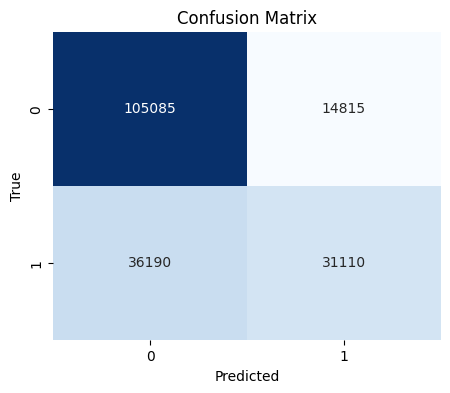

In [ ]:
y_true = result_df['y_true']
y_pred = result_df['y_pred']

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
missclassified_tumors = result_df[result_df['y_true'] != result_df['y_pred']]
missclassified_tumors

patient_id  abnormality id  y_true  y_pred    y_prob  fold_number  \
6         P_01307               1       1       0  0.493237            1   
9         P_00819               1       0       1  0.500324            1   
11        P_01307               1       1       0  0.493237            1   
15        P_01297               2       1       0  0.493298            1   
19        P_00466               1       1       0  0.498185            1   
...           ...             ...     ...     ...       ...          ...   
187175    P_00527               1       1       0  0.496277           10   
187187    P_00655               1       0       1  0.514349           10   
187190    P_00784               1       1       0  0.491046           10   
187192    P_01536               1       1       0  0.496277           10   
187198    P_00418               1       1       0  0.497299           10   

        tumor_id  file_number  
6           1018            1  
9            653            1  
11          1019            1  
15          1006            1  
19          1624            1  
...          ...          ...  
187175       402          100  
187187       528          100  
187190       630          100  
187192      1793          100  
187198       292          100  

[51005 rows x 8 columns]

In [ ]:
grouped_df = missclassified_tumors.groupby('tumor_id').size().reset_index(name='count')

grouped_df = grouped_df.sort_values(by='count', ascending=False)
ensembled_missclassified = grouped_df[grouped_df['count'] > 50]
ensembled_missclassified

tumor_id  count
0           1    100
448       951    100
444       947    100
443       946    100
439       938    100
..        ...    ...
20         23     51
96        184     51
795      1759     51
102       193     51
630      1380     51

[500 rows x 2 columns]

In [ ]:
grouped_df = missclassified_tumors.groupby('tumor_id').size().reset_index(name='count')
grouped_df = grouped_df.sort_values(by='count', ascending=False)
ensembled_missclassified = grouped_df[grouped_df['count'] > 50]
ensembled_missclassified = pd.merge(ensembled_missclassified, result_calc_type, on='tumor_id', how='inner')

ensembled_missclassified

tumor_id  count patient_id  breast density left or right breast  \
0           1    100    P_00005               3                RIGHT   
1         951    100    P_01229               4                RIGHT   
2         947    100    P_01220               4                RIGHT   
3         946    100    P_01220               4                RIGHT   
4         938    100    P_01198               2                RIGHT   
..        ...    ...        ...             ...                  ...   
495        23     51    P_00011               3                 LEFT   
496       184     51    P_00269               3                 LEFT   
497      1759     51    P_01399               3                RIGHT   
498       193     51    P_00276               3                RIGHT   
499      1380     51    P_01810               3                 LEFT   

    image view abnormality id abnormality type calc distribution  assessment  \
0           CC              1    calcification         CLUSTERED           3   
1          MLO              1    calcification         CLUSTERED           4   
2          MLO              1    calcification         CLUSTERED           4   
3           CC              1    calcification         CLUSTERED           4   
4          MLO              1    calcification         CLUSTERED           5   
..         ...            ...              ...               ...         ...   
495         CC              1    calcification         CLUSTERED           4   
496        MLO              1    calcification         CLUSTERED           4   
497        MLO              1    calcification         CLUSTERED           4   
498        MLO              1    calcification         CLUSTERED           4   
499         CC              1    calcification         CLUSTERED           4   

     ... EGGSHELL  FINE_LINEAR_BRANCHING LARGE_RODLIKE LUCENT_CENTER  \
0    ...        0                      0             0             0   
1    ...        0                      0             0             0   
2    ...        0                      0             0             0   
3    ...        0                      0             0             0   
4    ...        0                      0             0             0   
..   ...      ...                    ...           ...           ...   
495  ...        0                      0             0             0   
496  ...        0                      0             0             0   
497  ...        0                      0             0             0   
498  ...        0                      0             0             0   
499  ...        0                      0             0             0   

    MILK_OF_CALCIUM  PLEOMORPHIC  PUNCTATE  ROUND_AND_REGULAR  SKIN  VASCULAR  
0                 0            0         0                  0     0         0  
1                 0            1         0                  0     0         0  
2                 0            1         0                  0     0         0  
3                 0            1         0                  0     0         0  
4                 0            1         0                  0     0         0  
..              ...          ...       ...                ...   ...       ...  
495               0            1         0                  0     0         0  
496               0            1         0                  0     0         0  
497               0            1         0                  0     0         0  
498               0            1         0                  0     0         0  
499               0            1         0                  0     0         0  

[500 rows x 29 columns]

Note that out of 1872 tumors, 500 were misclassified if we were to use assembled learning, which is just about 80.43% which has sightly improved the original accuracy.

# Logistic Regression hyperparameters


In [ ]:
from sklearn.model_selection import GridSearchCV

num_runs = 100
n_splits = 10

# Define the parameter grid for Logistic Regression

param_grid= {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.001,0.01,0.1,1,10,100],
        'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    }

models = {
    "Logistic Regression Classifier": LogisticRegression()
}


# Rest of your code remains the same
for run in range(96, 101):
    print("Run: ", run)
    # Shuffle and reset the index of the original DataFrame
    calc_one_hot_shuffled = calc_one_hot.sample(frac=1, random_state=42*run).reset_index(drop=True)

    # Features and target
    X = calc_one_hot_shuffled.drop(['malignant', 'patient_id', 'tumor_id', 'abnormality id'], axis=1)
    y = calc_one_hot_shuffled['malignant']
    groups = calc_one_hot_shuffled['patient_id']
    abnormality_ids = calc_one_hot_shuffled['abnormality id']
    tumor_id = calc_one_hot_shuffled['tumor_id']

    # Replace whitespaces in feature names with underscores
    X.columns = [col.replace(" ", "_") for col in X.columns]

    all_predictions = []

    # Get unique patient IDs
    unique_patient_ids = groups.unique()
    np.random.seed(42*run)  # Set seed for reproducibility

    # Shuffle the patient IDs
    np.random.shuffle(unique_patient_ids)

    # Split the patient IDs into folds
    fold_size = len(unique_patient_ids) // n_splits
    predefined_splits = []

    for fold in range(n_splits):
        test_ids = unique_patient_ids[fold * fold_size: (fold + 1) * fold_size]
        train_ids = np.setdiff1d(unique_patient_ids, test_ids)
        predefined_splits.append((train_ids, test_ids))

    # Handle any patient IDs not included in the folds
    all_test_ids = np.concatenate([test_ids for _, test_ids in predefined_splits])
    missing_ids = np.setdiff1d(unique_patient_ids, all_test_ids)
    print(missing_ids)
    if len(missing_ids) > 0:
        for missing_id in missing_ids:
            random_fold = np.random.choice(n_splits)
            train_ids, test_ids = predefined_splits[random_fold]
            test_ids = np.append(test_ids, missing_id)
            predefined_splits[random_fold] = (train_ids, test_ids)

    for model_name, model in models.items():
        original_model = copy.deepcopy(model)  # Run folds on original model
        fold_count = 1
        all_model_predictions = []

        for fold_idx, (train_ids, test_ids) in enumerate(predefined_splits):
            model = copy.deepcopy(original_model)
            train_idx = groups.isin(train_ids)
            test_idx = groups.isin(test_ids)

            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            patient_ids = groups[test_idx]
            abnormality_test_ids = abnormality_ids[test_idx]
            tumor_id_test = tumor_id[test_idx]

            # Apply GridSearchCV only to the Logistic Regression model
            if model_name == "Logistic Regression Classifier":
                grid_search = GridSearchCV(model, param_grid, cv=9, n_jobs=-1)
                grid_search.fit(X_train, y_train)
                model = grid_search.best_estimator_
                print(f"Fold {fold_count} - Best Parameters: {grid_search.best_params_}")
            else:
                model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)[:, 1]
                for pid, ab_id, y_t, y_p, y_pr, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, y_prob, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, y_pr, fold_count, t_id))
            else:
                for pid, ab_id, y_t, y_p, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, None, fold_count, t_id))

            fold_count += 1

        predictions_df = pd.DataFrame(all_model_predictions, columns=['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id'])

        # Include only the specified columns
        predictions_df = predictions_df[['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id']]
        print(predictions_df.head())
        predictions_df.to_csv(f'/content/drive/My Drive/DDSM data/DDSM_compareModels_Calc/LogisticRegression_HyperParameters/HyperParametersTuning_{model_name}_{run}.csv', index=False)

In [ ]:
import pandas as pd
import os
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

# Define the path to your CSV files
base_path = '/content/drive/My Drive/DDSM data/DDSM_compareModels_Calc/LogisticRegression_HyperParameters/'

# Define the models
models = ['HyperParametersTuning_Logistic Regression Classifier']
# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_prob=None):
    metrics = {}
    if len(y_true) > 0:  # Check if y_true has at least one sample
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
        metrics['recall'] = recall_score(y_true, y_pred)
        metrics['precision'] = precision_score(y_true, y_pred)
        metrics['f1_score'] = f1_score(y_true, y_pred)
    else:
        metrics['accuracy'] = None
        metrics['recall'] = None
        metrics['precision'] = None
        metrics['f1_score'] = None

    if y_prob is not None:
        valid_indices = ~np.isnan(y_prob)  # Find indices where y_prob is not NaN
        if len(y_true[valid_indices]) > 0:  # Check if y_true has at least one non-NaN sample
            metrics['auc'] = roc_auc_score(y_true[valid_indices], y_prob[valid_indices])
        else:
            metrics['auc'] = None
    else:
        metrics['auc'] = None

    return metrics


# Initialize a dictionary to store the results
results = {model: [] for model in models}

# Read and process each CSV file
for model_name in models:
    for run in range(1, 101):
        file_path = os.path.join(base_path, f'{model_name}_{run}.csv')
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            y_true = df['y_true']
            y_pred = df['y_pred']
            y_prob = df['y_prob'] if 'y_prob' in df.columns else None
            metrics = calculate_metrics(y_true, y_pred, y_prob)
            results[model_name].append(metrics)

# Calculate the average metrics for each model
average_results = {}

for model_name, metrics_list in results.items():
    valid_auc_values = [d['auc'] for d in metrics_list if d['auc'] is not None]
    avg_metrics = {
        'accuracy': sum(d['accuracy'] for d in metrics_list) / len(metrics_list),
        'recall': sum(d['recall'] for d in metrics_list) / len(metrics_list),
        'precision': sum(d['precision'] for d in metrics_list) / len(metrics_list),
        'f1_score': sum(d['f1_score'] for d in metrics_list) / len(metrics_list),
        'auc': sum(valid_auc_values) / len(valid_auc_values) if len(valid_auc_values) > 0 else None
    }
    average_results[model_name] = avg_metrics


# Sort average_results by accuracy (assuming 'accuracy' is the key in the dictionary)
sorted_results = sorted(average_results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

# Print the average metrics for each model in descending order of accuracy
for model_name, avg_metrics in sorted_results:
  print(f"Model: {model_name}")
  for metric, value in avg_metrics.items():
    if value is not None:
      print(f"  {metric}: {value:.4f}")
    else:
      print(f"  {metric}: None")
  print("\n")

Model: HyperParametersTuning_Logistic Regression Classifier
  accuracy: 0.7158
  recall: 0.5085
  precision: 0.6301
  f1_score: 0.5626
  auc: 0.8000




# Try to experiment with Linear Discriminant Analysis hyperparameters


In [ ]:
rom sklearn.model_selection import GridSearchCV

num_runs = 100
n_splits = 10

param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]  # For 'lsqr' and 'eigen' solvers
}

models = {
    "LDA": LinearDiscriminantAnalysis()
}


# Rest of your code remains the same
for run in range(num_runs):
    print("Run: ", run)
    # Shuffle and reset the index of the original DataFrame
    calc_one_hot_shuffled = calc_one_hot.sample(frac=1, random_state=42*run).reset_index(drop=True)

    # Features and target
    X = calc_one_hot_shuffled.drop(['malignant', 'patient_id', 'tumor_id', 'abnormality id'], axis=1)
    y = calc_one_hot_shuffled['malignant']
    groups = calc_one_hot_shuffled['patient_id']
    abnormality_ids = calc_one_hot_shuffled['abnormality id']
    tumor_id = calc_one_hot_shuffled['tumor_id']

    # Replace whitespaces in feature names with underscores
    X.columns = [col.replace(" ", "_") for col in X.columns]

    all_predictions = []

    # Get unique patient IDs
    unique_patient_ids = groups.unique()
    np.random.seed(42*run)  # Set seed for reproducibility

    # Shuffle the patient IDs
    np.random.shuffle(unique_patient_ids)

    # Split the patient IDs into folds
    fold_size = len(unique_patient_ids) // n_splits
    predefined_splits = []

    for fold in range(n_splits):
        test_ids = unique_patient_ids[fold * fold_size: (fold + 1) * fold_size]
        train_ids = np.setdiff1d(unique_patient_ids, test_ids)
        predefined_splits.append((train_ids, test_ids))

    # Handle any patient IDs not included in the folds
    all_test_ids = np.concatenate([test_ids for _, test_ids in predefined_splits])
    missing_ids = np.setdiff1d(unique_patient_ids, all_test_ids)
    print(missing_ids)
    if len(missing_ids) > 0:
        for missing_id in missing_ids:
            random_fold = np.random.choice(n_splits)
            train_ids, test_ids = predefined_splits[random_fold]
            test_ids = np.append(test_ids, missing_id)
            predefined_splits[random_fold] = (train_ids, test_ids)

    for model_name, model in models.items():
        original_model = copy.deepcopy(model)  # Run folds on original model
        fold_count = 1
        all_model_predictions = []

        for fold_idx, (train_ids, test_ids) in enumerate(predefined_splits):
            model = copy.deepcopy(original_model)
            train_idx = groups.isin(train_ids)
            test_idx = groups.isin(test_ids)

            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            patient_ids = groups[test_idx]
            abnormality_test_ids = abnormality_ids[test_idx]
            tumor_id_test = tumor_id[test_idx]

            # Apply GridSearchCV only to the LDA model
            if model_name == "LDA":
                grid_search = GridSearchCV(model, param_grid_lda, cv=9, n_jobs=-1)
                grid_search.fit(X_train, y_train)
                model = grid_search.best_estimator_
                print(f"Fold {fold_count} - Best Parameters: {grid_search.best_params_}")
            else:
                model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)[:, 1]
                for pid, ab_id, y_t, y_p, y_pr, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, y_prob, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, y_pr, fold_count, t_id))
            else:
                for pid, ab_id, y_t, y_p, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, None, fold_count, t_id))

            fold_count += 1

        predictions_df = pd.DataFrame(all_model_predictions, columns=['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id'])

        # Include only the specified columns
        predictions_df = predictions_df[['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id']]
        print(predictions_df.head())
        predictions_df.to_csv(f'/content/drive/My Drive/DDSM data/DDSM_compareModels_Calc/LinearDiscriminantAnalysis_HyperParameters/HyperParametersTuning_{model_name}_{run + 1}.csv', index=False)

In [ ]:
# Define the path to your CSV files
base_path = '/content/drive/My Drive/DDSM data/DDSM_compareModels_Calc/LinearDiscriminantAnalysis_HyperParameters/'

# Define the models
models = ['HyperParametersTuning_LDA']
# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_prob=None):
    metrics = {}
    if len(y_true) > 0:  # Check if y_true has at least one sample
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
        metrics['recall'] = recall_score(y_true, y_pred)
        metrics['precision'] = precision_score(y_true, y_pred)
        metrics['f1_score'] = f1_score(y_true, y_pred)
    else:
        metrics['accuracy'] = None
        metrics['recall'] = None
        metrics['precision'] = None
        metrics['f1_score'] = None

    if y_prob is not None:
        valid_indices = ~np.isnan(y_prob)  # Find indices where y_prob is not NaN
        if len(y_true[valid_indices]) > 0:  # Check if y_true has at least one non-NaN sample
            metrics['auc'] = roc_auc_score(y_true[valid_indices], y_prob[valid_indices])
        else:
            metrics['auc'] = None
    else:
        metrics['auc'] = None

    return metrics


# Initialize a dictionary to store the results
results = {model: [] for model in models}

# Read and process each CSV file
for model_name in models:
    for run in range(1, 101):
        file_path = os.path.join(base_path, f'{model_name}_{run}.csv')
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            y_true = df['y_true']
            y_pred = df['y_pred']
            y_prob = df['y_prob'] if 'y_prob' in df.columns else None
            metrics = calculate_metrics(y_true, y_pred, y_prob)
            results[model_name].append(metrics)

# Calculate the average metrics for each model
average_results = {}

for model_name, metrics_list in results.items():
    valid_auc_values = [d['auc'] for d in metrics_list if d['auc'] is not None]
    avg_metrics = {
        'accuracy': sum(d['accuracy'] for d in metrics_list) / len(metrics_list),
        'recall': sum(d['recall'] for d in metrics_list) / len(metrics_list),
        'precision': sum(d['precision'] for d in metrics_list) / len(metrics_list),
        'f1_score': sum(d['f1_score'] for d in metrics_list) / len(metrics_list),
        'auc': sum(valid_auc_values) / len(valid_auc_values) if len(valid_auc_values) > 0 else None
    }
    average_results[model_name] = avg_metrics


# Sort average_results by accuracy (assuming 'accuracy' is the key in the dictionary)
sorted_results = sorted(average_results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

# Print the average metrics for each model in descending order of accuracy
for model_name, avg_metrics in sorted_results:
  print(f"Model: {model_name}")
  for metric, value in avg_metrics.items():
    if value is not None:
      print(f"  {metric}: {value:.4f}")
    else:
      print(f"  {metric}: None")
  print("\n")

Model: HyperParametersTuning_LDA
  accuracy: 0.7162
  recall: 0.5203
  precision: 0.6274
  f1_score: 0.5685
  auc: 0.7987




# Results Analysis

In [ ]:
full_calc = full_calc.drop(['image file path', 'cropped image file path', 'ROI mask file path'], axis =1)
full_calc

patient_id  breast density left or right breast image view  \
0       P_00005               3                RIGHT         CC   
1       P_00005               3                RIGHT        MLO   
2       P_00007               4                 LEFT         CC   
3       P_00007               4                 LEFT        MLO   
4       P_00008               1                 LEFT         CC   
...         ...             ...                  ...        ...   
1867    P_02464               2                RIGHT        MLO   
1868    P_02498               4                RIGHT         CC   
1869    P_02498               4                RIGHT        MLO   
1870    P_02501               3                RIGHT         CC   
1871    P_02501               3                RIGHT        MLO   

     abnormality id abnormality type              calc type calc distribution  \
0                 1    calcification              AMORPHOUS         CLUSTERED   
1                 1    calcification              AMORPHOUS         CLUSTERED   
2                 1    calcification            PLEOMORPHIC            LINEAR   
3                 1    calcification            PLEOMORPHIC            LINEAR   
4                 1    calcification         undefined_type          REGIONAL   
...             ...              ...                    ...               ...   
1867              1    calcification  FINE_LINEAR_BRANCHING         CLUSTERED   
1868              1    calcification               PUNCTATE         CLUSTERED   
1869              1    calcification               PUNCTATE         CLUSTERED   
1870              1    calcification            PLEOMORPHIC         CLUSTERED   
1871              1    calcification            PLEOMORPHIC         CLUSTERED   

      assessment  pathology  subtlety  tumor_id  multiple_tumors  
0              3  MALIGNANT         3         1              0.0  
1              3  MALIGNANT         3         2              0.0  
2              4     BENIGN         4         3              0.0  
3              4     BENIGN         4         4              0.0  
4              2     BENIGN         3         5              1.0  
...          ...        ...       ...       ...              ...  
1867           0  MALIGNANT         4      1868              0.0  
1868           0     BENIGN         3      1869              0.0  
1869           0     BENIGN         3      1870              0.0  
1870           0  MALIGNANT         3      1871              0.0  
1871           0  MALIGNANT         3      1872              0.0  

[1872 rows x 13 columns]

In [ ]:
# Merging y_pred and y_prob from result_df into full_calc
full_calc = full_calc.merge(result_df[['tumor_id', 'y_pred', 'y_prob']], on='tumor_id', how='left')

In [ ]:
full_calc

patient_id  breast density left or right breast image view  \
0         P_00005               3                RIGHT         CC   
1         P_00005               3                RIGHT         CC   
2         P_00005               3                RIGHT         CC   
3         P_00005               3                RIGHT         CC   
4         P_00005               3                RIGHT         CC   
...           ...             ...                  ...        ...   
187195    P_02501               3                RIGHT        MLO   
187196    P_02501               3                RIGHT        MLO   
187197    P_02501               3                RIGHT        MLO   
187198    P_02501               3                RIGHT        MLO   
187199    P_02501               3                RIGHT        MLO   

       abnormality id abnormality type    calc type calc distribution  \
0                   1    calcification    AMORPHOUS         CLUSTERED   
1                   1    calcification    AMORPHOUS         CLUSTERED   
2                   1    calcification    AMORPHOUS         CLUSTERED   
3                   1    calcification    AMORPHOUS         CLUSTERED   
4                   1    calcification    AMORPHOUS         CLUSTERED   
...               ...              ...          ...               ...   
187195              1    calcification  PLEOMORPHIC         CLUSTERED   
187196              1    calcification  PLEOMORPHIC         CLUSTERED   
187197              1    calcification  PLEOMORPHIC         CLUSTERED   
187198              1    calcification  PLEOMORPHIC         CLUSTERED   
187199              1    calcification  PLEOMORPHIC         CLUSTERED   

        assessment  pathology  subtlety  tumor_id  multiple_tumors  y_pred  \
0                3  MALIGNANT         3         1              0.0       0   
1                3  MALIGNANT         3         1              0.0       0   
2                3  MALIGNANT         3         1              0.0       0   
3                3  MALIGNANT         3         1              0.0       0   
4                3  MALIGNANT         3         1              0.0       0   
...            ...        ...       ...       ...              ...     ...   
187195           0  MALIGNANT         3      1872              0.0       0   
187196           0  MALIGNANT         3      1872              0.0       1   
187197           0  MALIGNANT         3      1872              0.0       0   
187198           0  MALIGNANT         3      1872              0.0       1   
187199           0  MALIGNANT         3      1872              0.0       0   

          y_prob  
0       0.492642  
1       0.492644  
2       0.491282  
3       0.493365  
4       0.492867  
...          ...  
187195  0.499025  
187196  0.500030  
187197  0.499967  
187198  0.500680  
187199  0.496277  

[187200 rows x 15 columns]

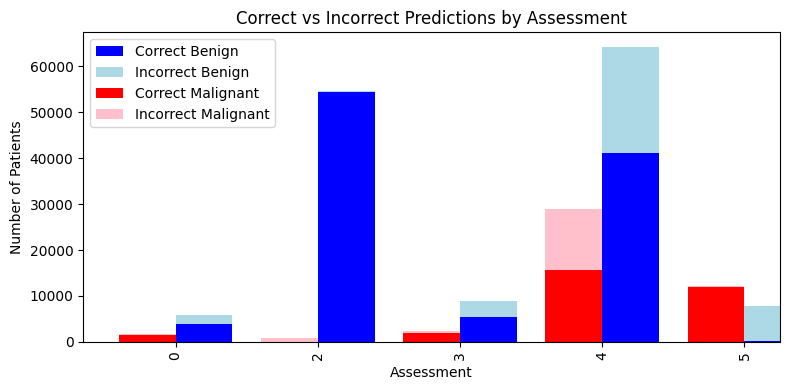

In [ ]:
# Calculate correct and incorrect predictions
correct_benign = full_calc[(full_calc['y_pred'] == 0) & (full_calc['pathology'] == 'BENIGN')]['assessment'].value_counts()
incorrect_benign = full_calc[(full_calc['y_pred'] == 0) & (full_calc['pathology'] == 'MALIGNANT')]['assessment'].value_counts()

correct_malignant = full_calc[(full_calc['y_pred'] == 1) & (full_calc['pathology'] == 'MALIGNANT')]['assessment'].value_counts()
incorrect_malignant = full_calc[(full_calc['y_pred'] == 1) & (full_calc['pathology'] == 'BENIGN')]['assessment'].value_counts()

# Combine the counts into a DataFrame for plotting
prediction_counts = pd.DataFrame({
    'Correct Benign': correct_benign,
    'Incorrect Benign': incorrect_benign,
    'Correct Malignant': correct_malignant,
    'Incorrect Malignant': incorrect_malignant
}).fillna(0)

fig, ax = plt.subplots(figsize=(8, 4))

prediction_counts[['Correct Benign', 'Incorrect Benign']].plot(kind='bar', ax=ax, color=['blue', 'lightblue'], stacked=True, position=0, width=0.4, align='center', label='Benign')
prediction_counts[['Correct Malignant', 'Incorrect Malignant']].plot(kind='bar', ax=ax, color=['red', 'pink'], stacked=True, position=1, width=0.4, align='center', label='Malignant')

ax.set_xlabel('Assessment')
ax.set_ylabel('Number of Patients')
ax.set_title('Correct vs Incorrect Predictions by Assessment')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
counts_df = pd.DataFrame({
    'Correct Benign': correct_benign,
    'Incorrect Benign': incorrect_benign,
    'Correct Malignant': correct_malignant,
    'Incorrect Malignant': incorrect_malignant
}).fillna(0)


counts_df['Benign Accuracy'] = counts_df['Correct Benign'] / (counts_df['Correct Benign'] + counts_df['Incorrect Benign'])
counts_df['Malignant Accuracy'] = counts_df['Correct Malignant'] / (counts_df['Correct Malignant'] + counts_df['Incorrect Malignant'])
counts_df.fillna(0, inplace=True)

counts_df

Correct Benign  Incorrect Benign  Correct Malignant  \
assessment                                                        
0                     3846              2095               1605   
2                    54443                98                  2   
3                     5427              3417               1883   
4                    41209             22935              15565   
5                      160              7645              12055   

            Incorrect Malignant  Benign Accuracy  Malignant Accuracy  
assessment                                                            
0                            54         0.647366            0.967450  
2                           757         0.998203            0.002635  
3                           573         0.613636            0.766694  
4                         13391         0.642445            0.537540  
5                            40         0.020500            0.996693

**Understand the results:**

Assessment 0 : predicted malignant - 96.74% of the time correct

Assessment 1 : predicted malignant - 100% of the time correct

Assessment 2 : predicted benign - 99.82% of the time correct

Assessment 3 : predicted malignant - 76.66% of the time correct

Assessment 4 : predictions are correct with about 53.75 - 64.24% accuracy

Assessment 5 : predicted malignant - 99.66% of the time correct



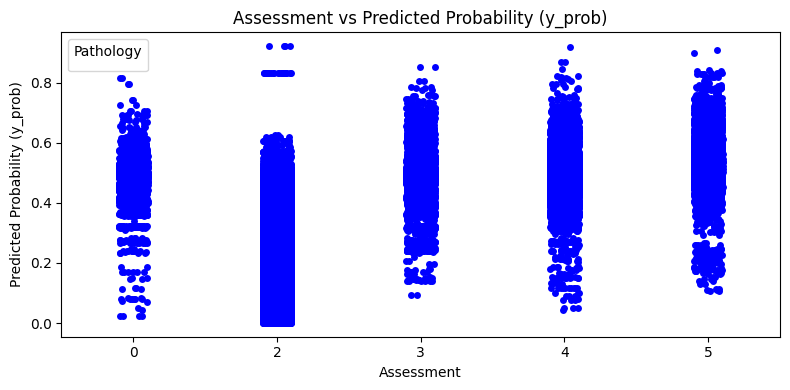

In [ ]:
plt.figure(figsize=(8, 4))

# Plot y_prob against assessment
sns.stripplot(data=full_calc, x='assessment', y='y_prob', jitter=True, color='blue')

plt.xlabel('Assessment')
plt.ylabel('Predicted Probability (y_prob)')
plt.title('Assessment vs Predicted Probability (y_prob)')
plt.legend(title='Pathology')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average y_prob per assessment
avg_y_prob_per_assessment = full_calc.groupby('assessment')['y_prob'].mean()

print("Average y_prob per assessment:")
print(avg_y_prob_per_assessment)


Average y_prob per assessment:
assessment
0    0.487020
2    0.293692
3    0.480978
4    0.498366
5    0.521633
Name: y_prob, dtype: float64


# Shahar's ROI images

In [40]:
def compare_models(df, num_runs, output_path):

  # Define models
  models = {
      "Logistic Regression": LogisticRegression(max_iter=500),
      "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
      "Ridge Classifier": RidgeClassifier(),
      "Ada Boost Classifier": AdaBoostClassifier(),
      "Extra Trees Classifier": ExtraTreesClassifier(),
      "LightGBM": LGBMClassifier(),
      "XGBoost": XGBClassifier(),
      "Random Forest": RandomForestClassifier(),
      "K Neighbors Classifier": KNeighborsClassifier(),
      "Decision Tree": DecisionTreeClassifier(),
      "SVM - Linear": SVC(kernel='linear', probability=True),
      "Naive Bayes": GaussianNB()
  }

  n_splits = 10

  for run in range(num_runs):
      # Shuffle and reset the index of the original DataFrame
      tumor_features_df_shuffled = df.sample(frac=1, random_state=42*run).reset_index(drop=True)

      # Features and target
      X = tumor_features_df_shuffled.drop(['malignant', 'patient_id', 'tumor_id', 'abnormality id'], axis=1)
      y = tumor_features_df_shuffled['malignant']
      groups = tumor_features_df_shuffled['patient_id']
      abnormality_ids = tumor_features_df_shuffled['abnormality id']
      tumor_id = tumor_features_df_shuffled['tumor_id']

      # Replace whitespaces in feature names with underscores
      X.columns = [col.replace(" ", "_") for col in X.columns]

      all_predictions = []

      # Get unique patient IDs
      unique_patient_ids = groups.unique()
      np.random.seed(42*run)  # Set seed for reproducibility

      # Shuffle the patient IDs
      np.random.shuffle(unique_patient_ids)

      # Split the patient IDs into folds
      fold_size = len(unique_patient_ids) // n_splits
      predefined_splits = []

      for fold in range(n_splits):
          test_ids = unique_patient_ids[fold * fold_size: (fold + 1) * fold_size]
          train_ids = np.setdiff1d(unique_patient_ids, test_ids)
          predefined_splits.append((train_ids, test_ids))

      # Handle any patient IDs not included in the folds
      all_test_ids = np.concatenate([test_ids for _, test_ids in predefined_splits])
      missing_ids = np.setdiff1d(unique_patient_ids, all_test_ids)
      print(missing_ids)
      if len(missing_ids) > 0:
          for missing_id in missing_ids:
              random_fold = np.random.choice(n_splits)
              train_ids, test_ids = predefined_splits[random_fold]
              test_ids = np.append(test_ids, missing_id)
              predefined_splits[random_fold] = (train_ids, test_ids)

      group_kfold = GroupKFold(n_splits=n_splits)

      for model_name, model in models.items():
          original_model = copy.deepcopy(model) # run folds on og
          fold_count = 1
          all_model_predictions = []

          for fold_idx, (train_ids, test_ids) in enumerate(predefined_splits):
              model = copy.deepcopy(original_model)
              train_idx = groups.isin(train_ids)
              test_idx = groups.isin(test_ids)

              X_train, X_test = X[train_idx], X[test_idx]
              y_train, y_test = y[train_idx], y[test_idx]
              patient_ids = groups[test_idx]
              abnormality_test_ids = abnormality_ids[test_idx]
              tumor_id_test = tumor_id[test_idx]

              model.fit(X_train, y_train)
              y_pred = model.predict(X_test)

              if hasattr(model, "predict_proba"):
                  y_prob = model.predict_proba(X_test)[:, 1]
                  for pid, ab_id, y_t, y_p, y_pr, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, y_prob, tumor_id_test):
                      all_model_predictions.append((pid, ab_id, y_t, y_p, y_pr, fold_count, t_id))
              else:
                  for pid, ab_id, y_t, y_p, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, tumor_id_test):
                      all_model_predictions.append((pid, ab_id, y_t, y_p, None, fold_count, t_id))

              fold_count += 1

          predictions_df = pd.DataFrame(all_model_predictions, columns=['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id'])

          # Include only the specified columns
          predictions_df = predictions_df[['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id']]

          predictions_df.to_csv(f'/content/drive/My Drive/DDSM data/calc_roi/{output_path}_{model_name}_{run + 1}.csv', index=False)


In [67]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def calculate_metrix(output_path, data_name, num_runs):
    # Define the path to your CSV files
    base_path = f'/content/drive/My Drive/DDSM data/calc_roi/{output_path}'

    # Define the models
    models = [
        "Logistic Regression", "Linear Discriminant Analysis", "Ridge Classifier",
        "Ada Boost Classifier", "Extra Trees Classifier", "LightGBM",
        "XGBoost", "Random Forest", "K Neighbors Classifier",
        "Decision Tree",
        "SVM - Linear",
        "Naive Bayes"
    ]

    # Function to calculate metrics
    def calculate_metrics(y_true, y_pred, y_prob=None):
        metrics = {}
        if len(y_true) > 0:  # Check if y_true has at least one sample
            metrics['accuracy'] = accuracy_score(y_true, y_pred)
            metrics['recall'] = recall_score(y_true, y_pred)
            metrics['precision'] = precision_score(y_true, y_pred)
            metrics['f1_score'] = f1_score(y_true, y_pred)
        else:
            metrics['accuracy'] = None
            metrics['recall'] = None
            metrics['precision'] = None
            metrics['f1_score'] = None

        if y_prob is not None:
            valid_indices = ~np.isnan(y_prob)  # Find indices where y_prob is not NaN
            if len(y_true[valid_indices]) > 0:  # Check if y_true has at least one non-NaN sample
                metrics['auc'] = roc_auc_score(y_true[valid_indices], y_prob[valid_indices])
            else:
                metrics['auc'] = None
        else:
            metrics['auc'] = None

        return metrics

    # Initialize a dictionary to store the results
    results = {model: [] for model in models}

    # Read and process each CSV file
    for model_name in models:
        for run in range(1, num_runs+1):
            file_path = os.path.join(base_path, f'{data_name}_{model_name}_{run}.csv')
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                y_true = df['y_true']
                y_pred = df['y_pred']
                y_prob = df['y_prob'] if 'y_prob' in df.columns else None
                metrics = calculate_metrics(y_true, y_pred, y_prob)
                results[model_name].append(metrics)

    # Create empty DataFrame
    rows_to_concat = []

    # Calculate the average and standard deviation for each model
    for model_name, metrics_list in results.items():
        if len(metrics_list) == 0:
            continue  # Skip if there are no metrics for this model

        valid_auc_values = [d['auc'] for d in metrics_list if d['auc'] is not None]

        avg_metrics = {
            'accuracy': sum(d['accuracy'] for d in metrics_list if d['accuracy'] is not None) / len([d for d in metrics_list if d['accuracy'] is not None]),
            'precision': sum(d['precision'] for d in metrics_list if d['precision'] is not None) / len([d for d in metrics_list if d['precision'] is not None]),
            'recall': sum(d['recall'] for d in metrics_list if d['recall'] is not None) / len([d for d in metrics_list if d['recall'] is not None]),
            'f1_score': sum(d['f1_score'] for d in metrics_list if d['f1_score'] is not None) / len([d for d in metrics_list if d['f1_score'] is not None]),
            'auc': sum(valid_auc_values) / len(valid_auc_values) if len(valid_auc_values) > 0 else None
        }

        std_metrics = {
            'accuracy': np.std([d['accuracy'] for d in metrics_list if d['accuracy'] is not None]),
            'precision': np.std([d['precision'] for d in metrics_list if d['precision'] is not None]),
            'recall': np.std([d['recall'] for d in metrics_list if d['recall'] is not None]),
            'f1_score': np.std([d['f1_score'] for d in metrics_list if d['f1_score'] is not None]),
            'auc': np.std([d['auc'] for d in metrics_list if d['auc'] is not None])
        }

        # Add average metrics to DataFrame
        for metric, value in avg_metrics.items():
            if value is not None:
                rows_to_concat.append({'Model': model_name, 'Metric': metric, 'Value': value})

        # Add std metrics to DataFrame
        for metric, value in std_metrics.items():
            if value is not None:
                rows_to_concat.append({'Model': model_name, 'Metric': metric + '_std', 'Value': value})

    # Concatenate the rows
    results_df = pd.DataFrame(rows_to_concat)

    # Pivot the DataFrame for better readability
    results_df = results_df.pivot(index='Model', columns='Metric', values='Value')

    # Return the final results DataFrame
    return results_df


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import math
from glob import glob
from skimage.measure import label, regionprops

folder_path = '/content/drive/MyDrive/DDSM data/DDSM_images/masks/'

image_files = glob(os.path.join(folder_path, "*.png"))

rows = []

for i, file_path in enumerate(image_files):
    if i % 200 == 0:
        print(f"Processing image {i}: {file_path}")

    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    binary_image = (image > 128).astype(np.uint8)

    # Area
    area = len(binary_image[binary_image > 0])

    # Contours and get the largest one
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    largest_contour = max(contours, key=cv2.contourArea)

    contour_area = cv2.contourArea(largest_contour, True)

    # Perimeter
    perimeter = cv2.arcLength(largest_contour, True)

    # Minor and major axis
    if len(largest_contour) >= 5:  # fitEllipse requires min 5 points
        ellipse = cv2.fitEllipse(largest_contour)
        (x, y), (major_axis, minor_axis), angle = ellipse
        longest_axis = max(major_axis, minor_axis)
        shortest_axis = min(major_axis, minor_axis)
    else:
        longest_axis = shortest_axis = np.nan  # Not enough points to fit an ellipse

    # Eccentricity
    eccentricity = np.sqrt(1 - (((shortest_axis/2) / (longest_axis/2))**2))

    # Aspect ratio
    if shortest_axis > 0:
        aspect_ratio = longest_axis / shortest_axis
    else:
        aspect_ratio = np.nan  # Avoid division by zero

    # Convex hull and related properties
    hull = cv2.convexHull(largest_contour)
    convex_hull_area = cv2.contourArea(hull)
    convex_hull_perimeter = cv2.arcLength(hull, True)

    # Solidity
    if convex_hull_area > 0:
        solidity = area / convex_hull_area
    else:
        solidity = np.nan  # Avoid division by zero

    # Circularity
    if perimeter > 0:
        circularity = 4 * math.pi * (area / (convex_hull_perimeter ** 2))
    else:
        circularity = np.nan  # Avoid division by zero

    # Compactness
    compactness = perimeter**2 / (4 * math.pi * area)

    # Jaggedness (smoothness of contour)
    epsilon = 0.01 * perimeter
    smoothed_contour = cv2.approxPolyDP(largest_contour, epsilon, True)
    smoothed_perimeter = cv2.arcLength(smoothed_contour, True)
    if smoothed_perimeter > 0:
        jaggedness = perimeter / smoothed_perimeter
    else:
        jaggedness = np.nan

    row = {
        'File': file_path,
        'Area': area,
        'Contour Area' : contour_area,
        'Perimeter': perimeter,
        'Longest Axis': longest_axis,
        'Shortest Axis': shortest_axis,
        'Circularity': circularity,
        'Eccentricity': eccentricity,
        'Aspect Ratio': aspect_ratio,
        'Convex Hull Area': convex_hull_area,
        'Solidity': solidity,
        'Compactness': compactness,
        'Jaggedness': jaggedness
    }
    rows.append(row)

# Step 15: Convert the rows to a DataFrame
df = pd.DataFrame(rows)

# Save the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/DDSM data/calc_roi/shahars_ROI_images_feature_extraction_calc.csv', index=False)



Processing image 0: /content/drive/MyDrive/DDSM data/DDSM_images/masks/P_01066-RIGHT-CC-calcification-M1.png
Processing image 200: /content/drive/MyDrive/DDSM data/DDSM_images/masks/P_01336-LEFT-CC-calcification-M2.png
Processing image 400: /content/drive/MyDrive/DDSM data/DDSM_images/masks/P_01582-RIGHT-MLO-calcification-M1.png
Processing image 600: /content/drive/MyDrive/DDSM data/DDSM_images/masks/P_01885-LEFT-MLO-calcification-M1.png
Processing image 800: /content/drive/MyDrive/DDSM data/DDSM_images/masks/P_00723-LEFT-MLO-calcification-M2.png
Processing image 1000: /content/drive/MyDrive/DDSM data/DDSM_images/masks/P_00788-RIGHT-MLO-mass-M1.png
Processing image 1200: /content/drive/MyDrive/DDSM data/DDSM_images/masks/P_00008-LEFT-MLO-calcification-M1.png
Processing image 1400: /content/drive/MyDrive/DDSM data/DDSM_images/masks/P_00293-LEFT-MLO-calcification-M1.png
Processing image 1600: /content/drive/MyDrive/DDSM data/DDSM_images/masks/P_00539-RIGHT-CC-calcification-M2.png
Process

In [30]:
result_calc.columns

Index(['patient_id', 'breast density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'assessment', 'pathology',
       'subtlety', 'image file path', 'cropped image file path',
       'ROI mask file path', 'tumor_id', 'multiple_tumors', 'AMORPHOUS',
       'COARSE', 'DYSTROPHIC', 'EGGSHELL', 'FINE_LINEAR_BRANCHING',
       'LARGE_RODLIKE', 'LUCENT_CENTER', 'MILK_OF_CALCIUM', 'PLEOMORPHIC',
       'PUNCTATE', 'ROUND_AND_REGULAR', 'SKIN', 'VASCULAR', 'CLUSTERED',
       'DIFFUSELY_SCATTERED', 'LINEAR', 'REGIONAL', 'SEGMENTAL', 'malignant'],
      dtype='object')

In [31]:
sh_roi_features = pd.read_csv('/content/drive/MyDrive/DDSM data/calc_roi/shahars_ROI_images_feature_extraction_calc.csv')

In [32]:
sh_roi_features.sort_values(by='Eccentricity')

File   Area  Contour Area  \
651   /content/drive/MyDrive/DDSM data/DDSM_images/m...  79087      -78593.5   
2756  /content/drive/MyDrive/DDSM data/DDSM_images/m...  19253      -18862.5   
2731  /content/drive/MyDrive/DDSM data/DDSM_images/m...  19089      -18622.5   
2304  /content/drive/MyDrive/DDSM data/DDSM_images/m...   7757       -7612.5   
1624  /content/drive/MyDrive/DDSM data/DDSM_images/m...   9550       -9386.0   
...                                                 ...    ...           ...   
1777  /content/drive/MyDrive/DDSM data/DDSM_images/m...  18158      -17711.0   
1454  /content/drive/MyDrive/DDSM data/DDSM_images/m...  77054      -76015.5   
582   /content/drive/MyDrive/DDSM data/DDSM_images/m...  74269      -73191.0   
1542  /content/drive/MyDrive/DDSM data/DDSM_images/m...  12488      -12108.0   
1457  /content/drive/MyDrive/DDSM data/DDSM_images/m...  47263      -46513.0   

        Perimeter  Longest Axis  Shortest Axis  Circularity  Eccentricity  \
651   1095.595015    318.620300     316.753143     0.973213      0.108101   
2756   936.815358    160.181870     159.224609     0.790095      0.109163   
2731  1171.148399    157.027557     156.057480     0.793212      0.110984   
2304   336.291411     98.822899      98.171234     0.998094      0.114652   
1624   374.877198    111.041176     110.235901     0.941706      0.120214   
...           ...           ...            ...          ...           ...   
1777  1010.465072    483.697388      58.102516     0.267613      0.992759   
1454  2347.138295   1064.958130     124.221916     0.204017      0.993174   
582   2503.596226   1122.478149     118.623856     0.176550      0.994400   
1542   922.856988    473.312012      43.235638     0.216245      0.995819   
1457  1657.886426    980.486206      74.099152     0.247559      0.997140   

      Aspect Ratio  Convex Hull Area  Solidity  Compactness  Jaggedness  
651       1.005895           79493.0  0.994893     1.207772    1.094880  
2756      1.006012           23008.0  0.836796     3.627436    1.367991  
2731      1.006216           22720.5  0.840166     5.717824    1.768302  
2304      1.006638            7730.5  1.003428     1.160187    1.088089  
1624      1.007305            9580.0  0.996868     1.171021    1.058501  
...            ...               ...       ...          ...         ...  
1777      8.324896           23222.0  0.781931     4.474708    1.093400  
1454      8.573029          113159.0  0.680936     5.689476    1.080403  
582       9.462499          114736.5  0.647301     6.716007    1.090926  
1542     10.947266           16617.0  0.751520     5.427078    1.085569  
1457     13.232084           53879.5  0.877198     4.627841    1.081788  

[3440 rows x 13 columns]

In [33]:
import cv2
import matplotlib.pyplot as plt

def present_image(image_path):
  image = cv2.imread(image_path)

  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Display the image using Matplotlib
  plt.imshow(image_rgb)
  plt.axis('off')  # Hide axis
  plt.show()

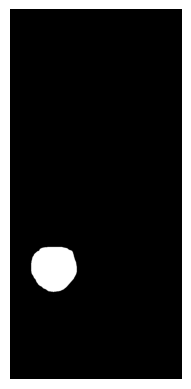

In [34]:
present_image(sh_roi_features.sort_values(by='Eccentricity')['File'].iloc[0])

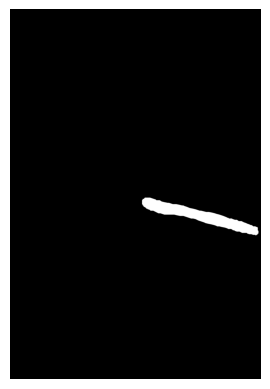

In [8]:
present_image(sh_roi_features.sort_values(by='Eccentricity')['File'].iloc[3439])

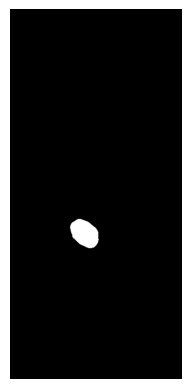

In [9]:
present_image(sh_roi_features.sort_values(by='Jaggedness')['File'].iloc[1500])

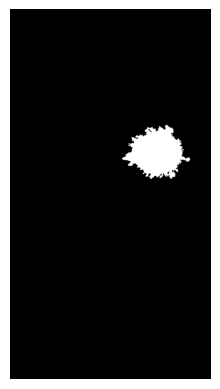

In [10]:
present_image(sh_roi_features.sort_values(by='Jaggedness')['File'].iloc[3439])

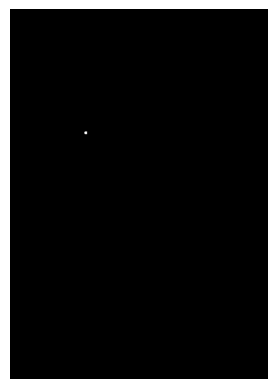

In [11]:
present_image(sh_roi_features.sort_values(by='Area')['File'].iloc[0])

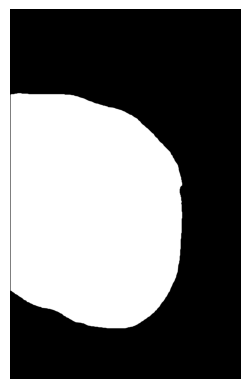

In [12]:
present_image(sh_roi_features.sort_values(by='Area')['File'].iloc[3439])

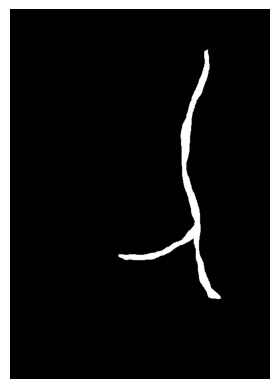

In [24]:
present_image(sh_roi_features.sort_values(by='Circularity')['File'].iloc[0])

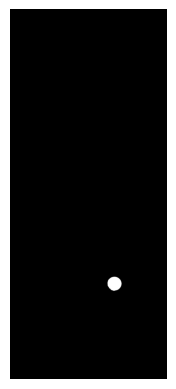

In [40]:
present_image(sh_roi_features.sort_values(by='Circularity')['File'].iloc[3439])

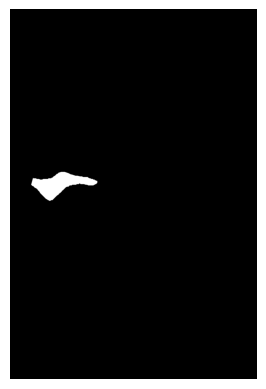

In [22]:
present_image(sh_roi_features.sort_values(by='Solidity')['File'].iloc[100])

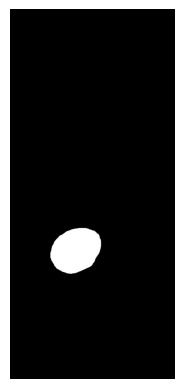

In [21]:
present_image(sh_roi_features.sort_values(by='Solidity')['File'].iloc[3000])

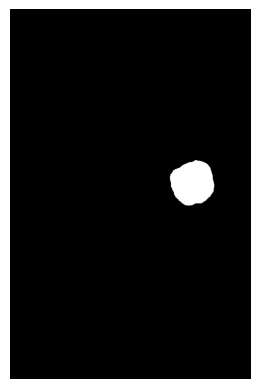

In [37]:
present_image(sh_roi_features.sort_values(by='Aspect Ratio')['File'].iloc[100])

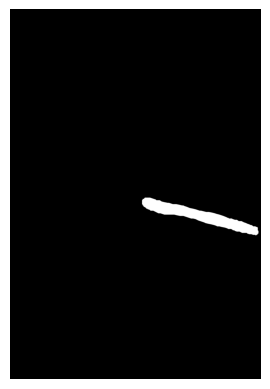

In [36]:
present_image(sh_roi_features.sort_values(by='Aspect Ratio')['File'].iloc[3439])

In [35]:
sh_roi_features.describe()

Area  Contour Area    Perimeter  Longest Axis  Shortest Axis  \
count  3.440000e+03  3.440000e+03  3440.000000   3440.000000    3440.000000   
mean   3.699276e+04 -3.665875e+04   779.618829    214.353088     148.279128   
std    9.818863e+04  9.798638e+04   613.926801    205.643967     121.068883   
min    2.400000e+02 -2.215625e+06    55.899495     17.173441      15.285905   
25%    6.744750e+03 -2.994275e+04   398.489895    107.711761      81.512024   
50%    1.438400e+04 -1.411500e+04   641.892960    156.031204     120.066788   
75%    3.037525e+04 -6.558625e+03   934.818625    234.235016     175.097176   
max    2.218294e+06 -2.100000e+02  5847.967933   2658.947510    1692.245728   

       Circularity  Eccentricity  Aspect Ratio  Convex Hull Area     Solidity  \
count  3440.000000   3440.000000   3440.000000      3.440000e+03  3440.000000   
mean      0.822577      0.613502      1.449038      4.075495e+04     0.914427   
std       0.127428      0.173998      0.688444      1.024992e+05     0.091653   
min       0.078012      0.108101      1.005895      2.125000e+02     0.162765   
25%       0.775122      0.492852      1.149275      7.412375e+03     0.864615   
50%       0.844488      0.611084      1.263318      1.599900e+04     0.934856   
75%       0.908214      0.736093      1.477366      3.340112e+04     0.984928   
max       0.998094      0.997140     13.232084      2.229670e+06     1.129412   

       Compactness   Jaggedness  
count  3440.000000  3440.000000  
mean      2.312063     1.206944  
std       1.420376     0.161420  
min       1.036083     1.000000  
25%       1.299819     1.069989  
50%       1.840803     1.141403  
75%       2.990327     1.329269  
max      19.816997     2.432128

In [36]:
sh_roi_features['File_trimmed'] = sh_roi_features['File'].apply(lambda x: x.split('/')[-1])  # Extract filename

In [37]:
result_calc['image_path_docs'] = result_calc['patient_id'] + '-' + result_calc['left or right breast'] + '-' + result_calc['image view'] + '-calcification'  + '-M' + result_calc['abnormality id'].astype(str)+'.png'

In [38]:
roi_df = result_calc.merge(sh_roi_features, left_on='image_path_docs', right_on='File_trimmed', how='left')
roi_df

patient_id  breast density left or right breast image view  \
0       P_00005               3                RIGHT         CC   
1       P_00005               3                RIGHT        MLO   
2       P_00007               4                 LEFT         CC   
3       P_00007               4                 LEFT        MLO   
4       P_00008               1                 LEFT         CC   
...         ...             ...                  ...        ...   
1867    P_02464               2                RIGHT        MLO   
1868    P_02498               4                RIGHT         CC   
1869    P_02498               4                RIGHT        MLO   
1870    P_02501               3                RIGHT         CC   
1871    P_02501               3                RIGHT        MLO   

     abnormality id abnormality type  assessment  pathology  subtlety  \
0                 1    calcification           3  MALIGNANT         3   
1                 1    calcification           3  MALIGNANT         3   
2                 1    calcification           4     BENIGN         4   
3                 1    calcification           4     BENIGN         4   
4                 1    calcification           2     BENIGN         3   
...             ...              ...         ...        ...       ...   
1867              1    calcification           0  MALIGNANT         4   
1868              1    calcification           0     BENIGN         3   
1869              1    calcification           0     BENIGN         3   
1870              1    calcification           0  MALIGNANT         3   
1871              1    calcification           0  MALIGNANT         3   

                                        image file path  ... Longest Axis  \
0     Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...  ...   325.498199   
1     Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...  ...   317.856354   
2     Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...  ...   332.626892   
3     Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...  ...   392.786041   
4     Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...  ...    65.978607   
...                                                 ...  ...          ...   
1867  Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...  ...   650.358154   
1868  Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...  ...   250.441574   
1869  Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...  ...   201.371918   
1870  Calc-Test_P_02501_RIGHT_CC/1.3.6.1.4.1.9590.10...  ...   316.650726   
1871  Calc-Test_P_02501_RIGHT_MLO/1.3.6.1.4.1.9590.1...  ...   316.147919   

     Shortest Axis  Circularity  Eccentricity  Aspect Ratio  Convex Hull Area  \
0       276.011993     0.966206      0.530048      1.179290           71062.5   
1       238.665970     0.939439      0.660460      1.331804           59694.5   
2       246.268250     0.951236      0.672195      1.350669           65394.5   
3       280.465790     0.939250      0.700103      1.400478           87583.0   
4        54.044518     0.795878      0.573620      1.220820            2854.5   
...            ...          ...           ...           ...               ...   
1867    363.357941     0.862778      0.829367      1.789855          187034.0   
1868    198.471832     0.953030      0.609888      1.261849           39354.0   
1869    175.787186     0.967022      0.487814      1.145544           28084.5   
1870    188.372498     0.798451      0.803807      1.680982           43388.5   
1871    289.862091     0.967372      0.399218      1.090684           72390.5   

      Solidity  Compactness  Jaggedness  \
0     0.993914     1.245170    1.105422   
1     0.992537     1.286780    1.115162   
2     0.989487     1.299384    1.122366   
3     0.989005     1.370327    1.145732   
4     0.909091     1.502329    1.045272   
...        ...          ...         ...   
1867  0.993039     1.370964    1.096718   
1868  0.991589     1.295489    1.118085   
1869  0.993609     1.222940    1.09648

In [39]:
roi_df.to_csv('/content/drive/MyDrive/DDSM data/DDSM_compareModels_Calc/roi_calc_and_birads.csv')

# Features only

In [40]:
from sklearn.preprocessing import MinMaxScaler

roi_df = roi_df[['patient_id', 'tumor_id', 'malignant','abnormality id', 'Area',	'Perimeter',	'Longest Axis',	'Shortest Axis',	'Circularity',	'Eccentricity',	'Aspect Ratio',	'Convex Hull Area',	'Solidity',	'Compactness',	'Jaggedness']]
roi_df


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Specify the columns to be scaled
columns_to_scale = ['Area', 'Perimeter', 'Longest Axis', 'Shortest Axis', 'Circularity', 'Eccentricity',
                    'Aspect Ratio', 'Convex Hull Area', 'Solidity', 'Compactness', 'Jaggedness']

# Apply scaling only to the specified columns
roi_df[columns_to_scale] = scaler.fit_transform(roi_df[columns_to_scale])


<ipython-input-40-d303aa1a8709>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi_df[columns_to_scale] = scaler.fit_transform(roi_df[columns_to_scale])


In [42]:
roi_df.to_csv('roi_missing.csv')

In [43]:
roi_without_na = roi_df.dropna()

In [ ]:
compare_models(roi_without_na, 100, 'shahars_roi_images/Results_features_only')

In [ ]:
calculate_metrix('shahars_roi_images', 'Results_features_only', 100)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Metric                        accuracy  accuracy_std       auc   auc_std  \
Model                                                                      
Ada Boost Classifier          0.732154      0.005397  0.770262  0.005468   
Decision Tree                 0.663544      0.008412  0.638273  0.009369   
Extra Trees Classifier        0.722530      0.004401  0.775318  0.004312   
K Neighbors Classifier        0.708378      0.003658  0.749090  0.003853   
LightGBM                      0.725626      0.005765  0.774104  0.004837   
Linear Discriminant Analysis  0.732243      0.002081  0.782056  0.001342   
Logistic Regression           0.703926      0.002252  0.769541  0.001386   
Naive Bayes                   0.712486      0.001718  0.744707  0.005552   
Random Forest                 0.729208      0.005193  0.778816  0.004349   
Ridge Classifier              0.716600      0.002493       NaN       NaN   
XGBoost                       0.722115      0.006226  0.769099  0.005112   

Metric                        f1_score  f1_score_std  precision  \
Model                                                             
Ada Boost Classifier          0.602482      0.008866   0.652421   
Decision Tree                 0.540745      0.012427   0.535451   
Extra Trees Classifier        0.588498      0.007637   0.636726   
K Neighbors Classifier        0.577071      0.005757   0.608714   
LightGBM                      0.598508      0.009193   0.637676   
Linear Discriminant Analysis  0.573313      0.003724   0.679208   
Logistic Regression           0.496938      0.004472   0.647451   
Naive Bayes                   0.450167      0.003993   0.734561   
Random Forest                 0.595881      0.008388   0.649470   
Ridge Classifier              0.531609      0.004767   0.663547   
XGBoost                       0.596057      0.009794   0.630364   

Metric                        precision_std    recall  recall_std  
Model                                                              
Ada Boost Classifier               0.008927  0.559725    0.010998  
Decision Tree                      0.011399  0.546260    0.015579  
Extra Trees Classifier             0.007111  0.547130    0.009962  
K Neighbors Classifier             0.005846  0.548595    0.007392  
LightGBM                           0.009070  0.563939    0.011038  
Linear Discriminant Analysis       0.004134  0.496000    0.004341  
Logistic Regression                0.005096  0.403221    0.004680  
Naive Bayes                        0.005474  0.324534    0.003589  
Random Forest                      0.008655  0.550519    0.009857  
Ridge Classifier                   0.005026  0.443450    0.005001  
XGBoost                            0.009731  0.565374    0.011885

# ROI Feature Extraction with BI-RADS

In [52]:
roi_df = pd.read_csv('/content/drive/MyDrive/DDSM data/DDSM_compareModels_Calc/roi_calc_and_birads.csv')

In [54]:
roi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1872 non-null   int64  
 1   patient_id               1872 non-null   object 
 2   breast density           1872 non-null   int64  
 3   left or right breast     1872 non-null   object 
 4   image view               1872 non-null   object 
 5   abnormality id           1872 non-null   int64  
 6   abnormality type         1872 non-null   object 
 7   assessment               1872 non-null   int64  
 8   pathology                1872 non-null   object 
 9   subtlety                 1872 non-null   int64  
 10  image file path          1872 non-null   object 
 11  cropped image file path  1872 non-null   object 
 12  ROI mask file path       1872 non-null   object 
 13  tumor_id                 1872 non-null   int64  
 14  multiple_tumors         

In [51]:
|roi_df['malignant'] = roi_df['pathology'].map({'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0})

In [49]:
from sklearn.preprocessing import MinMaxScaler

calc_roi_one_hot = roi_df.drop(['abnormality type', 'assessment', 'pathology', 'subtlety', 'image file path', 'cropped image file path',
       'ROI mask file path', 'image_path_docs', 'File', 'File_trimmed'] , axis=1)


calc_roi_one_hot = pd.get_dummies(calc_roi_one_hot, columns=['left or right breast', 'image view', 'breast density'], dtype=int)

scaler = MinMaxScaler()

columns_to_scale = ['Area', 'Perimeter', 'Longest Axis', 'Shortest Axis', 'Circularity', 'Eccentricity',
                    'Aspect Ratio', 'Convex Hull Area', 'Solidity', 'Compactness', 'Jaggedness']

calc_roi_one_hot[columns_to_scale] = scaler.fit_transform(calc_roi_one_hot[columns_to_scale])


In [50]:
calc_roi_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  1872 non-null   object 
 1   abnormality id              1872 non-null   object 
 2   tumor_id                    1872 non-null   int64  
 3   multiple_tumors             1872 non-null   float64
 4   AMORPHOUS                   1872 non-null   int64  
 5   COARSE                      1872 non-null   int64  
 6   DYSTROPHIC                  1872 non-null   int64  
 7   EGGSHELL                    1872 non-null   int64  
 8   FINE_LINEAR_BRANCHING       1872 non-null   int64  
 9   LARGE_RODLIKE               1872 non-null   int64  
 10  LUCENT_CENTER               1872 non-null   int64  
 11  MILK_OF_CALCIUM             1872 non-null   int64  
 12  PLEOMORPHIC                 1872 non-null   int64  
 13  PUNCTATE                    1872 

In [51]:
calc_roi_one_hot_without_na = calc_roi_one_hot.dropna()

In [52]:
print(len(calc_roi_one_hot_without_na[calc_roi_one_hot_without_na['malignant'] == 1]))
print(len(calc_roi_one_hot_without_na[calc_roi_one_hot_without_na['malignant'] == 0]))


655
1151


In [ ]:
compare_models(calc_roi_one_hot_without_na, 50, 'shahars_roi_images/Results_features_and_birads')

In [ ]:
calculate_metrix('shahars_roi_images', 'Results_features_and_birads', 50)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Metric                        accuracy  accuracy_std       auc   auc_std  \
Model                                                                      
Ada Boost Classifier          0.772337      0.006229  0.852575  0.004915   
Decision Tree                 0.725692      0.009383  0.705242  0.010529   
Extra Trees Classifier        0.769291      0.005656  0.854569  0.003988   
K Neighbors Classifier        0.663987      0.004830  0.655583  0.004582   
LightGBM                      0.770620      0.005983  0.852910  0.004034   
Linear Discriminant Analysis  0.772713      0.003107  0.849210  0.002583   
Logistic Regression           0.761240      0.003911  0.846086  0.002995   
Naive Bayes                   0.698040      0.001588  0.656065  0.015420   
Random Forest                 0.769081      0.005403  0.851267  0.003856   
Ridge Classifier              0.765570      0.003351       NaN       NaN   
XGBoost                       0.771451      0.006651  0.852535  0.004454   

Metric                        f1_score  f1_score_std  precision  \
Model                                                             
Ada Boost Classifier          0.673908      0.009075   0.701273   
Decision Tree                 0.625120      0.013775   0.619777   
Extra Trees Classifier        0.668511      0.008524   0.698019   
K Neighbors Classifier        0.480456      0.007172   0.546986   
LightGBM                      0.676647      0.008850   0.692261   
Linear Discriminant Analysis  0.661437      0.004827   0.719348   
Logistic Regression           0.633496      0.007322   0.714566   
Naive Bayes                   0.345119      0.004076   0.808535   
Random Forest                 0.662758      0.008975   0.704547   
Ridge Classifier              0.648649      0.005090   0.710581   
XGBoost                       0.679373      0.009975   0.691547   

Metric                        precision_std    recall  recall_std  
Model                                                              
Ada Boost Classifier               0.009982  0.648672    0.010725  
Decision Tree                      0.013213  0.630779    0.018584  
Extra Trees Classifier             0.009326  0.641496    0.011172  
K Neighbors Classifier             0.008698  0.428397    0.007385  
LightGBM                           0.009053  0.661802    0.011307  
Linear Discriminant Analysis       0.005584  0.612183    0.005917  
Logistic Regression                0.007121  0.569038    0.010214  
Naive Bayes                        0.008773  0.219389    0.002996  
Random Forest                      0.008410  0.625740    0.011983  
Ridge Classifier                   0.006087  0.596672    0.005759  
XGBoost                            0.009831  0.667725    0.013164

In [54]:
calc_roi_one_hot_without_na.columns

Index(['patient_id', 'abnormality id', 'tumor_id', 'multiple_tumors',
       'AMORPHOUS', 'COARSE', 'DYSTROPHIC', 'EGGSHELL',
       'FINE_LINEAR_BRANCHING', 'LARGE_RODLIKE', 'LUCENT_CENTER',
       'MILK_OF_CALCIUM', 'PLEOMORPHIC', 'PUNCTATE', 'ROUND_AND_REGULAR',
       'SKIN', 'VASCULAR', 'CLUSTERED', 'DIFFUSELY_SCATTERED', 'LINEAR',
       'REGIONAL', 'SEGMENTAL', 'malignant', 'Area', 'Contour Area',
       'Perimeter', 'Longest Axis', 'Shortest Axis', 'Circularity',
       'Eccentricity', 'Aspect Ratio', 'Convex Hull Area', 'Solidity',
       'Compactness', 'Jaggedness', 'left or right breast_LEFT',
       'left or right breast_RIGHT', 'image view_CC', 'image view_MLO',
       'breast density_0', 'breast density_1', 'breast density_2',
       'breast density_3', 'breast density_4'],
      dtype='object')

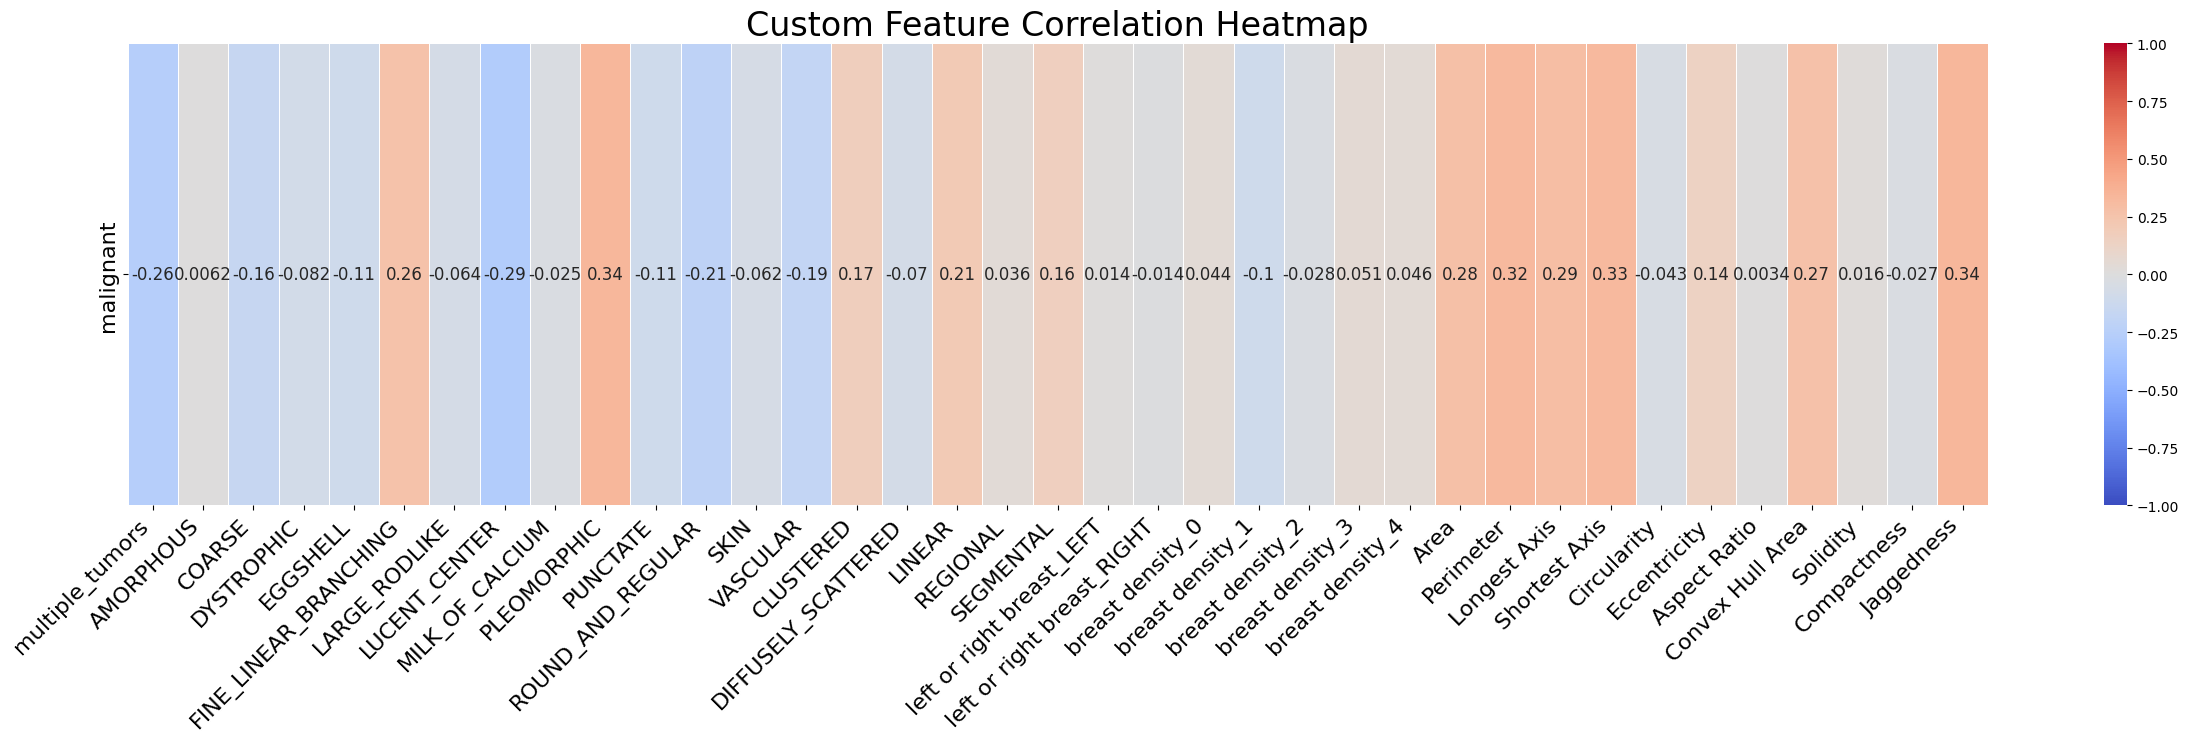

In [64]:
x_features = ['multiple_tumors', 'AMORPHOUS', 'COARSE', 'DYSTROPHIC', 'EGGSHELL',
       'FINE_LINEAR_BRANCHING', 'LARGE_RODLIKE', 'LUCENT_CENTER',
       'MILK_OF_CALCIUM', 'PLEOMORPHIC', 'PUNCTATE', 'ROUND_AND_REGULAR',
       'SKIN', 'VASCULAR', 'CLUSTERED', 'DIFFUSELY_SCATTERED', 'LINEAR',
       'REGIONAL', 'SEGMENTAL', 'left or right breast_LEFT',
       'left or right breast_RIGHT', 'breast density_0', 'breast density_1', 'breast density_2',
       'breast density_3', 'breast density_4', 'Area', 'Perimeter', 'Longest Axis', 'Shortest Axis', 'Circularity',
       'Eccentricity', 'Aspect Ratio', 'Convex Hull Area', 'Solidity',
       'Compactness', 'Jaggedness']
y_features = ['malignant']

correlation_subset = calc_roi_one_hot_without_na[x_features + y_features].corr().loc[y_features, x_features]

plt.figure(figsize=(30, 6))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, annot_kws={"size": 12})
plt.title('Custom Feature Correlation Heatmap', fontsize=24)
plt.xticks(fontsize=16, rotation=45, ha='right')
plt.yticks(fontsize=16)

plt.show()

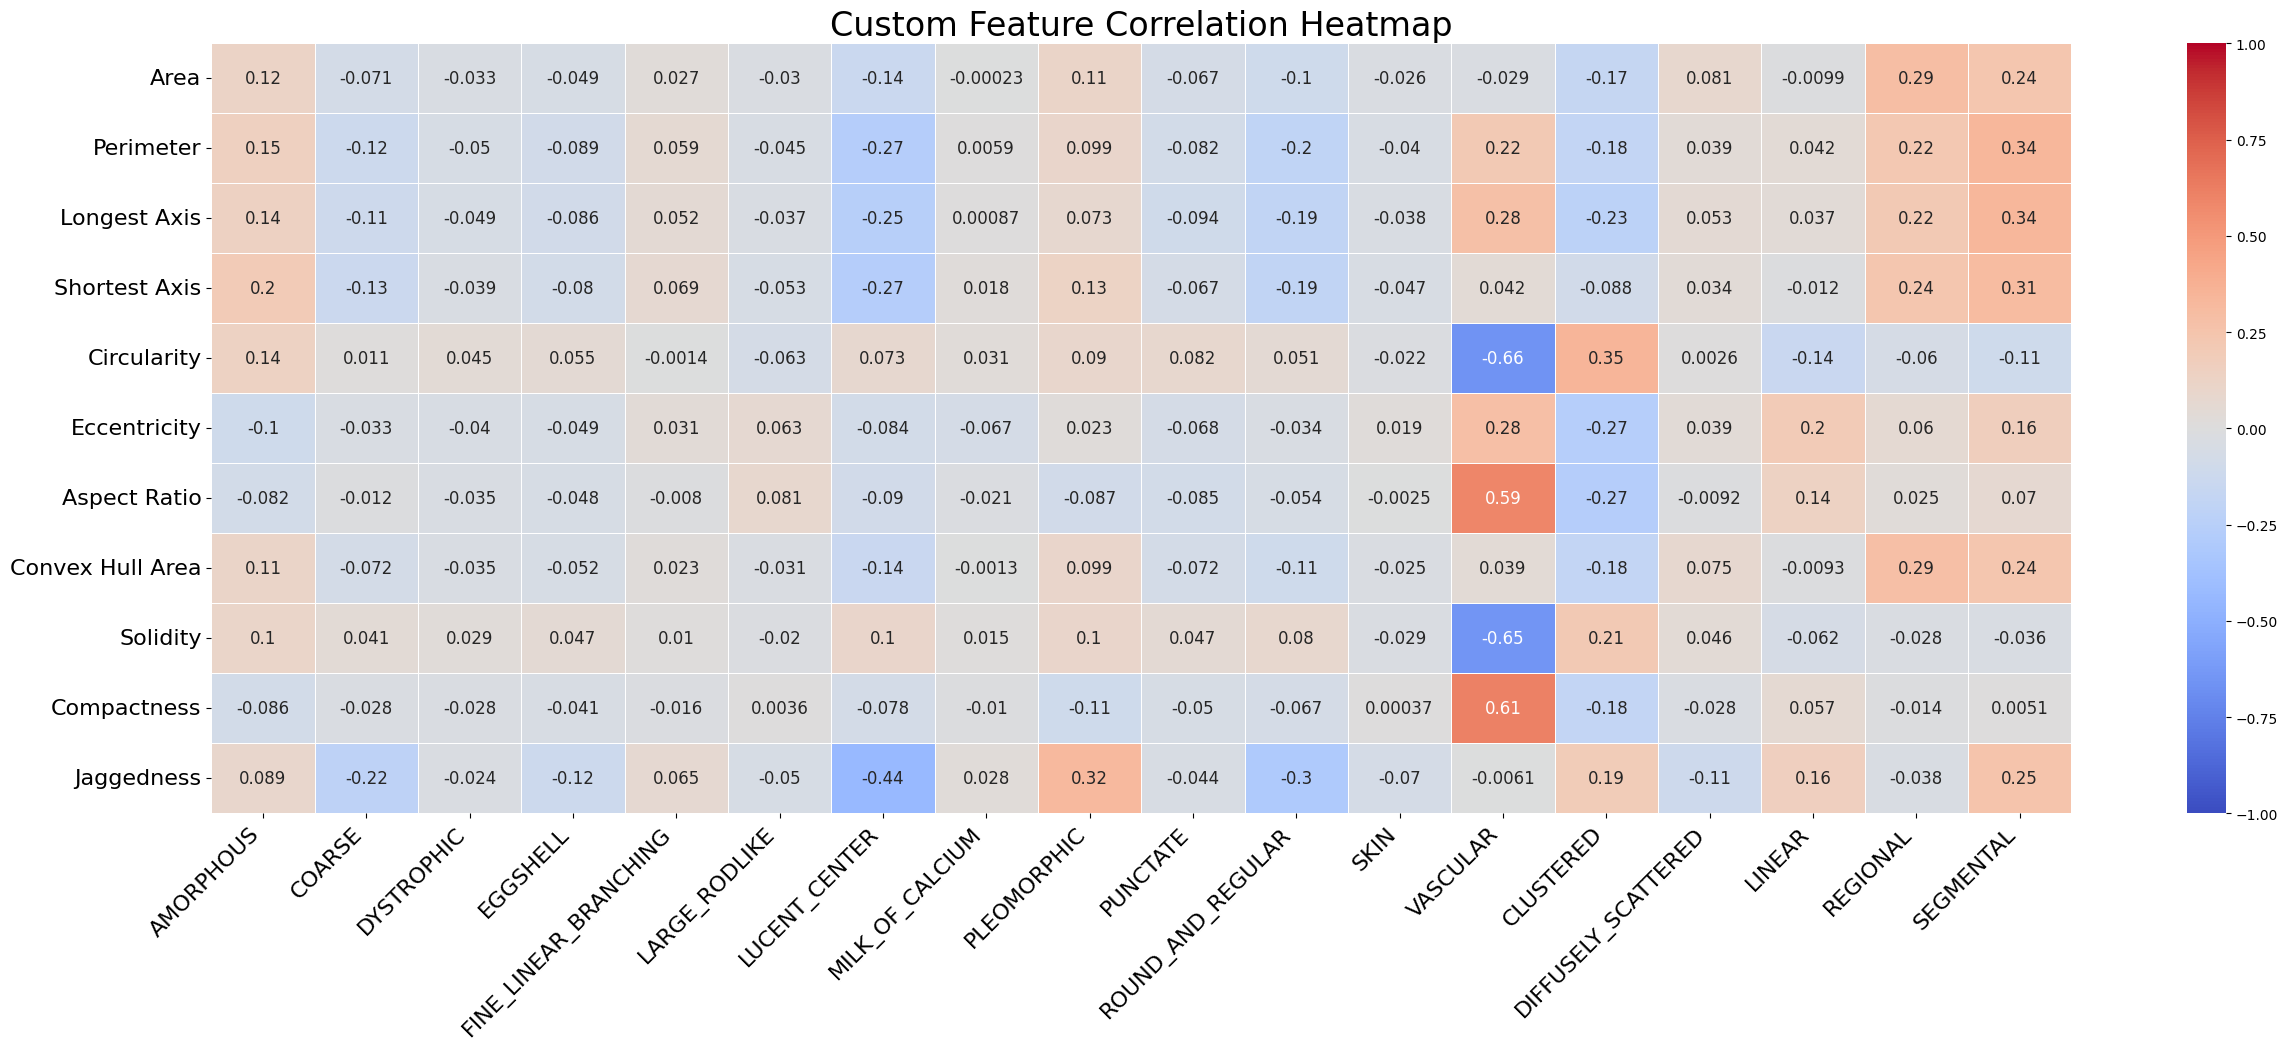

In [63]:
x_features = ['AMORPHOUS', 'COARSE', 'DYSTROPHIC', 'EGGSHELL',
       'FINE_LINEAR_BRANCHING', 'LARGE_RODLIKE', 'LUCENT_CENTER',
       'MILK_OF_CALCIUM', 'PLEOMORPHIC', 'PUNCTATE', 'ROUND_AND_REGULAR',
       'SKIN', 'VASCULAR', 'CLUSTERED', 'DIFFUSELY_SCATTERED', 'LINEAR',
       'REGIONAL', 'SEGMENTAL']
y_features = ['Area', 'Perimeter', 'Longest Axis', 'Shortest Axis', 'Circularity',
       'Eccentricity', 'Aspect Ratio', 'Convex Hull Area', 'Solidity',
       'Compactness', 'Jaggedness']

correlation_subset = calc_roi_one_hot_without_na[x_features + y_features].corr().loc[y_features, x_features]

plt.figure(figsize=(30, 10))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, annot_kws={"size": 12})
plt.title('Custom Feature Correlation Heatmap', fontsize=24)
plt.xticks(fontsize=16, rotation=45, ha='right')
plt.yticks(fontsize=16)

plt.show()

### Dealing with imbalanced data

In [ ]:
benign = calc_roi_one_hot_without_na[calc_roi_one_hot_without_na['malignant'] == 0]
malignant = calc_roi_one_hot_without_na[calc_roi_one_hot_without_na['malignant'] == 1]

benign_downsampled = benign.sample(n=len(malignant), random_state=42)

downsampled_df = pd.concat([malignant, benign_downsampled])
downsampled_df = downsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the result or check the distribution
print(downsampled_df['malignant'].value_counts())

malignant
0    655
1    655
Name: count, dtype: int64


In [ ]:
downsampled_df.describe()

breast density     tumor_id  multiple_tumors    AMORPHOUS       COARSE  \
count     1310.000000  1310.000000      1310.000000  1310.000000  1310.000000   
mean         2.704580   936.706870         0.316794     0.126718     0.035878   
std          0.921135   536.798043         0.465404     0.332783     0.186057   
min          0.000000     1.000000         0.000000     0.000000     0.000000   
25%          2.000000   482.250000         0.000000     0.000000     0.000000   
50%          3.000000   924.500000         0.000000     0.000000     0.000000   
75%          3.000000  1402.500000         1.000000     0.000000     0.000000   
max          4.000000  1872.000000         1.000000     1.000000     1.000000   

        DYSTROPHIC     EGGSHELL  FINE_LINEAR_BRANCHING  LARGE_RODLIKE  \
count  1310.000000  1310.000000            1310.000000    1310.000000   
mean      0.006870     0.019084               0.096183       0.005344   
std       0.082633     0.136872               0.294955       0.072932   
min       0.000000     0.000000               0.000000       0.000000   
25%       0.000000     0.000000               0.000000       0.000000   
50%       0.000000     0.000000               0.000000       0.000000   
75%       0.000000     0.000000               0.000000       0.000000   
max       1.000000     1.000000               1.000000       1.000000   

       LUCENT_CENTER  ...  Eccentricity  Aspect Ratio  Convex Hull Area  \
count    1310.000000  ...   1310.000000   1310.000000       1310.000000   
mean        0.098473  ...      0.638829      0.050564          0.030008   
std         0.298067  ...      0.200658      0.066714          0.069610   
min         0.000000  ...      0.000000      0.000000          0.000000   
25%         0.000000  ...      0.508644      0.016474          0.002199   
50%         0.000000  ...      0.657030      0.031062          0.007904   
75%         0.000000  ...      0.791408      0.057760          0.026751   
max         1.000000  ...      0.998514      0.813121          1.000000   

          Solidity  Compactness   Jaggedness  left or right breast_LEFT  \
count  1310.000000  1310.000000  1310.000000                1310.000000   
mean      0.816960     0.032737     0.234035                   0.538931   
std       0.102385     0.073411     0.118857                   0.498672   
min       0.011103     0.000000     0.000000                   0.000000   
25%       0.825005     0.010115     0.154085                   0.000000   
50%       0.848587     0.015297     0.217952                   1.000000   
75%       0.857259     0.026111     0.322370                   1.000000   
max       1.000000     0.895644     1.000000                   1.000000   

       left or right breast_RIGHT  image view_CC  image view_MLO  
count                 1310.000000    1310.000000     1310.000000  
mean                     0.461069       0.467939        0.532061  
std                      0.498672       0.499162        0.499162  
min                      0.000000       0.000000        0.000000  
25%                      0.000000       0.000000        0.000000  
50%                      0.000000       0.000000        1.000000  
75%                      1.000000       1.000000        1.000000  
max                      1.000000       1.000000        1.000000  

[8 rows x 38 columns]

In [ ]:
# Specify the columns to be scaled
columns_to_scale = ['Area', 'Perimeter', 'Longest Axis', 'Shortest Axis', 'Circularity', 'Eccentricity',
                    'Aspect Ratio', 'Convex Hull Area', 'Solidity', 'Compactness', 'Jaggedness']

# Apply scaling only to the specified columns
downsampled_df[columns_to_scale] = scaler.fit_transform(downsampled_df[columns_to_scale])

In [ ]:
downsampled_df.describe()

breast density     tumor_id  multiple_tumors    AMORPHOUS       COARSE  \
count     1310.000000  1310.000000      1310.000000  1310.000000  1310.000000   
mean         2.704580   936.706870         0.316794     0.126718     0.035878   
std          0.921135   536.798043         0.465404     0.332783     0.186057   
min          0.000000     1.000000         0.000000     0.000000     0.000000   
25%          2.000000   482.250000         0.000000     0.000000     0.000000   
50%          3.000000   924.500000         0.000000     0.000000     0.000000   
75%          3.000000  1402.500000         1.000000     0.000000     0.000000   
max          4.000000  1872.000000         1.000000     1.000000     1.000000   

        DYSTROPHIC     EGGSHELL  FINE_LINEAR_BRANCHING  LARGE_RODLIKE  \
count  1310.000000  1310.000000            1310.000000    1310.000000   
mean      0.006870     0.019084               0.096183       0.005344   
std       0.082633     0.136872               0.294955       0.072932   
min       0.000000     0.000000               0.000000       0.000000   
25%       0.000000     0.000000               0.000000       0.000000   
50%       0.000000     0.000000               0.000000       0.000000   
75%       0.000000     0.000000               0.000000       0.000000   
max       1.000000     1.000000               1.000000       1.000000   

       LUCENT_CENTER  ...  Eccentricity  Aspect Ratio  Convex Hull Area  \
count    1310.000000  ...   1310.000000   1310.000000       1310.000000   
mean        0.098473  ...      0.639779      0.062186          0.030008   
std         0.298067  ...      0.200956      0.082047          0.069610   
min         0.000000  ...      0.000000      0.000000          0.000000   
25%         0.000000  ...      0.509401      0.020261          0.002199   
50%         0.000000  ...      0.658008      0.038201          0.007904   
75%         0.000000  ...      0.792586      0.071036          0.026751   
max         1.000000  ...      1.000000      1.000000          1.000000   

          Solidity  Compactness   Jaggedness  left or right breast_LEFT  \
count  1310.000000  1310.000000  1310.000000                1310.000000   
mean      0.814905     0.036551     0.234035                   0.538931   
std       0.103535     0.081964     0.118857                   0.498672   
min       0.000000     0.000000     0.000000                   0.000000   
25%       0.823041     0.011294     0.154085                   0.000000   
50%       0.846887     0.017079     0.217952                   1.000000   
75%       0.855656     0.029153     0.322370                   1.000000   
max       1.000000     1.000000     1.000000                   1.000000   

       left or right breast_RIGHT  image view_CC  image view_MLO  
count                 1310.000000    1310.000000     1310.000000  
mean                     0.461069       0.467939        0.532061  
std                      0.498672       0.499162        0.499162  
min                      0.000000       0.000000        0.000000  
25%                      0.000000       0.000000        0.000000  
50%                      0.000000       0.000000        1.000000  
75%                      1.000000       1.000000        1.000000  
max                      1.000000       1.000000        1.000000  

[8 rows x 38 columns]

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Ridge Classifier": RidgeClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier(algorithm='SAMME'),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "LightGBM": LGBMClassifier(),
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    # "SVM - Linear": SVC(kernel='linear', probability=True),
    "Naive Bayes": GaussianNB()
}

n_splits = 10

for run in range(5):
    # Shuffle and reset the index of the original DataFrame
    tumor_features_df_shuffled = downsampled_df.sample(frac=1, random_state=42*run).reset_index(drop=True)

    # Features and target
    X = tumor_features_df_shuffled.drop(['malignant', 'patient_id', 'tumor_id', 'abnormality id'], axis=1)
    y = tumor_features_df_shuffled['malignant']
    groups = tumor_features_df_shuffled['patient_id']
    abnormality_ids = tumor_features_df_shuffled['abnormality id']
    tumor_id = tumor_features_df_shuffled['tumor_id']

    # Replace whitespaces in feature names with underscores
    X.columns = [col.replace(" ", "_") for col in X.columns]

    all_predictions = []

    # Get unique patient IDs
    unique_patient_ids = groups.unique()
    np.random.seed(42*run)  # Set seed for reproducibility

    # Shuffle the patient IDs
    np.random.shuffle(unique_patient_ids)

    # Split the patient IDs into folds
    fold_size = len(unique_patient_ids) // n_splits
    predefined_splits = []

    for fold in range(n_splits):
        test_ids = unique_patient_ids[fold * fold_size: (fold + 1) * fold_size]
        train_ids = np.setdiff1d(unique_patient_ids, test_ids)
        predefined_splits.append((train_ids, test_ids))

    # Handle any patient IDs not included in the folds
    all_test_ids = np.concatenate([test_ids for _, test_ids in predefined_splits])
    missing_ids = np.setdiff1d(unique_patient_ids, all_test_ids)
    print(missing_ids)
    if len(missing_ids) > 0:
        for missing_id in missing_ids:
            random_fold = np.random.choice(n_splits)
            train_ids, test_ids = predefined_splits[random_fold]
            test_ids = np.append(test_ids, missing_id)
            predefined_splits[random_fold] = (train_ids, test_ids)

    group_kfold = GroupKFold(n_splits=n_splits)

    for model_name, model in models.items():
        original_model = copy.deepcopy(model) # run folds on og
        fold_count = 1
        all_model_predictions = []

        for fold_idx, (train_ids, test_ids) in enumerate(predefined_splits):
            model = copy.deepcopy(original_model)
            train_idx = groups.isin(train_ids)
            test_idx = groups.isin(test_ids)

            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            patient_ids = groups[test_idx]
            abnormality_test_ids = abnormality_ids[test_idx]
            tumor_id_test = tumor_id[test_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)[:, 1]
                for pid, ab_id, y_t, y_p, y_pr, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, y_prob, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, y_pr, fold_count, t_id))
            else:
                for pid, ab_id, y_t, y_p, t_id in zip(patient_ids, abnormality_test_ids, y_test, y_pred, tumor_id_test):
                    all_model_predictions.append((pid, ab_id, y_t, y_p, None, fold_count, t_id))

            fold_count += 1

        predictions_df = pd.DataFrame(all_model_predictions, columns=['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id'])

        # Include only the specified columns
        predictions_df = predictions_df[['patient_id', 'abnormality id', 'y_true', 'y_pred', 'y_prob', 'fold_number', 'tumor_id']]

        predictions_df.to_csv(f'/content/drive/My Drive/DDSM data/calc_roi/shahars_roi_images/Results_balanced_data_features_and_birads_{model_name}_{run + 1}.csv', index=False)


['P_00681' 'P_01358' 'P_01621' 'P_01770' 'P_01784']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 592, number of negative: 603
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 1195, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495397 -> initscore=-0.018411
[LightGBM] [Info] Start training from score -0.018411
[LightGBM] [Info] Number of positive: 579, number of negative: 599
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 1178, number of used features: 32
[LightGBM] [Info] [binary:Bo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 588, number of negative: 605
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 1193, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492875 -> initscore=-0.028502
[LightGBM] [Info] Start training from score -0.028502
[LightGBM] [Info] Number of positive: 581, number of negative: 603
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 1184, number of used features: 32
[LightGBM] [Info] [binary:Bo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 583, number of negative: 590
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3103
[LightGBM] [Info] Number of data points in the train set: 1173, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497016 -> initscore=-0.011935
[LightGBM] [Info] Start training from score -0.011935
[LightGBM] [Info] Number of positive: 580, number of negative: 601
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 1181, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491109 -> initscore=-0.035567
[LightGBM] [

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 596, number of negative: 593
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 1189, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501262 -> initscore=0.005046
[LightGBM] [Info] Start training from score 0.005046
[LightGBM] [Info] Number of positive: 596, number of negative: 597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 1193, number of used features: 32
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 594, number of negative: 599
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 1193, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497904 -> initscore=-0.008382
[LightGBM] [Info] Start training from score -0.008382
[LightGBM] [Info] Number of positive: 585, number of negative: 604
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 1189, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492010 -> initscore=-0.031962
[LightGBM] [

In [ ]:
calculate_metrix('shahars_roi_images', 'Results_balanced_data_features_and_birads', 50)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Metric                        accuracy  accuracy_std       auc   auc_std  \
Model                                                                      
Ada Boost Classifier          0.780000      0.005298  0.867722  0.003790   
Decision Tree                 0.728092      0.005492  0.728092  0.005492   
Extra Trees Classifier        0.769618      0.006485  0.860853  0.003972   
K Neighbors Classifier        0.619237      0.001013  0.656857  0.002839   
LightGBM                      0.765191      0.004866  0.858069  0.002557   
Linear Discriminant Analysis  0.766565      0.003461  0.855574  0.001890   
Logistic Regression           0.768550      0.006209  0.858310  0.002913   
Naive Bayes                   0.612366      0.001630  0.674379  0.008942   
Random Forest                 0.779695      0.004961  0.862524  0.002302   
Ridge Classifier              0.758473      0.005885       NaN       NaN   
XGBoost                       0.764885      0.007063  0.856050  0.003847   

Metric                        f1_score  f1_score_std  precision  \
Model                                                             
Ada Boost Classifier          0.783134      0.005598   0.772113   
Decision Tree                 0.727804      0.005142   0.728630   
Extra Trees Classifier        0.774068      0.006294   0.759423   
K Neighbors Classifier        0.612965      0.002195   0.623230   
LightGBM                      0.769371      0.006398   0.755806   
Linear Discriminant Analysis  0.780847      0.003416   0.735826   
Logistic Regression           0.784654      0.005913   0.733612   
Naive Bayes                   0.402158      0.003681   0.878602   
Random Forest                 0.786606      0.005755   0.762605   
Ridge Classifier              0.777366      0.005619   0.720954   
XGBoost                       0.767788      0.007065   0.758426   

Metric                        precision_std    recall  recall_std  
Model                                                              
Ada Boost Classifier               0.004946  0.794504    0.007880  
Decision Tree                      0.006876  0.727023    0.006137  
Extra Trees Classifier             0.006813  0.789313    0.007161  
K Neighbors Classifier             0.001164  0.603053    0.004529  
LightGBM                           0.001694  0.783511    0.012037  
Linear Discriminant Analysis       0.003234  0.831756    0.005324  
Logistic Regression                0.005671  0.843359    0.007997  
Naive Bayes                        0.003879  0.260763    0.002960  
Random Forest                      0.002963  0.812214    0.009988  
Ridge Classifier                   0.004702  0.843359    0.006869  
XGBoost                            0.007046  0.777405    0.008102

# BI-RADS Only

Note that some images were missing, we need to make sure that the score hasn't increase solely since we removed some rows

In [ ]:
calc_roi_one_hot_without_na.columns

Index(['patient_id', 'breast density', 'abnormality id', 'tumor_id',
       'multiple_tumors', 'AMORPHOUS', 'COARSE', 'DYSTROPHIC', 'EGGSHELL',
       'FINE_LINEAR_BRANCHING', 'LARGE_RODLIKE', 'LUCENT_CENTER',
       'MILK_OF_CALCIUM', 'PLEOMORPHIC', 'PUNCTATE', 'ROUND_AND_REGULAR',
       'SKIN', 'VASCULAR', 'CLUSTERED', 'DIFFUSELY_SCATTERED', 'LINEAR',
       'REGIONAL', 'SEGMENTAL', 'malignant', 'Area', 'Contour Area',
       'Perimeter', 'Longest Axis', 'Shortest Axis', 'Circularity',
       'Eccentricity', 'Aspect Ratio', 'Convex Hull Area', 'Solidity',
       'Compactness', 'Jaggedness', 'left or right breast_LEFT',
       'left or right breast_RIGHT', 'image view_CC', 'image view_MLO'],
      dtype='object')

In [ ]:
birads_only_df = calc_roi_one_hot_without_na[['patient_id', 'breast density', 'abnormality id', 'tumor_id',
       'multiple_tumors', 'AMORPHOUS', 'COARSE', 'DYSTROPHIC', 'EGGSHELL', 'FINE_LINEAR_BRANCHING', 'LARGE_RODLIKE', 'LUCENT_CENTER',
       'MILK_OF_CALCIUM', 'PLEOMORPHIC', 'PUNCTATE', 'ROUND_AND_REGULAR', 'SKIN', 'VASCULAR', 'CLUSTERED', 'DIFFUSELY_SCATTERED', 'LINEAR',
       'REGIONAL', 'SEGMENTAL', 'malignant', 'left or right breast_LEFT', 'left or right breast_RIGHT', 'image view_CC', 'image view_MLO']]

In [ ]:
compare_models(birads_only_df, 50, 'shahars_roi_images/Results_birads_only')

['P_00422' 'P_00606' 'P_00937' 'P_00974' 'P_01711' 'P_01842' 'P_02275']


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 602, number of negative: 1036
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1638, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367521 -> initscore=-0.542865
[LightGBM] [Info] Start training from score -0.542865
[LightGBM] [Info] Number of positive: 589, number of negative: 1057
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 599, number of negative: 1025
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368842 -> initscore=-0.537186
[LightGBM] [Info] Start training from score -0.537186
[LightGBM] [Info] Number of positive: 594, number of negative: 1019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 597, number of negative: 1032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1629, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366483 -> initscore=-0.547337
[LightGBM] [Info] Start training from score -0.547337
[LightGBM] [Info] Number of positive: 602, number of negative: 1040
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1642, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 572, number of negative: 1058
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1630, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350920 -> initscore=-0.614997
[LightGBM] [Info] Start training from score -0.614997
[LightGBM] [Info] Number of positive: 601, number of negative: 1037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1638, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 590, number of negative: 1023
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365778 -> initscore=-0.550372
[LightGBM] [Info] Start training from score -0.550372
[LightGBM] [Info] Number of positive: 590, number of negative: 1052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1642, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 596, number of negative: 1012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1608, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370647 -> initscore=-0.529443
[LightGBM] [Info] Start training from score -0.529443
[LightGBM] [Info] Number of positive: 588, number of negative: 1056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 582, number of negative: 1064
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353584 -> initscore=-0.603320
[LightGBM] [Info] Start training from score -0.603320
[LightGBM] [Info] Number of positive: 592, number of negative: 1026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1618, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 593, number of negative: 1033
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364699 -> initscore=-0.555028
[LightGBM] [Info] Start training from score -0.555028
[LightGBM] [Info] Number of positive: 588, number of negative: 1009
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1597, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 585, number of negative: 1070
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1655, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353474 -> initscore=-0.603802
[LightGBM] [Info] Start training from score -0.603802
[LightGBM] [Info] Number of positive: 594, number of negative: 1067
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1661, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 606, number of negative: 1020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372694 -> initscore=-0.520678
[LightGBM] [Info] Start training from score -0.520678
[LightGBM] [Info] Number of positive: 586, number of negative: 1037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1623, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 593, number of negative: 1035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364251 -> initscore=-0.556962
[LightGBM] [Info] Start training from score -0.556962
[LightGBM] [Info] Number of positive: 585, number of negative: 1041
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 599, number of negative: 1021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1620, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369753 -> initscore=-0.533276
[LightGBM] [Info] Start training from score -0.533276
[LightGBM] [Info] Number of positive: 574, number of negative: 1059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1633, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 586, number of negative: 1062
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1648, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355583 -> initscore=-0.594589
[LightGBM] [Info] Start training from score -0.594589
[LightGBM] [Info] Number of positive: 578, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1612, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 599, number of negative: 1028
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1627, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368162 -> initscore=-0.540109
[LightGBM] [Info] Start training from score -0.540109
[LightGBM] [Info] Number of positive: 590, number of negative: 1046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1636, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 583, number of negative: 1067
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1650, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353333 -> initscore=-0.604419
[LightGBM] [Info] Start training from score -0.604419
[LightGBM] [Info] Number of positive: 604, number of negative: 998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1602, number of used features: 20
[LightGBM] [Info] [binary:Boost

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 591, number of negative: 1039
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1630, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362577 -> initscore=-0.564198
[LightGBM] [Info] Start training from score -0.564198
[LightGBM] [Info] Number of positive: 598, number of negative: 1021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1619, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 604, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1638, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368742 -> initscore=-0.537616
[LightGBM] [Info] Start training from score -0.537616
[LightGBM] [Info] Number of positive: 575, number of negative: 1070
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1645, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 597, number of negative: 1018
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1615, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369659 -> initscore=-0.533678
[LightGBM] [Info] Start training from score -0.533678
[LightGBM] [Info] Number of positive: 591, number of negative: 1035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 600, number of negative: 1003
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1603, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374298 -> initscore=-0.513821
[LightGBM] [Info] Start training from score -0.513821
[LightGBM] [Info] Number of positive: 595, number of negative: 1044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1639, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 596, number of negative: 1016
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1612, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369727 -> initscore=-0.533388
[LightGBM] [Info] Start training from score -0.533388
[LightGBM] [Info] Number of positive: 597, number of negative: 1009
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1606, number of used features: 19
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 581, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1615, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359752 -> initscore=-0.576439
[LightGBM] [Info] Start training from score -0.576439
[LightGBM] [Info] Number of positive: 587, number of negative: 1054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1641, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 588, number of negative: 1058
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357230 -> initscore=-0.587409
[LightGBM] [Info] Start training from score -0.587409
[LightGBM] [Info] Number of positive: 595, number of negative: 1042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1637, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 603, number of negative: 1054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1657, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558431
[LightGBM] [Info] Start training from score -0.558431
[LightGBM] [Info] Number of positive: 603, number of negative: 1012
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1615, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373375 -> initscore=-0.517767
[LightGBM] [In

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 581, number of negative: 1008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1589, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365639 -> initscore=-0.550973
[LightGBM] [Info] Start training from score -0.550973
[LightGBM] [Info] Number of positive: 596, number of negative: 1000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 603, number of negative: 1010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373838 -> initscore=-0.515788
[LightGBM] [Info] Start training from score -0.515788
[LightGBM] [Info] Number of positive: 586, number of negative: 1058
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 591, number of negative: 1037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363022 -> initscore=-0.562271
[LightGBM] [Info] Start training from score -0.562271
[LightGBM] [Info] Number of positive: 582, number of negative: 1052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 578, number of negative: 1054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1632, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354167 -> initscore=-0.600774
[LightGBM] [Info] Start training from score -0.600774
[LightGBM] [Info] Number of positive: 599, number of negative: 1036
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1635, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 591, number of negative: 1043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361689 -> initscore=-0.568040
[LightGBM] [Info] Start training from score -0.568040
[LightGBM] [Info] Number of positive: 594, number of negative: 1042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1636, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 591, number of negative: 1007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1598, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369837 -> initscore=-0.532915
[LightGBM] [Info] Start training from score -0.532915
[LightGBM] [Info] Number of positive: 588, number of negative: 1020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1608, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 586, number of negative: 1017
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1603, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365565 -> initscore=-0.551293
[LightGBM] [Info] Start training from score -0.551293
[LightGBM] [Info] Number of positive: 572, number of negative: 1051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1623, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 588, number of negative: 1032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1620, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362963 -> initscore=-0.562527
[LightGBM] [Info] Start training from score -0.562527
[LightGBM] [Info] Number of positive: 600, number of negative: 1049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1649, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 587, number of negative: 1045
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1632, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359681 -> initscore=-0.576747
[LightGBM] [Info] Start training from score -0.576747
[LightGBM] [Info] Number of positive: 595, number of negative: 1052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1647, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 595, number of negative: 1035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1630, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365031 -> initscore=-0.553595
[LightGBM] [Info] Start training from score -0.553595
[LightGBM] [Info] Number of positive: 588, number of negative: 1043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1631, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 589, number of negative: 1058
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1647, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357620 -> initscore=-0.585709
[LightGBM] [Info] Start training from score -0.585709
[LightGBM] [Info] Number of positive: 589, number of negative: 1019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1608, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 582, number of negative: 1059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1641, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354662 -> initscore=-0.598610
[LightGBM] [Info] Start training from score -0.598610
[LightGBM] [Info] Number of positive: 588, number of negative: 999
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1587, number of used features: 20
[LightGBM] [Info] [binary:Boost

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 588, number of negative: 1047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1635, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359633 -> initscore=-0.576957
[LightGBM] [Info] Start training from score -0.576957
[LightGBM] [Info] Number of positive: 597, number of negative: 1018
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1615, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 605, number of negative: 1021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372079 -> initscore=-0.523309
[LightGBM] [Info] Start training from score -0.523309
[LightGBM] [Info] Number of positive: 580, number of negative: 1000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1580, number of used features: 19
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 590, number of negative: 1050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1640, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359756 -> initscore=-0.576423
[LightGBM] [Info] Start training from score -0.576423
[LightGBM] [Info] Number of positive: 597, number of negative: 1004
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1601, number of used features: 19
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 592, number of negative: 1066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1658, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357057 -> initscore=-0.588162
[LightGBM] [Info] Start training from score -0.588162
[LightGBM] [Info] Number of positive: 581, number of negative: 1004
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 41
[LightGBM] [Info] Number of data points in the train set: 1585, number of used features: 18
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 600, number of negative: 1024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369458 -> initscore=-0.534542
[LightGBM] [Info] Start training from score -0.534542
[LightGBM] [Info] Number of positive: 584, number of negative: 1051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1635, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 584, number of negative: 1015
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1599, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365228 -> initscore=-0.552743
[LightGBM] [Info] Start training from score -0.552743
[LightGBM] [Info] Number of positive: 595, number of negative: 1021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1616, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 582, number of negative: 1019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1601, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363523 -> initscore=-0.560107
[LightGBM] [Info] Start training from score -0.560107
[LightGBM] [Info] Number of positive: 596, number of negative: 974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1570, number of used features: 19
[LightGBM] [Info] [binary:Boost

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 607, number of negative: 1022
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1629, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372621 -> initscore=-0.520988
[LightGBM] [Info] Start training from score -0.520988
[LightGBM] [Info] Number of positive: 597, number of negative: 1021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 1618, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 576, number of negative: 1065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1641, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.351005 -> initscore=-0.614622
[LightGBM] [Info] Start training from score -0.614622
[LightGBM] [Info] Number of positive: 584, number of negative: 1071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1655, number of used features: 21
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 584, number of negative: 1056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1640, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356098 -> initscore=-0.592342
[LightGBM] [Info] Start training from score -0.592342
[LightGBM] [Info] Number of positive: 603, number of negative: 1052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1655, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 584, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1618, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360939 -> initscore=-0.571289
[LightGBM] [Info] Start training from score -0.571289
[LightGBM] [Info] Number of positive: 595, number of negative: 1033
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 597, number of negative: 1063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1660, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359639 -> initscore=-0.576933
[LightGBM] [Info] Start training from score -0.576933
[LightGBM] [Info] Number of positive: 577, number of negative: 1032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1609, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 600, number of negative: 1040
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1640, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365854 -> initscore=-0.550046
[LightGBM] [Info] Start training from score -0.550046
[LightGBM] [Info] Number of positive: 602, number of negative: 1022
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 586, number of negative: 1044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1630, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359509 -> initscore=-0.577495
[LightGBM] [Info] Start training from score -0.577495
[LightGBM] [Info] Number of positive: 580, number of negative: 1046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 20
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 605, number of negative: 1025
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 1630, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371166 -> initscore=-0.527219
[LightGBM] [Info] Start training from score -0.527219
[LightGBM] [Info] Number of positive: 583, number of negative: 1051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 21
[LightGBM] [Info] [binary:Boos

In [ ]:
calculate_metrix('shahars_roi_images', 'Results_birads_only', 50)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Metric                        accuracy  accuracy_std       auc   auc_std  \
Model                                                                      
Ada Boost Classifier          0.706811      0.006551  0.797044  0.003532   
Decision Tree                 0.688583      0.006579  0.753800  0.009435   
Extra Trees Classifier        0.698217      0.005069  0.776897  0.005729   
K Neighbors Classifier        0.688583      0.008852  0.763924  0.006432   
LightGBM                      0.693798      0.006757  0.788109  0.005952   
Linear Discriminant Analysis  0.710354      0.006338  0.795178  0.003401   
Logistic Regression           0.707940      0.006135  0.798939  0.002752   
Naive Bayes                   0.606733      0.003026  0.707744  0.001994   
Random Forest                 0.697730      0.006395  0.789268  0.005190   
Ridge Classifier              0.713610      0.005203       NaN       NaN   
SVM - Linear                  0.689502      0.010398  0.782835  0.006877   
XGBoost                       0.700321      0.006786  0.786471  0.005478   

Metric                        f1_score  f1_score_std  precision  \
Model                                                             
Ada Boost Classifier          0.571157      0.006210   0.608638   
Decision Tree                 0.504506      0.009986   0.596727   
Extra Trees Classifier        0.523349      0.007292   0.612802   
K Neighbors Classifier        0.568877      0.019271   0.571896   
LightGBM                      0.520917      0.009266   0.602406   
Linear Discriminant Analysis  0.567043      0.008894   0.619395   
Logistic Regression           0.577533      0.008882   0.607625   
Naive Bayes                   0.645656      0.001896   0.479538   
Random Forest                 0.540508      0.008721   0.602560   
Ridge Classifier              0.555686      0.008394   0.635526   
SVM - Linear                  0.557263      0.014650   0.578256   
XGBoost                       0.523290      0.009911   0.618713   

Metric                        precision_std    recall  recall_std  
Model                                                              
Ada Boost Classifier               0.013156  0.538321    0.010145  
Decision Tree                      0.014335  0.437221    0.012515  
Extra Trees Classifier             0.011349  0.456855    0.009745  
K Neighbors Classifier             0.015281  0.568031    0.041146  
LightGBM                           0.013858  0.459023    0.010571  
Linear Discriminant Analysis       0.011893  0.523023    0.011356  
Logistic Regression                0.010941  0.550534    0.013645  
Naive Bayes                        0.001942  0.987878    0.002273  
Random Forest                      0.012559  0.490229    0.010955  
Ridge Classifier                   0.011337  0.493893    0.012184  
SVM - Linear                       0.020320  0.539573    0.032549  
XGBoost                            0.014643  0.453557    0.011346

# Add the Assessment column

In [57]:
roi_df = pd.read_csv('/content/drive/MyDrive/DDSM data/DDSM_compareModels_Calc/roi_calc_and_birads.csv')

In [58]:
roi_df['malignant'] = roi_df['pathology'].map({'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0})

In [59]:
roi_df.columns

Index(['Unnamed: 0', 'patient_id', 'breast density', 'left or right breast',
       'image view', 'abnormality id', 'abnormality type', 'assessment',
       'pathology', 'subtlety', 'image file path', 'cropped image file path',
       'ROI mask file path', 'tumor_id', 'multiple_tumors', 'AMORPHOUS',
       'COARSE', 'DYSTROPHIC', 'EGGSHELL', 'FINE_LINEAR_BRANCHING',
       'LARGE_RODLIKE', 'LUCENT_CENTER', 'MILK_OF_CALCIUM', 'PLEOMORPHIC',
       'PUNCTATE', 'ROUND_AND_REGULAR', 'SKIN', 'VASCULAR', 'CLUSTERED',
       'DIFFUSELY_SCATTERED', 'LINEAR', 'REGIONAL', 'SEGMENTAL', 'malignant',
       'image_path_docs', 'File', 'Area', 'Contour Area', 'Perimeter',
       'Longest Axis', 'Shortest Axis', 'Circularity', 'Eccentricity',
       'Aspect Ratio', 'Convex Hull Area', 'Solidity', 'Compactness',
       'Jaggedness', 'File_trimmed'],
      dtype='object')

In [60]:
from sklearn.preprocessing import MinMaxScaler

calc_roi_one_hot_with_assessment = roi_df.drop(['abnormality type', 'pathology', 'subtlety', 'image file path', 'cropped image file path',
       'ROI mask file path', 'image_path_docs', 'File', 'File_trimmed', 'Unnamed: 0', 'Contour Area'] , axis=1)


calc_roi_one_hot_with_assessment = pd.get_dummies(calc_roi_one_hot_with_assessment, columns=['left or right breast', 'image view', 'breast density'], dtype=int)

scaler = MinMaxScaler()

columns_to_scale = ['Area', 'Perimeter', 'Longest Axis', 'Shortest Axis', 'Circularity', 'Eccentricity',
                    'Aspect Ratio', 'Convex Hull Area', 'Solidity', 'Compactness', 'Jaggedness']

calc_roi_one_hot_with_assessment[columns_to_scale] = scaler.fit_transform(calc_roi_one_hot_with_assessment[columns_to_scale])


In [62]:
calc_roi_one_hot_with_assessment = calc_roi_one_hot_with_assessment.dropna()

In [65]:
compare_models(calc_roi_one_hot_with_assessment, 100, 'Adaboost_with_assessment/Results_features_and_birads_with_assessment')

['P_00422' 'P_00606' 'P_00937' 'P_00974' 'P_01711' 'P_01842' 'P_02275']


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 602, number of negative: 1036
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1638, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367521 -> initscore=-0.542865
[LightGBM] [Info] Start training from score -0.542865
[LightGBM] [Info] Number of positive: 589, number of negative: 1057
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 599, number of negative: 1025
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368842 -> initscore=-0.537186
[LightGBM] [Info] Start training from score -0.537186
[LightGBM] [Info] Number of positive: 594, number of negative: 1019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 597, number of negative: 1032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1629, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366483 -> initscore=-0.547337
[LightGBM] [Info] Start training from score -0.547337
[LightGBM] [Info] Number of positive: 602, number of negative: 1040
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1642, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 572, number of negative: 1058
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1630, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350920 -> initscore=-0.614997
[LightGBM] [Info] Start training from score -0.614997
[LightGBM] [Info] Number of positive: 601, number of negative: 1037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1638, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 590, number of negative: 1023
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365778 -> initscore=-0.550372
[LightGBM] [Info] Start training from score -0.550372
[LightGBM] [Info] Number of positive: 590, number of negative: 1052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1642, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 596, number of negative: 1012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1608, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370647 -> initscore=-0.529443
[LightGBM] [Info] Start training from score -0.529443
[LightGBM] [Info] Number of positive: 588, number of negative: 1056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 582, number of negative: 1064
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353584 -> initscore=-0.603320
[LightGBM] [Info] Start training from score -0.603320
[LightGBM] [Info] Number of positive: 592, number of negative: 1026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1618, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 593, number of negative: 1033
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364699 -> initscore=-0.555028
[LightGBM] [Info] Start training from score -0.555028
[LightGBM] [Info] Number of positive: 588, number of negative: 1009
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1597, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 585, number of negative: 1070
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1655, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353474 -> initscore=-0.603802
[LightGBM] [Info] Start training from score -0.603802
[LightGBM] [Info] Number of positive: 594, number of negative: 1067
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1661, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 606, number of negative: 1020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372694 -> initscore=-0.520678
[LightGBM] [Info] Start training from score -0.520678
[LightGBM] [Info] Number of positive: 586, number of negative: 1037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1623, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 593, number of negative: 1035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364251 -> initscore=-0.556962
[LightGBM] [Info] Start training from score -0.556962
[LightGBM] [Info] Number of positive: 585, number of negative: 1041
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 599, number of negative: 1021
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1620, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369753 -> initscore=-0.533276
[LightGBM] [Info] Start training from score -0.533276
[LightGBM] [Info] Number of positive: 574, number of negative: 1059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1633, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.351500 -> initscore=-0.612451
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 586, number of negative: 1062
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1648, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355583 -> initscore=-0.594589
[LightGBM] [Info] Start training from score -0.594589
[LightGBM] [Info] Number of positive: 578, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1612, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 599, number of negative: 1028
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1627, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368162 -> initscore=-0.540109
[LightGBM] [Info] Start training from score -0.540109
[LightGBM] [Info] Number of positive: 590, number of negative: 1046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1636, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 583, number of negative: 1067
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1650, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353333 -> initscore=-0.604419
[LightGBM] [Info] Start training from score -0.604419
[LightGBM] [Info] Number of positive: 604, number of negative: 998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1602, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377029 -> initscore=-0.502179
[LightGBM] 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 591, number of negative: 1039
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1630, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362577 -> initscore=-0.564198
[LightGBM] [Info] Start training from score -0.564198
[LightGBM] [Info] Number of positive: 598, number of negative: 1021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1619, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 604, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1638, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368742 -> initscore=-0.537616
[LightGBM] [Info] Start training from score -0.537616
[LightGBM] [Info] Number of positive: 575, number of negative: 1070
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1645, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 597, number of negative: 1018
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1615, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369659 -> initscore=-0.533678
[LightGBM] [Info] Start training from score -0.533678
[LightGBM] [Info] Number of positive: 591, number of negative: 1035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 600, number of negative: 1003
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1603, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374298 -> initscore=-0.513821
[LightGBM] [Info] Start training from score -0.513821
[LightGBM] [Info] Number of positive: 595, number of negative: 1044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1639, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 596, number of negative: 1016
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1612, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369727 -> initscore=-0.533388
[LightGBM] [Info] Start training from score -0.533388
[LightGBM] [Info] Number of positive: 597, number of negative: 1009
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1606, number of used features: 34
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 581, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1615, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359752 -> initscore=-0.576439
[LightGBM] [Info] Start training from score -0.576439
[LightGBM] [Info] Number of positive: 587, number of negative: 1054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1641, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 588, number of negative: 1058
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357230 -> initscore=-0.587409
[LightGBM] [Info] Start training from score -0.587409
[LightGBM] [Info] Number of positive: 595, number of negative: 1042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1637, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 603, number of negative: 1054
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1657, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558431
[LightGBM] [Info] Start training from score -0.558431
[LightGBM] [Info] Number of positive: 603, number of negative: 1012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1615, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373375 -> initscore=-0.517767
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 581, number of negative: 1008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1589, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365639 -> initscore=-0.550973
[LightGBM] [Info] Start training from score -0.550973
[LightGBM] [Info] Number of positive: 596, number of negative: 1000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 603, number of negative: 1010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373838 -> initscore=-0.515788
[LightGBM] [Info] Start training from score -0.515788
[LightGBM] [Info] Number of positive: 586, number of negative: 1058
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 591, number of negative: 1037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363022 -> initscore=-0.562271
[LightGBM] [Info] Start training from score -0.562271
[LightGBM] [Info] Number of positive: 582, number of negative: 1052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 578, number of negative: 1054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1632, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354167 -> initscore=-0.600774
[LightGBM] [Info] Start training from score -0.600774
[LightGBM] [Info] Number of positive: 599, number of negative: 1036
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1635, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 591, number of negative: 1043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361689 -> initscore=-0.568040
[LightGBM] [Info] Start training from score -0.568040
[LightGBM] [Info] Number of positive: 594, number of negative: 1042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1636, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 591, number of negative: 1007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1598, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369837 -> initscore=-0.532915
[LightGBM] [Info] Start training from score -0.532915
[LightGBM] [Info] Number of positive: 588, number of negative: 1020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1608, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 586, number of negative: 1017
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1603, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365565 -> initscore=-0.551293
[LightGBM] [Info] Start training from score -0.551293
[LightGBM] [Info] Number of positive: 572, number of negative: 1051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1623, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 588, number of negative: 1032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1620, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362963 -> initscore=-0.562527
[LightGBM] [Info] Start training from score -0.562527
[LightGBM] [Info] Number of positive: 600, number of negative: 1049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1649, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 587, number of negative: 1045
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1632, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359681 -> initscore=-0.576747
[LightGBM] [Info] Start training from score -0.576747
[LightGBM] [Info] Number of positive: 595, number of negative: 1052
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1647, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361263 -> initscore=-0.569887
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 595, number of negative: 1035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1630, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365031 -> initscore=-0.553595
[LightGBM] [Info] Start training from score -0.553595
[LightGBM] [Info] Number of positive: 588, number of negative: 1043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1631, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 589, number of negative: 1058
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1647, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357620 -> initscore=-0.585709
[LightGBM] [Info] Start training from score -0.585709
[LightGBM] [Info] Number of positive: 589, number of negative: 1019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1608, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 582, number of negative: 1059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1641, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354662 -> initscore=-0.598610
[LightGBM] [Info] Start training from score -0.598610
[LightGBM] [Info] Number of positive: 588, number of negative: 999
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1587, number of used features: 35
[LightGBM] [Info] [binary:B

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 588, number of negative: 1047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1635, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359633 -> initscore=-0.576957
[LightGBM] [Info] Start training from score -0.576957
[LightGBM] [Info] Number of positive: 597, number of negative: 1018
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1615, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 605, number of negative: 1021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372079 -> initscore=-0.523309
[LightGBM] [Info] Start training from score -0.523309
[LightGBM] [Info] Number of positive: 580, number of negative: 1000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1580, number of used features: 34
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 590, number of negative: 1050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1640, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359756 -> initscore=-0.576423
[LightGBM] [Info] Start training from score -0.576423
[LightGBM] [Info] Number of positive: 597, number of negative: 1004
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1601, number of used features: 34
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 592, number of negative: 1066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1658, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357057 -> initscore=-0.588162
[LightGBM] [Info] Start training from score -0.588162
[LightGBM] [Info] Number of positive: 581, number of negative: 1004
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2854
[LightGBM] [Info] Number of data points in the train set: 1585, number of used features: 33
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 600, number of negative: 1024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369458 -> initscore=-0.534542
[LightGBM] [Info] Start training from score -0.534542
[LightGBM] [Info] Number of positive: 584, number of negative: 1051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1635, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 584, number of negative: 1015
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1599, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365228 -> initscore=-0.552743
[LightGBM] [Info] Start training from score -0.552743
[LightGBM] [Info] Number of positive: 595, number of negative: 1021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1616, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 582, number of negative: 1019
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1601, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363523 -> initscore=-0.560107
[LightGBM] [Info] Start training from score -0.560107
[LightGBM] [Info] Number of positive: 596, number of negative: 974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1570, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379618 -> initscore=-0.491171
[LightGBM] 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 607, number of negative: 1022
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1629, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372621 -> initscore=-0.520988
[LightGBM] [Info] Start training from score -0.520988
[LightGBM] [Info] Number of positive: 597, number of negative: 1021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1618, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 576, number of negative: 1065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1641, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.351005 -> initscore=-0.614622
[LightGBM] [Info] Start training from score -0.614622
[LightGBM] [Info] Number of positive: 584, number of negative: 1071
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1655, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 584, number of negative: 1056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1640, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356098 -> initscore=-0.592342
[LightGBM] [Info] Start training from score -0.592342
[LightGBM] [Info] Number of positive: 603, number of negative: 1052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1655, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 584, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1618, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360939 -> initscore=-0.571289
[LightGBM] [Info] Start training from score -0.571289
[LightGBM] [Info] Number of positive: 595, number of negative: 1033
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 597, number of negative: 1063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1660, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359639 -> initscore=-0.576933
[LightGBM] [Info] Start training from score -0.576933
[LightGBM] [Info] Number of positive: 577, number of negative: 1032
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1609, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358608 -> initscore=-0.581412
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 600, number of negative: 1040
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1640, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365854 -> initscore=-0.550046
[LightGBM] [Info] Start training from score -0.550046
[LightGBM] [Info] Number of positive: 602, number of negative: 1022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370690 -> initscore=-0.529259
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 586, number of negative: 1044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1630, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359509 -> initscore=-0.577495
[LightGBM] [Info] Start training from score -0.577495
[LightGBM] [Info] Number of positive: 580, number of negative: 1046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 605, number of negative: 1025
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1630, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371166 -> initscore=-0.527219
[LightGBM] [Info] Start training from score -0.527219
[LightGBM] [Info] Number of positive: 583, number of negative: 1051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 606, number of negative: 1019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2854
[LightGBM] [Info] Number of data points in the train set: 1625, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372923 -> initscore=-0.519697
[LightGBM] [Info] Start training from score -0.519697
[LightGBM] [Info] Number of positive: 588, number of negative: 1046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 596, number of negative: 1037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1633, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364972 -> initscore=-0.553847
[LightGBM] [Info] Start training from score -0.553847
[LightGBM] [Info] Number of positive: 594, number of negative: 1011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1605, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 609, number of negative: 1031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1640, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371341 -> initscore=-0.526466
[LightGBM] [Info] Start training from score -0.526466
[LightGBM] [Info] Number of positive: 596, number of negative: 1040
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1636, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 578, number of negative: 1067
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1645, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.351368 -> initscore=-0.613032
[LightGBM] [Info] Start training from score -0.613032
[LightGBM] [Info] Number of positive: 599, number of negative: 1006
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1605, number of used features: 34
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 587, number of negative: 1026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363918 -> initscore=-0.558398
[LightGBM] [Info] Start training from score -0.558398
[LightGBM] [Info] Number of positive: 591, number of negative: 1027
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1618, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 602, number of negative: 1052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1654, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363966 -> initscore=-0.558191
[LightGBM] [Info] Start training from score -0.558191
[LightGBM] [Info] Number of positive: 599, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1633, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 584, number of negative: 1026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1610, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362733 -> initscore=-0.563522
[LightGBM] [Info] Start training from score -0.563522
[LightGBM] [Info] Number of positive: 581, number of negative: 1042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1623, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 570, number of negative: 1045
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1615, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352941 -> initscore=-0.606136
[LightGBM] [Info] Start training from score -0.606136
[LightGBM] [Info] Number of positive: 612, number of negative: 1005
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1617, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 593, number of negative: 1039
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1632, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363358 -> initscore=-0.560820
[LightGBM] [Info] Start training from score -0.560820
[LightGBM] [Info] Number of positive: 574, number of negative: 1059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1633, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 575, number of negative: 1065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1640, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350610 -> initscore=-0.616360
[LightGBM] [Info] Start training from score -0.616360
[LightGBM] [Info] Number of positive: 591, number of negative: 1023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1614, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366171 -> initscore=-0.548679
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 611, number of negative: 1058
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1669, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366087 -> initscore=-0.549039
[LightGBM] [Info] Start training from score -0.549039
[LightGBM] [Info] Number of positive: 572, number of negative: 1066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1638, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 590, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363300 -> initscore=-0.561068
[LightGBM] [Info] Start training from score -0.561068
[LightGBM] [Info] Number of positive: 597, number of negative: 1051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1648, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 593, number of negative: 1009
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1602, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370162 -> initscore=-0.531521
[LightGBM] [Info] Start training from score -0.531521
[LightGBM] [Info] Number of positive: 594, number of negative: 1011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1605, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 598, number of negative: 1049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1647, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363084 -> initscore=-0.562002
[LightGBM] [Info] Start training from score -0.562002
[LightGBM] [Info] Number of positive: 597, number of negative: 1057
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1654, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 585, number of negative: 1056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1641, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356490 -> initscore=-0.590632
[LightGBM] [Info] Start training from score -0.590632
[LightGBM] [Info] Number of positive: 579, number of negative: 1037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2854
[LightGBM] [Info] Number of data points in the train set: 1616, number of used features: 34
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 590, number of negative: 1048
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1638, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360195 -> initscore=-0.574516
[LightGBM] [Info] Start training from score -0.574516
[LightGBM] [Info] Number of positive: 596, number of negative: 1045
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1641, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363193 -> initscore=-0.561531
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 588, number of negative: 1014
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1602, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367041 -> initscore=-0.544931
[LightGBM] [Info] Start training from score -0.544931
[LightGBM] [Info] Number of positive: 591, number of negative: 1045
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1636, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 589, number of negative: 1035
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362685 -> initscore=-0.563731
[LightGBM] [Info] Start training from score -0.563731
[LightGBM] [Info] Number of positive: 596, number of negative: 1048
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362530 -> initscore=-0.564398
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 583, number of negative: 1043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358549 -> initscore=-0.581669
[LightGBM] [Info] Start training from score -0.581669
[LightGBM] [Info] Number of positive: 591, number of negative: 1066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1657, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 583, number of negative: 1056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1639, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355705 -> initscore=-0.594056
[LightGBM] [Info] Start training from score -0.594056
[LightGBM] [Info] Number of positive: 581, number of negative: 1053
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355569 -> initscore=-0.594648
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 585, number of negative: 1037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1622, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360666 -> initscore=-0.572475
[LightGBM] [Info] Start training from score -0.572475
[LightGBM] [Info] Number of positive: 591, number of negative: 1032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1623, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 598, number of negative: 1051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1649, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362644 -> initscore=-0.563907
[LightGBM] [Info] Start training from score -0.563907
[LightGBM] [Info] Number of positive: 582, number of negative: 1054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1636, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 595, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1629, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365255 -> initscore=-0.552629
[LightGBM] [Info] Start training from score -0.552629
[LightGBM] [Info] Number of positive: 566, number of negative: 1041
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1607, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 591, number of negative: 1056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1647, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358834 -> initscore=-0.580427
[LightGBM] [Info] Start training from score -0.580427
[LightGBM] [Info] Number of positive: 595, number of negative: 1041
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1636, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 605, number of negative: 1024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2854
[LightGBM] [Info] Number of data points in the train set: 1629, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371393 -> initscore=-0.526243
[LightGBM] [Info] Start training from score -0.526243
[LightGBM] [Info] Number of positive: 577, number of negative: 1066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1643, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 599, number of negative: 966
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2852
[LightGBM] [Info] Number of data points in the train set: 1565, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382748 -> initscore=-0.477902
[LightGBM] [Info] Start training from score -0.477902
[LightGBM] [Info] Number of positive: 581, number of negative: 1035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1616, number of used features: 35
[LightGBM] [Info] [binary:B

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 586, number of negative: 1027
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363298 -> initscore=-0.561077
[LightGBM] [Info] Start training from score -0.561077
[LightGBM] [Info] Number of positive: 588, number of negative: 1038
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 605, number of negative: 1013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1618, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373918 -> initscore=-0.515443
[LightGBM] [Info] Start training from score -0.515443
[LightGBM] [Info] Number of positive: 575, number of negative: 1072
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1647, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 584, number of negative: 1033
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1617, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361163 -> initscore=-0.570321
[LightGBM] [Info] Start training from score -0.570321
[LightGBM] [Info] Number of positive: 610, number of negative: 1029
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1639, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372178 -> initscore=-0.522884
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 585, number of negative: 1062
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1647, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355191 -> initscore=-0.596297
[LightGBM] [Info] Start training from score -0.596297
[LightGBM] [Info] Number of positive: 586, number of negative: 1063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1649, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355367 -> initscore=-0.595531
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 579, number of negative: 1058
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1637, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353696 -> initscore=-0.602833
[LightGBM] [Info] Start training from score -0.602833
[LightGBM] [Info] Number of positive: 604, number of negative: 1024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 587, number of negative: 1035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1622, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361899 -> initscore=-0.567132
[LightGBM] [Info] Start training from score -0.567132
[LightGBM] [Info] Number of positive: 581, number of negative: 1075
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1656, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 590, number of negative: 1021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2854
[LightGBM] [Info] Number of data points in the train set: 1611, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366232 -> initscore=-0.548415
[LightGBM] [Info] Start training from score -0.548415
[LightGBM] [Info] Number of positive: 592, number of negative: 1051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1643, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 588, number of negative: 1008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1596, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368421 -> initscore=-0.538997
[LightGBM] [Info] Start training from score -0.538997
[LightGBM] [Info] Number of positive: 582, number of negative: 1045
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1627, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 603, number of negative: 1027
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1630, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369939 -> initscore=-0.532480
[LightGBM] [Info] Start training from score -0.532480
[LightGBM] [Info] Number of positive: 587, number of negative: 1047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1634, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 589, number of negative: 1061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1650, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356970 -> initscore=-0.588541
[LightGBM] [Info] Start training from score -0.588541
[LightGBM] [Info] Number of positive: 589, number of negative: 1049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1638, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359585 -> initscore=-0.577166
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 600, number of negative: 976
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2854
[LightGBM] [Info] Number of data points in the train set: 1576, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380711 -> initscore=-0.486533
[LightGBM] [Info] Start training from score -0.486533
[LightGBM] [Info] Number of positive: 584, number of negative: 1032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1616, number of used features: 36
[LightGBM] [Info] [binary:B

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 577, number of negative: 1031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1608, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358831 -> initscore=-0.580442
[LightGBM] [Info] Start training from score -0.580442
[LightGBM] [Info] Number of positive: 589, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1623, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 595, number of negative: 1034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1629, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365255 -> initscore=-0.552629
[LightGBM] [Info] Start training from score -0.552629
[LightGBM] [Info] Number of positive: 580, number of negative: 1066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 574, number of negative: 1068
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1642, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349574 -> initscore=-0.620914
[LightGBM] [Info] Start training from score -0.620914
[LightGBM] [Info] Number of positive: 588, number of negative: 1029
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1617, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 601, number of negative: 990
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1591, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377750 -> initscore=-0.499110
[LightGBM] [Info] Start training from score -0.499110
[LightGBM] [Info] Number of positive: 593, number of negative: 1055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1648, number of used features: 35
[LightGBM] [Info] [binary:B

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 608, number of negative: 1040
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1648, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368932 -> initscore=-0.536801
[LightGBM] [Info] Start training from score -0.536801
[LightGBM] [Info] Number of positive: 596, number of negative: 1011
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1607, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370877 -> initscore=-0.528455
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 565, number of negative: 1019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1584, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356692 -> initscore=-0.589751
[LightGBM] [Info] Start training from score -0.589751
[LightGBM] [Info] Number of positive: 589, number of negative: 1035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 603, number of negative: 1014
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1617, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372913 -> initscore=-0.519741
[LightGBM] [Info] Start training from score -0.519741
[LightGBM] [Info] Number of positive: 594, number of negative: 1007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1601, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 593, number of negative: 1065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1658, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357660 -> initscore=-0.585536
[LightGBM] [Info] Start training from score -0.585536
[LightGBM] [Info] Number of positive: 592, number of negative: 1024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1616, number of used features: 35
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 590, number of negative: 1032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1622, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363748 -> initscore=-0.559131
[LightGBM] [Info] Start training from score -0.559131
[LightGBM] [Info] Number of positive: 575, number of negative: 1047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1622, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 566, number of negative: 1063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1629, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.347452 -> initscore=-0.630256
[LightGBM] [Info] Start training from score -0.630256
[LightGBM] [Info] Number of positive: 602, number of negative: 1036
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1638, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 593, number of negative: 1037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1630, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363804 -> initscore=-0.558893
[LightGBM] [Info] Start training from score -0.558893
[LightGBM] [Info] Number of positive: 588, number of negative: 1055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1643, number of used features: 36
[LightGBM] [Info] [binary:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 582, number of negative: 993
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2854
[LightGBM] [Info] Number of data points in the train set: 1575, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369524 -> initscore=-0.534260
[LightGBM] [Info] Start training from score -0.534260
[LightGBM] [Info] Number of positive: 589, number of negative: 1059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 1648, number of used features: 36
[LightGBM] [Info] [binary:B

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[LightGBM] [Info] Number of positive: 594, number of negative: 1021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 1615, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367802 -> initscore=-0.541658
[LightGBM] [Info] Start training from score -0.541658
[LightGBM] [Info] Number of positive: 599, number of negative: 1012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2858
[LightGBM] [Info] Number of data points in the train set: 1611, number of used features: 35
[LightGBM] [Info] [binary:

In [68]:
calculate_metrix('Adaboost_with_assessment', 'Results_features_and_birads_with_assessment', 100)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Metric                        accuracy  accuracy_std       auc   auc_std  \
Model                                                                      
Ada Boost Classifier          0.798095      0.005514  0.887947  0.003616   
Decision Tree                 0.758007      0.009182  0.740804  0.010046   
Extra Trees Classifier        0.797685      0.005093  0.880114  0.003196   
K Neighbors Classifier        0.747680      0.004826  0.824702  0.004302   
LightGBM                      0.796534      0.005123  0.887892  0.003035   
Linear Discriminant Analysis  0.786024      0.003383  0.860323  0.002183   
Logistic Regression           0.775642      0.003575  0.855134  0.002157   
Naive Bayes                   0.609175      0.002983  0.705721  0.001288   
Random Forest                 0.803134      0.004792  0.888720  0.002547   
Ridge Classifier              0.780609      0.003829       NaN       NaN   
SVM - Linear                  0.767597      0.004352  0.853815  0.002539   
XGBoost                       0.794097      0.006140  0.885368  0.003336   

Metric                        f1_score  f1_score_std  precision  \
Model                                                             
Ada Boost Classifier          0.711843      0.008536   0.737827   
Decision Tree                 0.670232      0.012796   0.662676   
Extra Trees Classifier        0.713335      0.007093   0.733772   
K Neighbors Classifier        0.627322      0.007948   0.675527   
LightGBM                      0.711432      0.007701   0.732506   
Linear Discriminant Analysis  0.681145      0.005485   0.741088   
Logistic Regression           0.674158      0.005467   0.712248   
Naive Bayes                   0.647629      0.002013   0.481153   
Random Forest                 0.719274      0.007069   0.744891   
Ridge Classifier              0.672553      0.005982   0.733131   
SVM - Linear                  0.632996      0.007830   0.740725   
XGBoost                       0.709818      0.008707   0.726039   

Metric                        precision_std    recall  recall_std  
Model                                                              
Ada Boost Classifier               0.008392  0.687710    0.011446  
Decision Tree                      0.013354  0.678168    0.016972  
Extra Trees Classifier             0.008543  0.694061    0.008345  
K Neighbors Classifier             0.007797  0.585603    0.010021  
LightGBM                           0.008106  0.691618    0.010494  
Linear Discriminant Analysis       0.005507  0.630198    0.006723  
Logistic Regression                0.005901  0.639969    0.006914  
Naive Bayes                        0.001936  0.990260    0.002642  
Random Forest                      0.008063  0.695435    0.009469  
Ridge Classifier                   0.006548  0.621252    0.006979  
SVM - Linear                       0.007745  0.552672    0.009099  
XGBoost                            0.009956  0.694397    0.010877